# Analysing OSM history data for Kherson before the bombing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sqlalchemy import create_engine, text

In [2]:
# creating connection to PostreSQL and querying database 
import psycopg2
 
# declare the connection string specifying the  hostname, database name, user name, and password
conn_string = "host='localhost' dbname='Ukraine'\
user='postgres' password='Open@close'"
 
# using the connection string to establish the connection
conn = psycopg2.connect(conn_string)

#creating engine 
engine = create_engine('postgresql+psycopg2://', creator=lambda: conn)

In [3]:
#querying postgres to fetch data of kherson for the 6 months before the bombing 
query1 = "SELECT * FROM merged1 WHERE timestamp <TO_DATE('2022-02-24','yyyy-mm-dd') AND timestamp >TO_DATE('2021-08-24','yyyy-mm-dd') AND latitude BETWEEN 45.7565682 AND 47.600194 AND longitude BETWEEN 31.1590964 AND 35.4680391;"

In [4]:
#storing in a dataframe
kherson_1= pd.read_sql(query1, con=engine)
kherson_1.head()

id  changeset deleted                  timestamp       uid  \
0  9263822070  113943376   false  2021-11-18 12:48:34+00:00   2481418   
1  2076300232  111458522    true  2021-09-20 17:58:02+01:00  10791758   
2  1329357932  110857608   false  2021-09-07 13:16:24+01:00  10791758   
3  1329357932  110857608   false  2021-09-07 13:16:24+01:00  10791758   
4  9422770892  116216532   false  2022-01-16 14:40:10+00:00  10791758   

      user  version visibility    tp   extra   latitude  longitude  
0    Mr_67        1       true  node  300965  46.732528  33.487437  
1  chlenix        2      false  node  155497  46.990177  31.909575  
2  chlenix        2       true  node   37186  47.017503  32.805654  
3  chlenix        2       true  node   37186  47.017657  32.805445  
4  chlenix        1       true  node   15646  46.825648  32.742439

In [5]:
#removing duplicate raws 
kherson_1=kherson_1.drop_duplicates(subset=['id', 'changeset'],keep='first',ignore_index=True)
kherson_1.head()

id  changeset deleted                  timestamp       uid  \
0  9263822070  113943376   false  2021-11-18 12:48:34+00:00   2481418   
1  2076300232  111458522    true  2021-09-20 17:58:02+01:00  10791758   
2  1329357932  110857608   false  2021-09-07 13:16:24+01:00  10791758   
3  9422770892  116216532   false  2022-01-16 14:40:10+00:00  10791758   
4  9422770892  116510802    true  2022-01-23 18:35:25+00:00  10791758   

      user  version visibility    tp   extra   latitude  longitude  
0    Mr_67        1       true  node  300965  46.732528  33.487437  
1  chlenix        2      false  node  155497  46.990177  31.909575  
2  chlenix        2       true  node   37186  47.017503  32.805654  
3  chlenix        1       true  node   15646  46.825648  32.742439  
4  chlenix        2      false  node   15647  46.825648  32.742439

In [6]:
#splitting date only from timestamp and adding to the daraframe
kherson_1['date'] = kherson_1.loc[:, 'timestamp'].astype(str).str.split().str[0]
kherson_1.head()

id  changeset deleted                  timestamp       uid  \
0  9263822070  113943376   false  2021-11-18 12:48:34+00:00   2481418   
1  2076300232  111458522    true  2021-09-20 17:58:02+01:00  10791758   
2  1329357932  110857608   false  2021-09-07 13:16:24+01:00  10791758   
3  9422770892  116216532   false  2022-01-16 14:40:10+00:00  10791758   
4  9422770892  116510802    true  2022-01-23 18:35:25+00:00  10791758   

      user  version visibility    tp   extra   latitude  longitude        date  
0    Mr_67        1       true  node  300965  46.732528  33.487437  2021-11-18  
1  chlenix        2      false  node  155497  46.990177  31.909575  2021-09-20  
2  chlenix        2       true  node   37186  47.017503  32.805654  2021-09-07  
3  chlenix        1       true  node   15646  46.825648  32.742439  2022-01-16  
4  chlenix        2      false  node   15647  46.825648  32.742439  2022-01-23

In [7]:
kherson_1

id  changeset deleted                  timestamp       uid  \
0       9263822070  113943376   false  2021-11-18 12:48:34+00:00   2481418   
1       2076300232  111458522    true  2021-09-20 17:58:02+01:00  10791758   
2       1329357932  110857608   false  2021-09-07 13:16:24+01:00  10791758   
3       9422770892  116216532   false  2022-01-16 14:40:10+00:00  10791758   
4       9422770892  116510802    true  2022-01-23 18:35:25+00:00  10791758   
...            ...        ...     ...                        ...       ...   
510009  6914899609  116105096   false  2022-01-13 12:34:35+00:00    571410   
510010  2214290934  111409694   false  2021-09-19 14:42:56+01:00  10791758   
510011  1446063310  116304879   false  2022-01-18 15:50:17+00:00  13418691   
510012  8978467163  115867704   false  2022-01-07 08:53:05+00:00  13418691   
510013  1830650536  111481914   false  2021-09-21 09:20:10+01:00   9625412   

                     user  version visibility    tp   extra   latitude  \
0                   Mr_67        1       true  node  300965  46.732528   
1                 chlenix        2      false  node  155497  46.990177   
2                 chlenix        2       true  node   37186  47.017503   
3                 chlenix        1       true  node   15646  46.825648   
4                 chlenix        2      false  node   15647  46.825648   
...                   ...      ...        ...   ...     ...        ...   
510009  Антін Сартенченко        3       true  node   94540  47.018194   
510010            chlenix        2       true  node  143485  46.990180   
510011             DmVict        3       true  node  322986  47.003569   
510012             DmVict        2       true  node  180962  47.043328   
510013         Piedmont22        2       true  node  114131  46.552141   

        longitude        date  
0       33.487437  2021-11-18  
1       31.909575  2021-09-20  
2       32.805654  2021-09-07  
3       32.742439  2022-01-16  
4       32.742439  2022-01-23  
...           ...         ...  
510009  31.922941  2022-01-13  
510010  31.925943  2021-09-19  
510011  31.999328  2022-01-18  
510012  32.030440  2022-01-07  
510013  32.372305  2021-09-21  

[510014 rows x 13 columns]

### *Assigning Human and Bot categories to changesets* 

In [8]:
#taking only useful columns
kherson1=kherson_1.drop(['latitude','longitude','extra'],axis=1)
kherson1.head()

id  changeset deleted                  timestamp       uid  \
0  9263822070  113943376   false  2021-11-18 12:48:34+00:00   2481418   
1  2076300232  111458522    true  2021-09-20 17:58:02+01:00  10791758   
2  1329357932  110857608   false  2021-09-07 13:16:24+01:00  10791758   
3  9422770892  116216532   false  2022-01-16 14:40:10+00:00  10791758   
4  9422770892  116510802    true  2022-01-23 18:35:25+00:00  10791758   

      user  version visibility    tp        date  
0    Mr_67        1       true  node  2021-11-18  
1  chlenix        2      false  node  2021-09-20  
2  chlenix        2       true  node  2021-09-07  
3  chlenix        1       true  node  2022-01-16  
4  chlenix        2      false  node  2022-01-23

In [9]:
#counting number of edits in each changeset and then assigning a category [humna/bot] based on the counts
#for this classification, it is assumed that a changeset having more than 1000 edits in one time is contributed by automated script

df1=kherson1.drop(['deleted','timestamp','uid','user','version','visibility','tp'],axis=1)
df1=df1.groupby(['date','changeset']).count()
df1

id
date       changeset     
2021-08-24 110140041   17
           110154733    1
           110164566  106
           110166731  341
           110176381  729
...                   ...
2022-02-23 117758408    8
           117758756   21
           117762245   58
           117765166   16
           117765808   16

[3101 rows x 1 columns]

In [10]:
df1['category']=df1['id'].apply(lambda x:'human' if x <1000 else 'bot')
df1

id category
date       changeset              
2021-08-24 110140041   17    human
           110154733    1    human
           110164566  106    human
           110166731  341    human
           110176381  729    human
...                   ...      ...
2022-02-23 117758408    8    human
           117758756   21    human
           117762245   58    human
           117765166   16    human
           117765808   16    human

[3101 rows x 2 columns]

In [11]:
#total changesets contribued by each -bot and human
df1.groupby(['category']).count()

id
category      
bot        120
human     2981

In [12]:
#adding category to the original dataframe 
kherson1=kherson1.merge(df1['category'], on='changeset', how='left')
kherson1.head(7)

id  changeset deleted                  timestamp       uid  \
0  9263822070  113943376   false  2021-11-18 12:48:34+00:00   2481418   
1  2076300232  111458522    true  2021-09-20 17:58:02+01:00  10791758   
2  1329357932  110857608   false  2021-09-07 13:16:24+01:00  10791758   
3  9422770892  116216532   false  2022-01-16 14:40:10+00:00  10791758   
4  9422770892  116510802    true  2022-01-23 18:35:25+00:00  10791758   
5  9422833237  116218242   false  2022-01-16 15:23:44+00:00  10791758   
6  9425360147  116251811   false  2022-01-17 12:11:05+00:00  13582571   

      user  version visibility    tp        date category  
0    Mr_67        1       true  node  2021-11-18    human  
1  chlenix        2      false  node  2021-09-20      bot  
2  chlenix        2       true  node  2021-09-07    human  
3  chlenix        1       true  node  2022-01-16      bot  
4  chlenix        2      false  node  2022-01-23      bot  
5  chlenix        1       true  node  2022-01-16      bot  
6   Tamgar        1       true  node  2022-01-17    human

In [13]:
kherson1

id  changeset deleted                  timestamp       uid  \
0       9263822070  113943376   false  2021-11-18 12:48:34+00:00   2481418   
1       2076300232  111458522    true  2021-09-20 17:58:02+01:00  10791758   
2       1329357932  110857608   false  2021-09-07 13:16:24+01:00  10791758   
3       9422770892  116216532   false  2022-01-16 14:40:10+00:00  10791758   
4       9422770892  116510802    true  2022-01-23 18:35:25+00:00  10791758   
...            ...        ...     ...                        ...       ...   
510009  6914899609  116105096   false  2022-01-13 12:34:35+00:00    571410   
510010  2214290934  111409694   false  2021-09-19 14:42:56+01:00  10791758   
510011  1446063310  116304879   false  2022-01-18 15:50:17+00:00  13418691   
510012  8978467163  115867704   false  2022-01-07 08:53:05+00:00  13418691   
510013  1830650536  111481914   false  2021-09-21 09:20:10+01:00   9625412   

                     user  version visibility    tp        date category  
0                   Mr_67        1       true  node  2021-11-18    human  
1                 chlenix        2      false  node  2021-09-20      bot  
2                 chlenix        2       true  node  2021-09-07    human  
3                 chlenix        1       true  node  2022-01-16      bot  
4                 chlenix        2      false  node  2022-01-23      bot  
...                   ...      ...        ...   ...         ...      ...  
510009  Антін Сартенченко        3       true  node  2022-01-13    human  
510010            chlenix        2       true  node  2021-09-19    human  
510011             DmVict        3       true  node  2022-01-18    human  
510012             DmVict        2       true  node  2022-01-07    human  
510013         Piedmont22        2       true  node  2021-09-21    human  

[510014 rows x 11 columns]

### *Comparing the contribution done by Humans and Bots*

In [14]:
# date-wise grouping based on categories
df2=kherson1.groupby(['date','category']).count()
df2.head(10)

id  changeset  deleted  timestamp   uid  user  version  \
date       category                                                             
2021-08-24 human     2890       2890     2890       2890  2890  2890     2890   
2021-08-25 human     3800       3800     3800       3800  3800  3800     3800   
2021-08-26 human      192        192      192        192   192   192      192   
2021-08-27 human     2467       2467     2467       2467  2467  2467     2467   
2021-08-28 human     1183       1183     1183       1183  1183  1183     1183   
2021-08-29 human     1789       1789     1789       1789  1789  1789     1789   
2021-08-30 human     4038       4038     4038       4038  4038  4038     4038   
2021-08-31 human     3401       3401     3401       3401  3401  3401     3401   
2021-09-01 human     6503       6503     6503       6503  6503  6503     6503   
2021-09-02 human     3465       3465     3465       3465  3465  3465     3465   

                     visibility    tp  
date       category                    
2021-08-24 human           2890  2890  
2021-08-25 human           3800  3800  
2021-08-26 human            192   192  
2021-08-27 human           2467  2467  
2021-08-28 human           1183  1183  
2021-08-29 human           1789  1789  
2021-08-30 human           4038  4038  
2021-08-31 human           3401  3401  
2021-09-01 human           6503  6503  
2021-09-02 human           3465  3465

In [15]:
#creating two sepearte datafarmes each having daily total contribution by human and bot respectively for the 6 months 
df3=df2.xs('human', level='category')
df4=df2.xs('bot', level='category')

In [16]:
df3.head(3)

id  changeset  deleted  timestamp   uid  user  version  \
date                                                                   
2021-08-24  2890       2890     2890       2890  2890  2890     2890   
2021-08-25  3800       3800     3800       3800  3800  3800     3800   
2021-08-26   192        192      192        192   192   192      192   

            visibility    tp  
date                          
2021-08-24        2890  2890  
2021-08-25        3800  3800  
2021-08-26         192   192

In [17]:
df4.head(3)

id  changeset  deleted  timestamp   uid  user  version  \
date                                                                   
2021-09-03  1132       1132     1132       1132  1132  1132     1132   
2021-09-08  1277       1277     1277       1277  1277  1277     1277   
2021-09-09  1041       1041     1041       1041  1041  1041     1041   

            visibility    tp  
date                          
2021-09-03        1132  1132  
2021-09-08        1277  1277  
2021-09-09        1041  1041

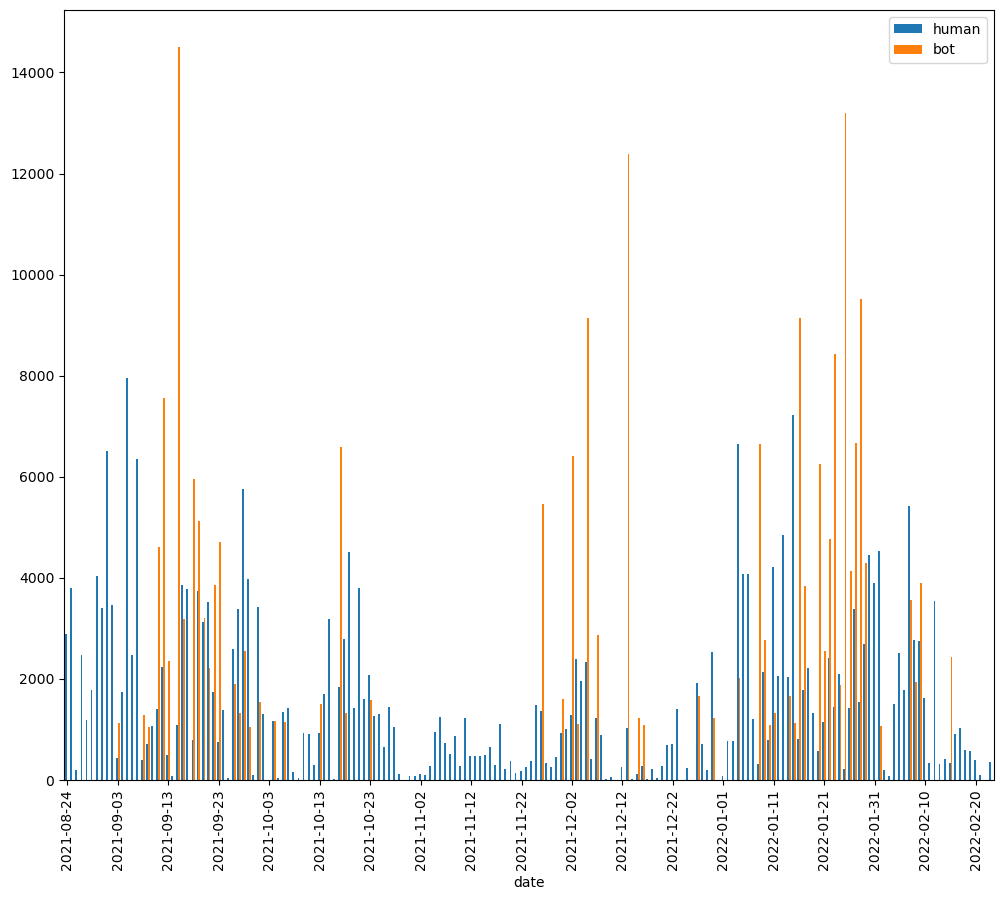

In [18]:
#plotting number of edits by both- human and bot category

x= df3.index
y=df3['changeset']
z=df4['changeset']

df5 = pd.DataFrame({
    'date': x,
    'human': y,
    'bot':z
})
df5 = df5.reset_index(drop=True)

step_size = 10 
ax = df5.plot(x="date", y=["human", "bot"],width=0.75, kind="bar", rot=90,figsize=(12, 10))
x_ticks = ax.get_xticks()
x_tick_labels = ax.get_xticklabels()

# to set x-axis labels based on the step size
ax.set_xticks(x_ticks[::step_size])
ax.set_xticklabels(x_tick_labels[::step_size])

plt.show()

### *Analysis of data for 1 week before the bombing*

In [19]:
#counting number of ediits per day for this week and plotting on bar graph
df6= kherson1.loc[(kherson1['date']>='2022-02-17') & (kherson1['date']<'2022-02-26'),:]
df6=df6.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
df6=df6.groupby(['date']).count()
df6.head(3)

id
date            
2022-02-17  1035
2022-02-18   591
2022-02-19   572

In [20]:
#statistic measures of edits
df6.describe()

id
count     7.000000
mean    437.428571
std     343.747416
min       2.000000
25%     230.000000
50%     402.000000
75%     581.500000
max    1035.000000

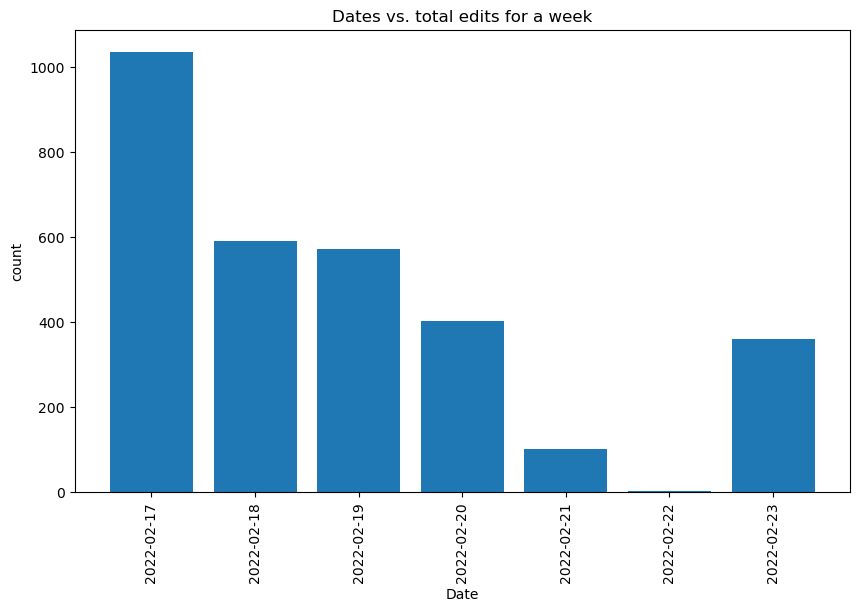

In [21]:
#using bar graph to plot the editing frequency

df6.index = pd.to_datetime(df6.index)
plt.figure(figsize=(10, 6))  
plt.bar(df6.index, df6['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for a week')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the month before the bombing*

In [22]:
#counting number of ediits per day for 1 month and plotting on bar graph
df7= kherson1.loc[(kherson1['date']>='2022-01-24') & (kherson1['date']<'2022-02-24'),:]
df7=df7.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
df7=df7.groupby(['date']).count()
df7.head()

id
date             
2022-01-24   3963
2022-01-25  13430
2022-01-26   5551
2022-01-27  10061
2022-01-28  11068

In [23]:
df7.describe() #statistic measures of edits

id
count     31.000000
mean    3368.870968
std     3647.449170
min        2.000000
25%      413.000000
50%     1777.000000
75%     5134.000000
max    13430.000000

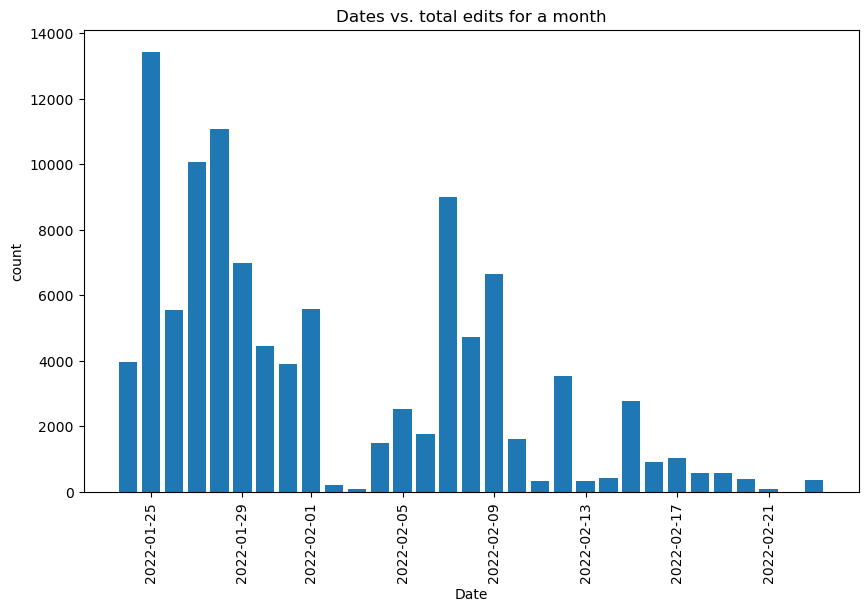

In [24]:
df7.index = pd.to_datetime(df7.index)
plt.figure(figsize=(10, 6))  
plt.bar(df7.index, df7['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for a month')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the 3 months before the bombing*

In [25]:
#counting number of ediits per day for the 3 months before bombing and plotting on bar graph
df8= kherson1.loc[(kherson1['date']>'2021-11-25') & (kherson1['date']<'2022-02-24'),:]
df8=df8.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
df8=df8.groupby(['date']).count()
df8.head()

id
date            
2021-11-26  6818
2021-11-27   330
2021-11-28   262
2021-11-29   454
2021-11-30  2521

In [26]:
df8.describe() #statistic measures of edits

id
count     90.000000
mean    3097.233333
std     3444.416443
min        1.000000
25%      347.000000
50%     1557.000000
75%     4813.750000
max    13430.000000

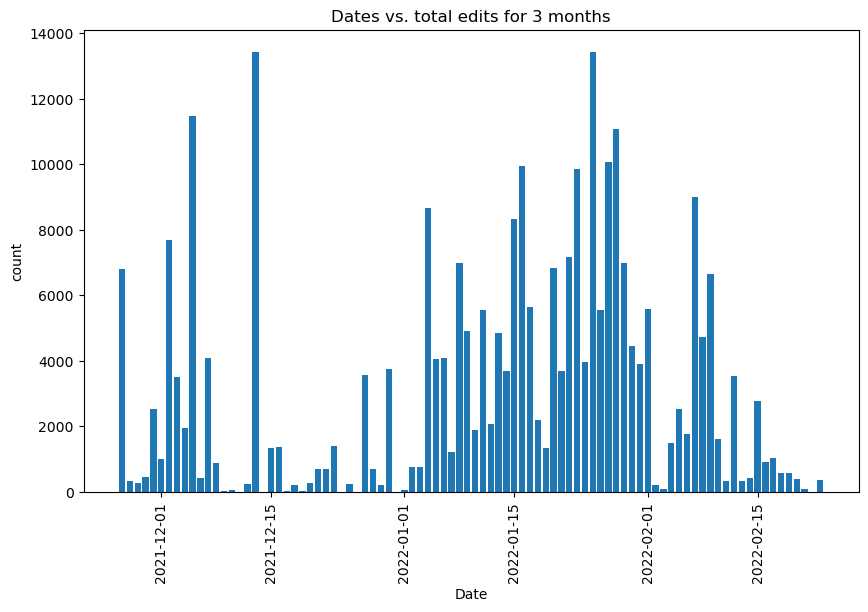

In [27]:
df8.index = pd.to_datetime(df8.index)
plt.figure(figsize=(10, 6))  
plt.bar(df8.index, df8['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for 3 months')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the 6 months before the bombing*

In [28]:
#counting number of ediits per day for the 6 months before bombing and plotting on bar graph

df9=kherson1.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
df9=df9.groupby(['date']).count()
df9.describe()

id
count    184.000000
mean    2771.815217
std     3142.292741
min        1.000000
25%      355.000000
50%     1420.000000
75%     4097.000000
max    15593.000000

In [29]:
#analysing frequency of edits for each month during these 6 months period
dfsep= kherson1.loc[(kherson1['date']>='2021-08-24') & (kherson1['date']<'2021-09-24'),:]
dfsep=dfsep.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dfsep=dfsep.groupby(['date']).count()
dfsep=dfsep.reset_index()

In [30]:
dfoct= kherson1.loc[(kherson1['date']>='2021-09-24') & (kherson1['date']<'2021-10-24'),:]
dfoct=dfoct.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dfoct=dfoct.groupby(['date']).count()
dfoct=dfoct.reset_index()

In [31]:
dfnov= kherson1.loc[(kherson1['date']>='2021-10-24') & (kherson1['date']<'2021-11-24'),:]
dfnov=dfnov.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dfnov=dfnov.groupby(['date']).count()
dfnov=dfnov.reset_index()

In [32]:
dfdec= kherson1.loc[(kherson1['date']>='2021-11-24') & (kherson1['date']<'2021-12-24'),:]
dfdec=dfdec.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dfdec=dfdec.groupby(['date']).count()
dfdec=dfdec.reset_index()

In [33]:
dfjan= kherson1.loc[(kherson1['date']>='2021-12-24') & (kherson1['date']<'2022-01-24'),:]
dfjan=dfjan.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dfjan=dfjan.groupby(['date']).count()
dfjan=dfjan.reset_index()


In [34]:
dffeb= kherson1.loc[(kherson1['date']>='2022-01-24') & (kherson1['date']<'2022-02-24'),:]
dffeb=dffeb.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dffeb=dffeb.groupby(['date']).count()
dffeb=dffeb.reset_index()


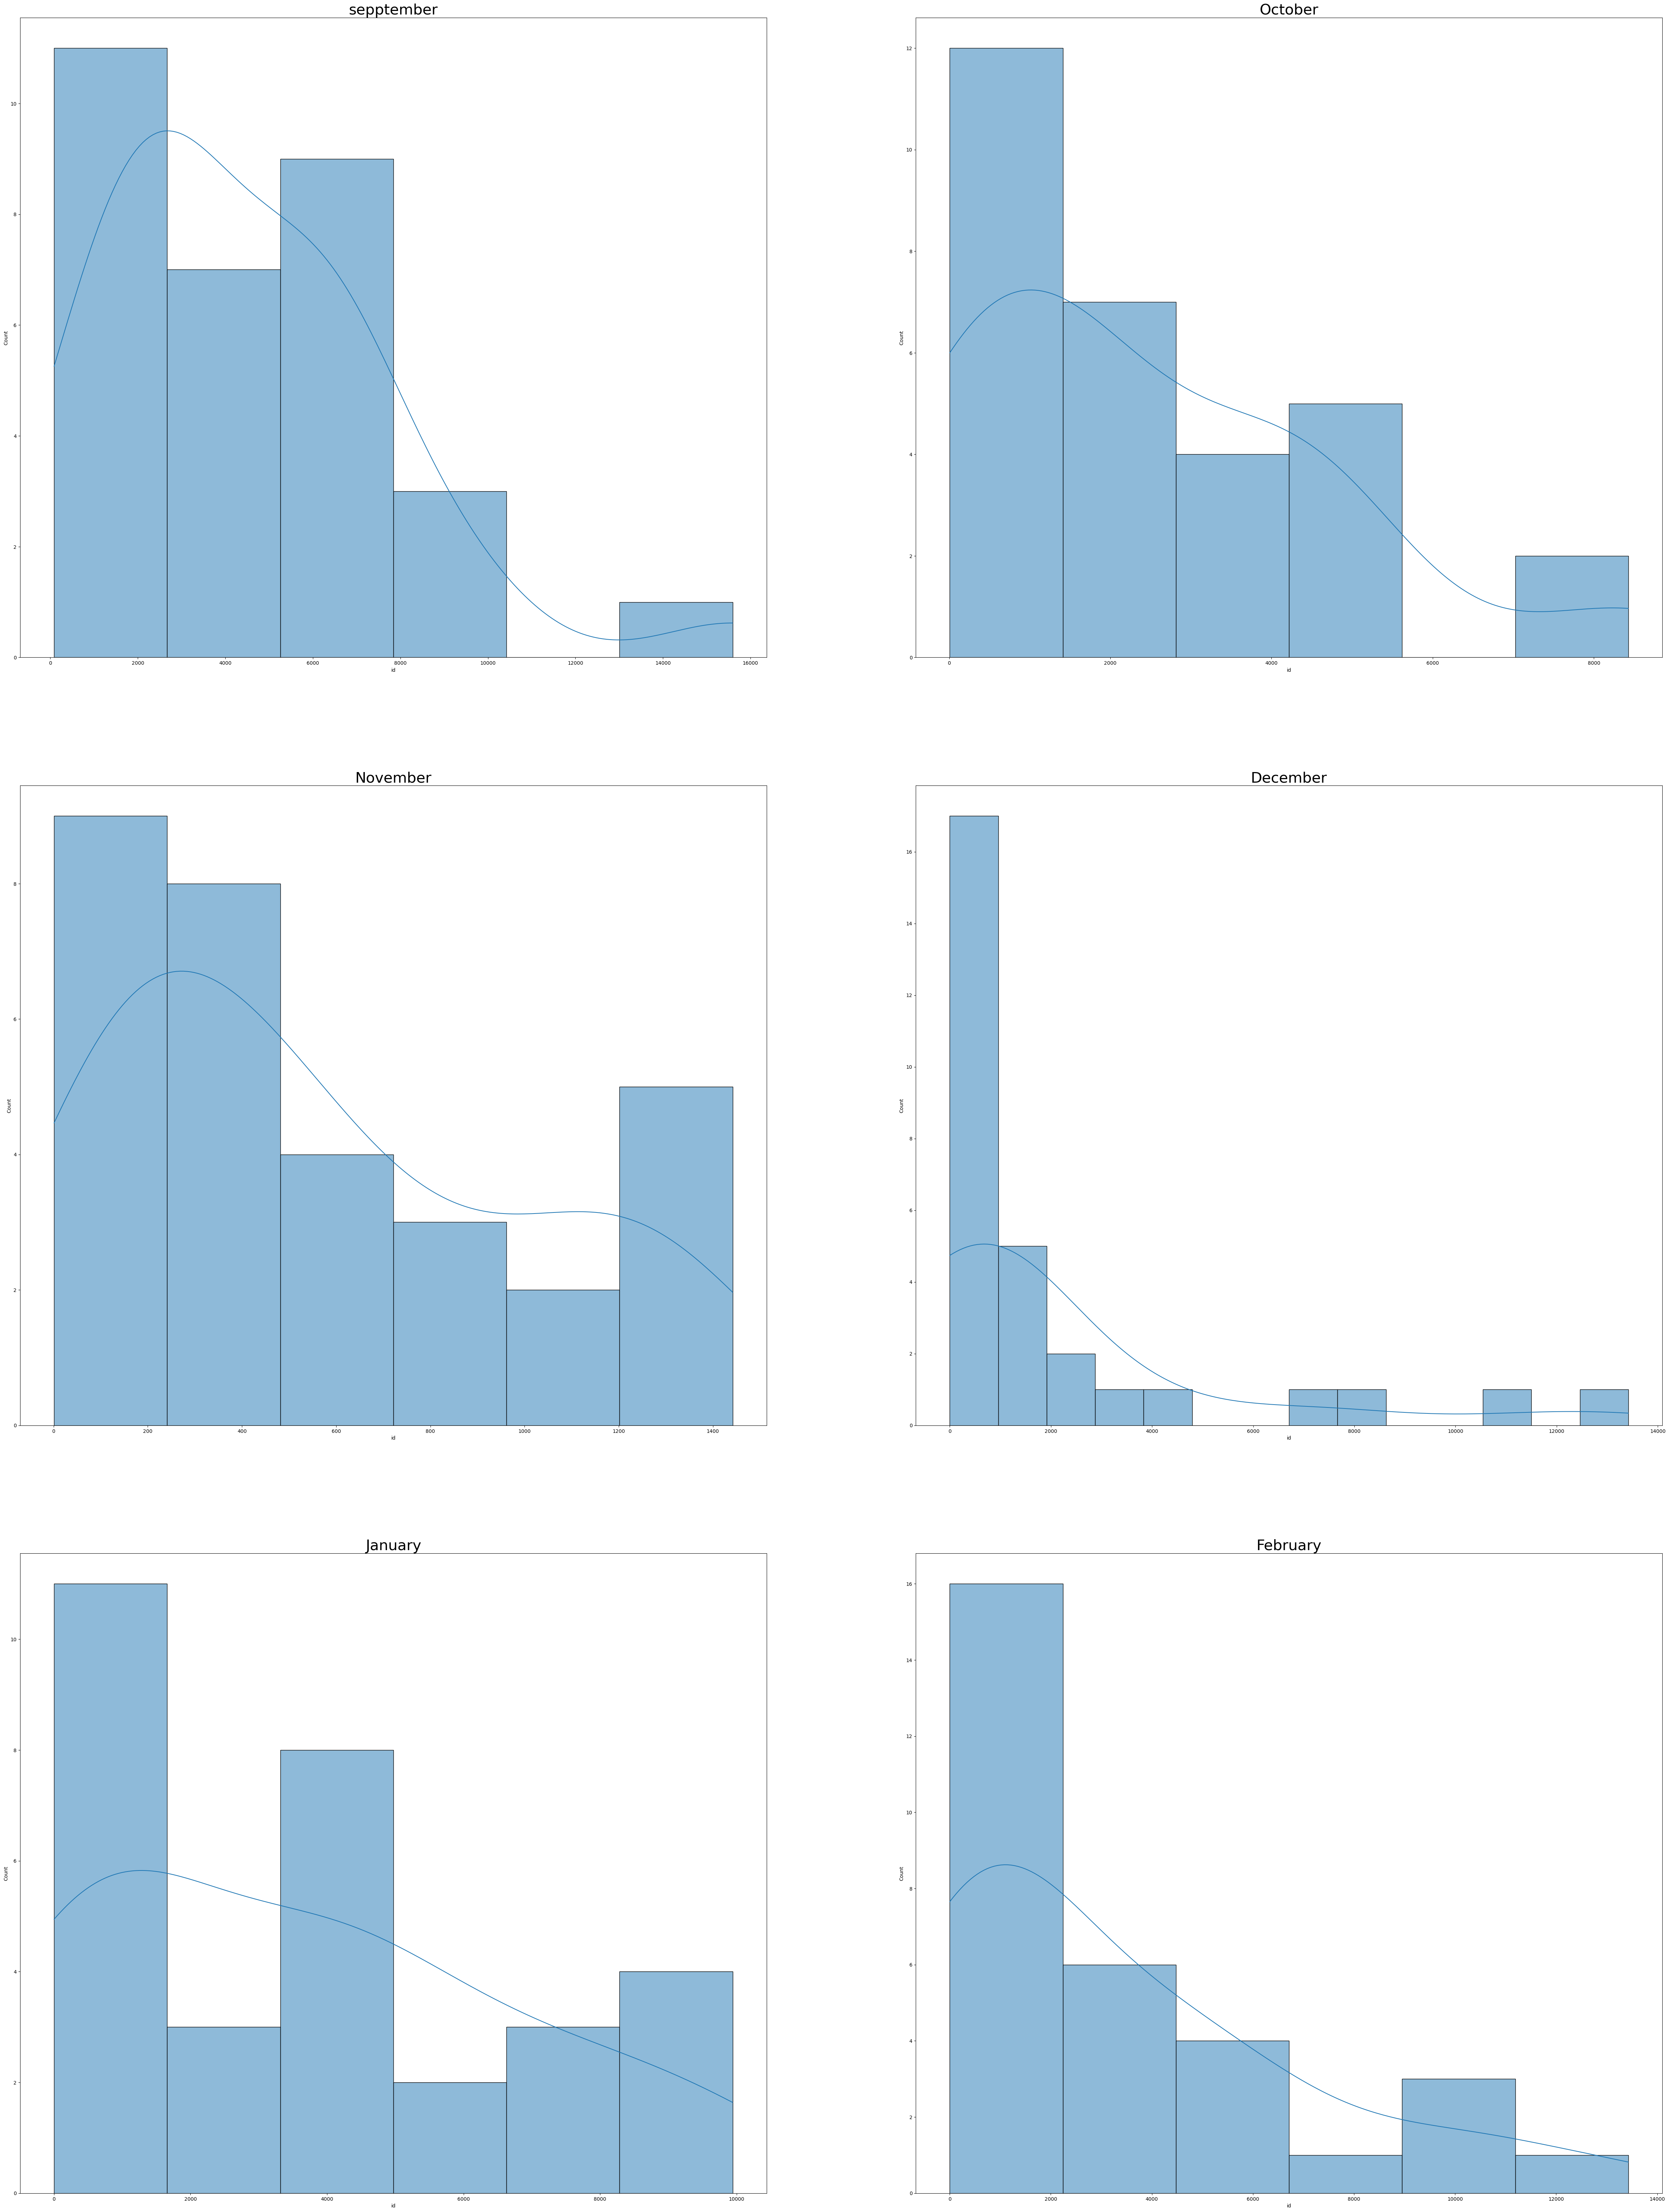

In [35]:
#histogram for frequency distributin 

fig,axes= plt.subplots(3,2,figsize=(60, 80))

axes = axes.flatten()

s=sb.histplot(data=dfsep, x='id',bins='auto',kde=True,ax=axes[0]).set_title('sepptember',fontsize = 30)
s=sb.histplot(data=dfoct, x='id',bins='auto',kde=True,ax=axes[1]).set_title('October',fontsize = 30)
s=sb.histplot(data=dfnov, x='id',bins='auto',kde=True,ax=axes[2]).set_title('November',fontsize = 30)
s=sb.histplot(data=dfdec, x='id',bins='auto',kde=True,ax=axes[3]).set_title('December',fontsize = 30)
s=sb.histplot(data=dfjan, x='id',bins='auto',kde=True,ax=axes[4]).set_title('January',fontsize = 30)
s=sb.histplot(data=dffeb, x='id',bins='auto',kde=True,ax=axes[5]).set_title('February',fontsize = 30)




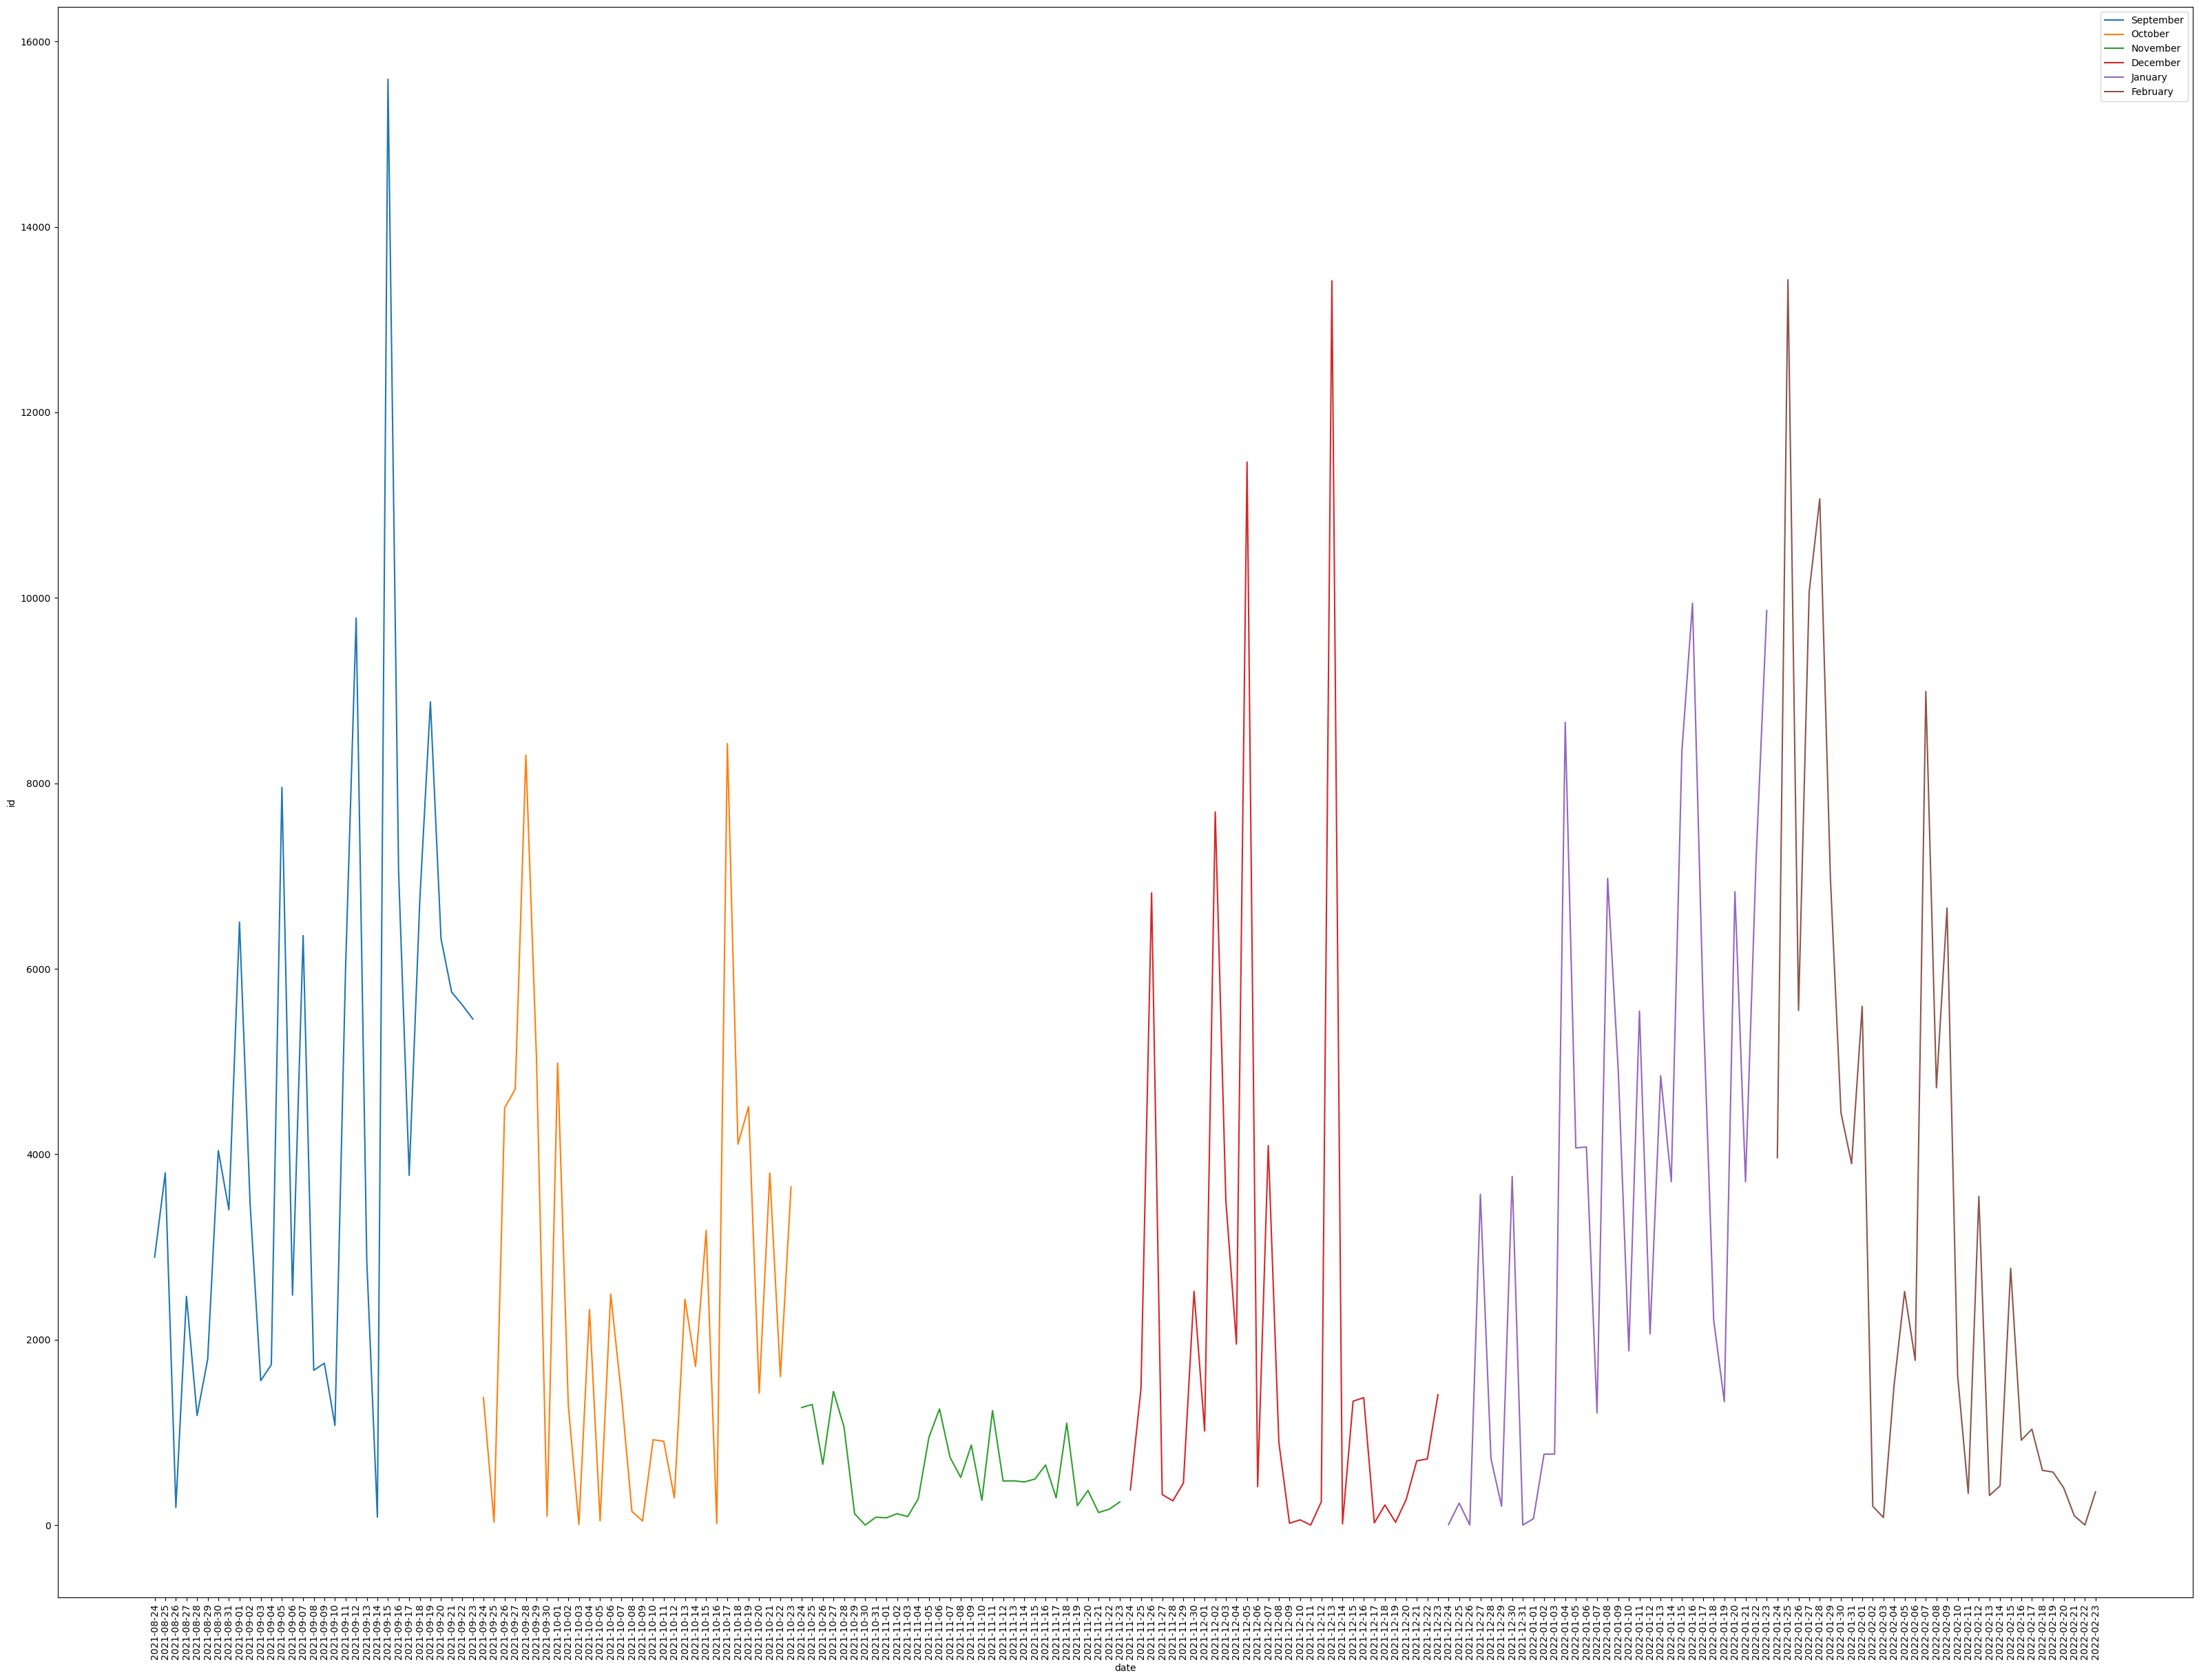

In [36]:
#trend chart to understand the editting pattern during 6 months befire bombing

fig = plt.subplots(figsize=(40, 30))
s=sb.lineplot(x='date', y='id', data=dfsep,label='September')
s=sb.lineplot(x='date', y='id', data=dfoct,label='October')
s=sb.lineplot(x='date', y='id', data=dfnov,label='November')
s=sb.lineplot(x='date', y='id', data=dfdec,label='December')
s=sb.lineplot(x='date', y='id', data=dfjan,label='January')
s=sb.lineplot(x='date', y='id', data=dffeb,label='February')
plt.xticks(rotation=90)

plt.show()

### *Analysing editing frequency at contributor level*

In [37]:
#working on number of changesets and number of edits by each user during the 6 months

#df10=kherson1.drop(['deleted','timestamp','uid','version','visibility','tp','extra','date'], axis=1)
df10=kherson1.loc[kherson1['category']=='human']
df11=kherson1.loc[kherson1['category']=='bot']

df10=df10.drop(['deleted','timestamp','user','version','visibility','tp','date'], axis=1)
df11=df11.drop(['deleted','timestamp','user','version','visibility','tp','date'], axis=1)


In [38]:
#counting unique changesets added by each user during 6 months

df12=df10.groupby('uid')['changeset'].nunique()
df13=df11.groupby('uid')['changeset'].nunique()

In [39]:
#number of unique changesets posted by each contributors

changesets = df12.reset_index()
changesets

uid  changeset
0        5359          1
1       15110          1
2       71862          2
3       95117          1
4      161619          2
..        ...        ...
190  14881636          4
191  14992380          1
192  15000002         10
193  15064591         22
194  15128598          1

[195 rows x 2 columns]

In [40]:
#counting the changesets added bu software bots during the period
changesets_bot= df13.reset_index()
changesets_bot

uid  changeset
0   2471547          2
1   6617477         19
2   7154639          1
3   9140979          1
4  10129333          2
5  10791758         83
6  12784289          3
7  13418691          9

In [41]:
#the uid suggests that the automated scripts were added by the same users as those listed in 'human' category 
#further analysis wont consider categories seperately
changesets_bot['uid'].isin(changesets_bot['uid'])

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
Name: uid, dtype: bool

In [42]:
#grouping data on user and counting the total contribution made by each user during the whole period
df14=df10.drop(['changeset','category'],axis=1)
id_counts=df14.groupby(['uid']).count()

id_counts=id_counts.reset_index()
id_counts

uid   id
0        5359    1
1       15110    2
2       71862   32
3       95117  171
4      161619   26
..        ...  ...
190  14881636    4
191  14992380    1
192  15000002   10
193  15064591  208
194  15128598    1

[195 rows x 2 columns]

In [43]:
# Grouping users based on total contribution using the values of 25% and 75% values of quantiles 
# inactive mapper: less than 2000 edits 
# casual mapper: 2000 - 6000 edits
# committed mappers : more than 6000 edits [values based on the quartile values of 6 months months]

id_counts['contribution level']=id_counts['id'].apply(lambda x: 'inactive' if x < 2000 else ('casual mapper' if 2000 <= x < 6000 else 'committed'))

#id_counts.reset_index() 
id_counts.head()

uid   id contribution level
0    5359    1           inactive
1   15110    2           inactive
2   71862   32           inactive
3   95117  171           inactive
4  161619   26           inactive

In [44]:
#count of contributors in each category

contribution= id_counts.drop('id', axis=1)

contribution=contribution.groupby('contribution level').count()

print(contribution)

                    uid
contribution level     
casual mapper        10
committed             5
inactive            180


In [45]:
id_counts.head()

uid   id contribution level
0    5359    1           inactive
1   15110    2           inactive
2   71862   32           inactive
3   95117  171           inactive
4  161619   26           inactive

In [46]:
#adding contribution level to the dataframe 


temp=id_counts.drop('id',axis=1)
temp=temp.set_index('uid')


In [47]:

kherson1=kherson1.merge(temp['contribution level'], on='uid', how='left')
kherson1

id  changeset deleted                  timestamp       uid  \
0       9263822070  113943376   false  2021-11-18 12:48:34+00:00   2481418   
1       2076300232  111458522    true  2021-09-20 17:58:02+01:00  10791758   
2       1329357932  110857608   false  2021-09-07 13:16:24+01:00  10791758   
3       9422770892  116216532   false  2022-01-16 14:40:10+00:00  10791758   
4       9422770892  116510802    true  2022-01-23 18:35:25+00:00  10791758   
...            ...        ...     ...                        ...       ...   
510009  6914899609  116105096   false  2022-01-13 12:34:35+00:00    571410   
510010  2214290934  111409694   false  2021-09-19 14:42:56+01:00  10791758   
510011  1446063310  116304879   false  2022-01-18 15:50:17+00:00  13418691   
510012  8978467163  115867704   false  2022-01-07 08:53:05+00:00  13418691   
510013  1830650536  111481914   false  2021-09-21 09:20:10+01:00   9625412   

                     user  version visibility    tp        date category  \
0                   Mr_67        1       true  node  2021-11-18    human   
1                 chlenix        2      false  node  2021-09-20      bot   
2                 chlenix        2       true  node  2021-09-07    human   
3                 chlenix        1       true  node  2022-01-16      bot   
4                 chlenix        2      false  node  2022-01-23      bot   
...                   ...      ...        ...   ...         ...      ...   
510009  Антін Сартенченко        3       true  node  2022-01-13    human   
510010            chlenix        2       true  node  2021-09-19    human   
510011             DmVict        3       true  node  2022-01-18    human   
510012             DmVict        2       true  node  2022-01-07    human   
510013         Piedmont22        2       true  node  2021-09-21    human   

       contribution level  
0           casual mapper  
1               committed  
2               committed  
3               committed  
4               committed  
...                   ...  
510009          committed  
510010          committed  
510011          committed  
510012          committed  
510013      casual mapper  

[510014 rows x 12 columns]

In [48]:
#counting the number of deleted nodes for each user
df_deleted=kherson1.loc[:,['uid','deleted']]
df_deleted
df_deleted=df_deleted.groupby(['uid','deleted'])['deleted'].count()
df_del=pd.DataFrame(df_deleted)
df_del= df_del.rename(columns={'deleted': 'deleted nodes'})
df_del=df_del.reset_index()
df_del=df_del.loc[df_del['deleted']=='true']


In [49]:
df_del=df_del.set_index('uid')
df_del

deleted  deleted nodes
uid                            
71862       true              9
95117       true              4
161619      true             11
204049      true              9
290442      true              1
...          ...            ...
13967439    true              7
14139117    true              1
14323163    true             18
14696734    true              6
15064591    true             44

[77 rows x 2 columns]

###  *Analysis of version history on contributor level*

In [50]:
#anaysing version history on contributor level
kherson1=kherson1.sort_values(['id', 'version'], ascending=[True,True])
kherson1

id  changeset deleted                  timestamp      uid  \
442540    27135680  114483605   false  2021-12-02 13:26:57+00:00  6617477   
434929    27135682  114483605   false  2021-12-02 13:26:57+00:00  6617477   
115042    27135684  114483605   false  2021-12-02 13:26:57+00:00  6617477   
105615    27135685  114483605   false  2021-12-02 13:26:57+00:00  6617477   
48418     27135687  114483605   false  2021-12-02 13:26:57+00:00  6617477   
...            ...        ...     ...                        ...      ...   
45722   9529647518  117765808   false  2022-02-23 11:31:38+00:00  6110846   
115289  9529647519  117765808   false  2022-02-23 11:31:38+00:00  6110846   
499624  9529647520  117765808   false  2022-02-23 11:31:40+00:00  6110846   
231623  9529647617  117765808   false  2022-02-23 11:31:38+00:00  6110846   
356456  9529648917  117765808   false  2022-02-23 11:31:39+00:00  6110846   

                      user  version visibility    tp        date category  \
442540            deindsin        3       true  node  2021-12-02    human   
434929            deindsin        3       true  node  2021-12-02    human   
115042            deindsin        5       true  node  2021-12-02    human   
105615            deindsin        4       true  node  2021-12-02    human   
48418             deindsin        4       true  node  2021-12-02    human   
...                    ...      ...        ...   ...         ...      ...   
45722   Poliakoff Mykhailo        1       true  node  2022-02-23    human   
115289  Poliakoff Mykhailo        1       true  node  2022-02-23    human   
499624  Poliakoff Mykhailo        1       true  node  2022-02-23    human   
231623  Poliakoff Mykhailo        1       true  node  2022-02-23    human   
356456  Poliakoff Mykhailo        1       true  node  2022-02-23    human   

       contribution level  
442540          committed  
434929          committed  
115042          committed  
105615          committed  
48418           committed  
...                   ...  
45722            inactive  
115289           inactive  
499624           inactive  
231623           inactive  
356456           inactive  

[510014 rows x 12 columns]

In [51]:
#Extract the list of editing version for each of the contributors 

version=kherson1.groupby('uid')['version'].apply(list)
version_list=pd.DataFrame(version)
version_list.head()

version
uid                                                      
5359                                                  [2]
15110                                              [2, 2]
71862   [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...
95117   [7, 5, 3, 4, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, ...
161619  [4, 4, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...

In [52]:
# This will count the number of new nodes vs number of edits 
#version=1 is considered new node, rest of the versions as edited nodes

# Function to count the frequency of new nodes(version=1) in a list
def count_ones(lst):
    return lst.count(1)

# Function to count the frequency of edited nodes in a list
def edits(lst):
    count=0
    for i in lst:
        if i != 1:
            count=count+1
    return count

# Apply the functions to the 'version' column
version_list['new nodes'] = version_list['version'].apply(count_ones)
version_list['edited nodes'] = version_list['version'].apply(edits)                                                    
version_list.head(16)
        

version  new nodes  \
uid                                                                    
5359                                                  [2]          0   
15110                                              [2, 2]          0   
71862   [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...          3   
95117   [7, 5, 3, 4, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, ...        160   
161619  [4, 4, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...         11   
204049  [6, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, ...         18   
217427                                                [2]          0   
290442  [3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, ...         58   
297918  [3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, ...         27   
311318  [2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...         50   
311846                                       [15, 16, 17]          0   
345544                                                [1]          1   
352403  [10, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2,...        168   
357344                                                [3]          0   
371263  [2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...         87   
371522  [6, 7, 6, 4, 3, 4, 4, 4, 6, 5, 5, 5, 4, 6, 4, ...        123   

        edited nodes  
uid                   
5359               1  
15110              2  
71862             29  
95117             11  
161619            15  
204049            80  
217427             1  
290442            40  
297918            40  
311318             2  
311846             3  
345544             0  
352403           112  
357344             1  
371263             2  
371522           336

###  *Calculating the total active days for each user*

In [53]:
df_lifespan= kherson1.loc[:,['uid','date']]
df_lifespan['date'] = df_lifespan.date.astype('datetime64[ns]')

In [54]:
df_lifespan=df_lifespan.sort_values(['uid','date'],ascending=[True,True])#sorting the database to get the first day of contribution

In [55]:
# grouping on uid and then for each user, retrieving the first and last day of contribution time perdiod
df_lifespan=df_lifespan.groupby('uid')
first_row= df_lifespan.min()
last_row=df_lifespan.max()
#print('first_row')
timeframe1=pd.DataFrame(first_row).reset_index()
timeframe2=pd.DataFrame(last_row).reset_index()

In [56]:
# first day when the conributor made an activty
timeframe1.head(10)

uid       date
0    5359 2021-11-27
1   15110 2022-02-13
2   71862 2022-02-04
3   95117 2022-02-13
4  161619 2021-11-26
5  204049 2022-02-03
6  217427 2021-08-29
7  290442 2021-11-25
8  297918 2021-11-13
9  311318 2022-01-06

In [57]:
timeframe2.head(10) # last day when the conributor made an activty

uid       date
0    5359 2021-11-27
1   15110 2022-02-13
2   71862 2022-02-04
3   95117 2022-02-13
4  161619 2021-12-19
5  204049 2022-02-06
6  217427 2021-08-29
7  290442 2021-11-25
8  297918 2021-11-13
9  311318 2022-01-06

In [58]:
#calculating the difference between two dats

result=(timeframe2['date']-timeframe1['date'])
day=pd.to_timedelta(1, unit='d')
timeframe1['active days']=result+day
timeframe1=timeframe1.drop(['date'],axis=1)
timeframe1.head(6)

uid active days
0    5359      1 days
1   15110      1 days
2   71862      1 days
3   95117      1 days
4  161619     24 days
5  204049      4 days

## *Importing and analysing tag data for the 6 months period*

In [59]:
#to fetch the tags data for all the nodes fetched in previous query for 6 months

query2 = "SELECT * FROM node_tags WHERE id IN (SELECT id FROM user_info WHERE id IN (SELECT id FROM node_locations WHERE latitude BETWEEN 45.7565682 AND 47.600194 AND longitude BETWEEN 31.1590964 AND 35.4680391) AND timestamp <TO_DATE('2022-02-24','yyyy-mm-dd') AND timestamp >TO_DATE('2021-08-24','yyyy-mm-dd'));"

In [60]:
kherson2 = pd.read_sql(query2, con=engine)

In [61]:
pd.set_option('max_colwidth', None)
kherson2

id                                        tags
0         27915312  {'created_by': 'shp2osm', 'source': 'PGS'}
1         27915312                           {'source': 'PGS'}
2         27915312                           {'source': 'PGS'}
3         27915312                           {'source': 'PGS'}
4         27915312                           {'source': 'PGS'}
...            ...                                         ...
634556  6394813439                                          {}
634557  6394813439                                          {}
634558  6394813439                                          {}
634559  6420437854                                          {}
634560  6420437854                                          {}

[634561 rows x 2 columns]

In [62]:
#count of empty tags

df15=kherson2[kherson2['tags']=='{}'].count()
df15

id      602921
tags    602921
dtype: int64

In [63]:
#only taking the records having non-null values in tags

df15=kherson2[kherson2['tags']!='{}']

df15

id  \
0         27915312   
1         27915312   
2         27915312   
3         27915312   
4         27915312   
...            ...   
634500  6322030112   
634501  6322030112   
634553  6383885406   
634554  6383885406   
634555  6383885406   

                                                                                                                                                                                                    tags  
0                                                                                                                                                             {'created_by': 'shp2osm', 'source': 'PGS'}  
1                                                                                                                                                                                      {'source': 'PGS'}  
2                                                                                                                                                                                      {'source': 'PGS'}  
3                                                                                                                                                                                      {'source': 'PGS'}  
4                                                                                                                                                                                      {'source': 'PGS'}  
...                                                                                                                                                                                                  ...  
634500                                                                                                                                                                           {'highway': 'crossing'}  
634501                                                                                      {'highway': 'crossing', 'mapillary': '503498964177143', 'survey:date': '2020-08-28', 'tactile_paving': 'no'}  
634553                                                                                                                                  {'addr:housenumber': '7а', 'name': 'Watsons', 'shop': 'chemist'}  
634554                                               {'addr:housenumber': '7а', 'brand': 'Watsons', 'brand:wikidata': 'Q7974785', 'brand:wikipedia': 'en:Watsons', 'name': 'Watsons', 'shop': 'chemist'}  
634555  {'addr:housenumber': '7а', 'addr:street': '200-річчя Херсона проспект', 'brand': 'Watsons', 'brand:wikidata': 'Q7974785', 'brand:wikipedia': 'en:Watsons', 'name': 'Watsons', 'shop': 'chemist'}  

[31640 rows x 2 columns]

In [64]:
# append the tags column to previous dataframe having user details 
pd.set_option('max_colwidth', 30)
df16=df15.merge(kherson1, on='id', how='left')
df16

id                           tags  changeset deleted  \
0        27915312  {'created_by': 'shp2osm', ...  117452344   false   
1        27915312              {'source': 'PGS'}  117452344   false   
2        27915312              {'source': 'PGS'}  117452344   false   
3        27915312              {'source': 'PGS'}  117452344   false   
4        27915312              {'source': 'PGS'}  117452344   false   
...           ...                            ...        ...     ...   
35367  6322030112        {'highway': 'crossing'}  110737513   false   
35368  6322030112  {'highway': 'crossing', 'm...  110737513   false   
35369  6383885406  {'addr:housenumber': '7а',...  116146302   false   
35370  6383885406  {'addr:housenumber': '7а',...  116146302   false   
35371  6383885406  {'addr:housenumber': '7а',...  116146302   false   

                       timestamp       uid         user  version visibility  \
0      2022-02-15 21:35:52+00:00  10791758      chlenix        5       true   
1      2022-02-15 21:35:52+00:00  10791758      chlenix        5       true   
2      2022-02-15 21:35:52+00:00  10791758      chlenix        5       true   
3      2022-02-15 21:35:52+00:00  10791758      chlenix        5       true   
4      2022-02-15 21:35:52+00:00  10791758      chlenix        5       true   
...                          ...       ...          ...      ...        ...   
35367  2021-09-05 07:51:27+01:00  10083071       Delhuu        2       true   
35368  2021-09-05 07:51:27+01:00  10083071       Delhuu        2       true   
35369  2022-01-14 13:05:20+00:00   8869107  O_Tkachenko        3       true   
35370  2022-01-14 13:05:20+00:00   8869107  O_Tkachenko        3       true   
35371  2022-01-14 13:05:20+00:00   8869107  O_Tkachenko        3       true   

         tp        date category contribution level  
0      node  2022-02-15      bot          committed  
1      node  2022-02-15      bot          committed  
2      node  2022-02-15      bot          committed  
3      node  2022-02-15      bot          committed  
4      node  2022-02-15      bot          committed  
...     ...         ...      ...                ...  
35367  node  2021-09-05    human           inactive  
35368  node  2021-09-05    human           inactive  
35369  node  2022-01-14    human           inactive  
35370  node  2022-01-14    human           inactive  
35371  node  2022-01-14    human           inactive  

[35372 rows x 13 columns]

In [65]:
# convrting tags from dictionary format into table format where each column is a unique key and stores its value

from ast import literal_eval
df16['tags'] = df16['tags'].apply(literal_eval)
extracted_data=[]

for index, row in df16.iterrows():
    tag_dict = row['tags']
    extracted_row = {"id": row['id']}  # Add the 'id' column
    extracted_row.update(tag_dict)  # Add the rest of the dictionary data
    extracted_data.append(extracted_row)


# Create a new DataFrame from the extracted data
pd.set_option('display.max_columns', None)

webhook_data = {'created_by': 'JOSM'}

def parse_webhook(webhook_data):
    data = ast.literal_eval(str(webhook_data))
    return data
df17 = pd.DataFrame(extracted_data)


In [66]:
id_to_value1 = df16.set_index('id')['uid'].to_dict()
df17['uid'] = df17['id'].map(id_to_value1) #adding uid column to the dataframe
df17.head()

id created_by source highway crossing crossing:island power railway  \
0  27915312    shp2osm    PGS     NaN      NaN             NaN   NaN     NaN   
1  27915312        NaN    PGS     NaN      NaN             NaN   NaN     NaN   
2  27915312        NaN    PGS     NaN      NaN             NaN   NaN     NaN   
3  27915312        NaN    PGS     NaN      NaN             NaN   NaN     NaN   
4  27915312        NaN    PGS     NaN      NaN             NaN   NaN     NaN   

   ref description historic name wikidata wikipedia  bus public_transport  \
0  NaN         NaN      NaN  NaN      NaN       NaN  NaN              NaN   
1  NaN         NaN      NaN  NaN      NaN       NaN  NaN              NaN   
2  NaN         NaN      NaN  NaN      NaN       NaN  NaN              NaN   
3  NaN         NaN      NaN  NaN      NaN       NaN  NaN              NaN   
4  NaN         NaN      NaN  NaN      NaN       NaN  NaN              NaN   

  bench shelter survey:date amenity operator drive_through brand brand:en  \
0   NaN     NaN         NaN     NaN      NaN           NaN   NaN      NaN   
1   NaN     NaN         NaN     NaN      NaN           NaN   NaN      NaN   
2   NaN     NaN         NaN     NaN      NaN           NaN   NaN      NaN   
3   NaN     NaN         NaN     NaN      NaN           NaN   NaN      NaN   
4   NaN     NaN         NaN     NaN      NaN           NaN   NaN      NaN   

  brand:wikidata brand:wikipedia name:en name:ru name:uk network operator:en  \
0            NaN             NaN     NaN     NaN     NaN     NaN         NaN   
1            NaN             NaN     NaN     NaN     NaN     NaN         NaN   
2            NaN             NaN     NaN     NaN     NaN     NaN         NaN   
3            NaN             NaN     NaN     NaN     NaN     NaN         NaN   
4            NaN             NaN     NaN     NaN     NaN     NaN         NaN   

  operator:full_name:en operator:ru operator:uk operator:wikidata  \
0                   NaN         NaN         NaN               NaN   
1                   NaN         NaN         NaN               NaN   
2                   NaN         NaN         NaN               NaN   
3                   NaN         NaN         NaN               NaN   
4                   NaN         NaN         NaN               NaN   

  operator:wikipedia brand:uk contact:facebook contact:instagram  \
0                NaN      NaN              NaN               NaN   
1                NaN      NaN              NaN               NaN   
2                NaN      NaN              NaN               NaN   
3                NaN      NaN              NaN               NaN   
4                NaN      NaN              NaN               NaN   

  contact:twitter contact:youtube name:de name:hu operator:official_name:en  \
0             NaN             NaN     NaN     NaN                       NaN   
1             NaN             NaN     NaN     NaN                       NaN   
2             NaN             NaN     NaN     NaN                       NaN   
3             NaN             NaN     NaN     NaN                       NaN   
4             NaN             NaN     NaN     NaN                       NaN   

  operator:official_name:uk operator:short_name:en operator:short_name:uk  \
0                       NaN                    NaN                    NaN   
1                       NaN                    NaN                    NaN   
2                       NaN                    NaN                    NaN   
3                       NaN                    NaN                    NaN   
4                       NaN                    NaN                    NaN   

  traffic_sign:backward side natural barrier backrest noexit share_taxi  \
0                   NaN  NaN     NaN     NaN      NaN    NaN        NaN   
1                   NaN  NaN     NaN     NaN      NaN    NaN        NaN   
2                   NaN  NaN     NaN     NaN      NaN    NaN        NaN   
3                   NaN  NaN     NaN     NaN      NaN    Na

In [67]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35372 entries, 0 to 35371
Columns: 467 entries, id to uid
dtypes: int64(2), object(465)
memory usage: 126.0+ MB


In [68]:
#counting total counts of each tags

non_null_counts = df17.count()
counts=pd.DataFrame(non_null_counts)
counts= counts.reset_index()
counts.columns = ["tags", "total counts"]
counts=counts.sort_values(['total counts'], ascending=False)
counts.head(7)

tags  total counts
0         id         35372
466      uid         35372
11      name         20992
27   name:ru         15808
28   name:uk         15270
26   name:en         14712
102    place         13798

In [69]:
#selecting the value of tags for further analysis, only tags having more than 5000 entries are considered

df18= counts.loc[counts['total counts']>5000]
df18

tags  total counts
0               id         35372
466            uid         35372
11            name         20992
27         name:ru         15808
28         name:uk         15270
26         name:en         14712
102          place         13798
13       wikipedia         11632
126     population         11422
125         koatuu         11039
128    name:prefix          8918
93   addr:postcode          8299
127   wikipedia:ru          7750
12        wikidata          6189

<Axes: xlabel='total counts', ylabel='Count'>

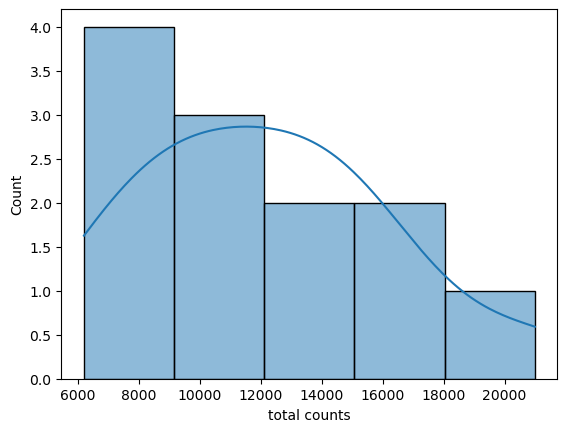

In [70]:
#frequency distribution of tag counts

df_plot=df18.loc[(df18['tags']!='id') & (df18['tags']!='uid'),:]
sb.histplot(data=df_plot, x='total counts',bins='auto',kde=True)

In [71]:
#list of tags for further analysis

column_keep=df18["tags"].tolist()
column_keep


['id',
 'uid',
 'name',
 'name:ru',
 'name:uk',
 'name:en',
 'place',
 'wikipedia',
 'population',
 'koatuu',
 'name:prefix',
 'addr:postcode',
 'wikipedia:ru',
 'wikidata']

In [72]:
df19=df17.loc[:,column_keep]
df19.head()

id       uid name name:ru name:uk name:en place wikipedia population  \
0  27915312  10791758  NaN     NaN     NaN     NaN   NaN       NaN        NaN   
1  27915312  10791758  NaN     NaN     NaN     NaN   NaN       NaN        NaN   
2  27915312  10791758  NaN     NaN     NaN     NaN   NaN       NaN        NaN   
3  27915312  10791758  NaN     NaN     NaN     NaN   NaN       NaN        NaN   
4  27915312  10791758  NaN     NaN     NaN     NaN   NaN       NaN        NaN   

  koatuu name:prefix addr:postcode wikipedia:ru wikidata  
0    NaN         NaN           NaN          NaN      NaN  
1    NaN         NaN           NaN          NaN      NaN  
2    NaN         NaN           NaN          NaN      NaN  
3    NaN         NaN           NaN          NaN      NaN  
4    NaN         NaN           NaN          NaN      NaN

In [73]:
#calculating the frequency of unique values under each tags column

remove=['id','uid']

result_dict1 = {}
for column_name in df19.columns:
    if column_name not in remove:
        unique_value_counts = df19[column_name].value_counts()
        result_dict1[column_name] = unique_value_counts

sorted(result_dict1.items())

[('addr:postcode',
  96100            66
  96052            59
  96032            47
  96220            43
  57420            41
                   ..
  71602             1
  56500â€”56518     1
  57400             1
  53200â€”53239     1
  72312             1
  Name: addr:postcode, Length: 865, dtype: int64),
 ('koatuu',
  6510400000    38
  6510700000    36
  0111500000    36
  0111590103    34
  6510100000    29
                ..
  6522310100     3
  4821755110     3
  2321286303     3
  6523584702     2
  5123585001     1
  Name: koatuu, Length: 1545, dtype: int64),
 ('name',
  Нова Пошта №1                            1111
  Ощадбанк                                  491
  ПриватБанк                                181
  Eva                                       152
  Нова Пошта                                137
                                           ... 
  "Ситроен"                                   1
  Хельга                                      1
  Ð’ÐµÐ»Ð¸ÐºÐ° Ð—Ð½Ð°Ð¼'Ð¯Ð½

In [74]:
#displayong the list of unique tags stored by each contributor 

uid_column_name = 'uid'
grouped = df19.groupby(uid_column_name)

# Initialize an empty dictionary to store the results
result_dict2 = {}

# Iterate over each column (excluding the 'uid' column)
for column_name in df19.columns:
    if column_name != uid_column_name:
        # Apply the unique() function to the current column within each group
        unique_values = grouped[column_name].unique().apply(list)
        
        # Store the unique values in the result_dict with the column_name as the key
        result_dict2[column_name] = unique_values

In [75]:
#storing dictionary into table 
uniquetags=pd.DataFrame.from_dict(result_dict2)
uniquetags=uniquetags.drop(['id'],axis=1)
uniquetags.head()

name                  name:ru name:uk  \
uid                                                                      
15110                     [Скарбниця]                    [nan]   [nan]   
204049  [Risovoye Airfield, nan, А...  [nan, Аэродром Рисовое]   [nan]   
217427                          [nan]                    [nan]   [nan]   
311846                          [nan]                    [nan]   [nan]   
345544                          [nan]                    [nan]   [nan]   

                         name:en  place wikipedia population koatuu  \
uid                                                                   
15110                      [nan]  [nan]     [nan]      [nan]  [nan]   
204049  [nan, Risovoye Airfield]  [nan]     [nan]      [nan]  [nan]   
217427                     [nan]  [nan]     [nan]      [nan]  [nan]   
311846                     [nan]  [nan]     [nan]      [nan]  [nan]   
345544                     [nan]  [nan]     [nan]      [nan]  [nan]   

       name:prefix addr:postcode wikipedia:ru wikidata  
uid                                                     
15110        [nan]  [75000, nan]        [nan]    [nan]  
204049       [nan]         [nan]        [nan]    [nan]  
217427       [nan]         [nan]        [nan]    [nan]  
311846       [nan]         [nan]        [nan]    [nan]  
345544       [nan]         [nan]        [nan]    [nan]

In [76]:
#count unique values for each of these tags that are added by contributors 
uid_column_name = 'uid'
result_dict = {}

# Iterate over each column (excluding the 'uid' column)
for column_name in df19.columns:
    if column_name != uid_column_name:
        # Get the unique values for the current column within each group
        unique_values = grouped[column_name].unique()
        
        #  count the total number of unique values
        total_unique_count = len(set([item for sublist in unique_values for item in sublist]))
        
        # Store the total unique count in the result_dict with the column_name as the key
        result_dict[column_name] = total_unique_count

In [77]:
result_dict

{'id': 11816,
 'name': 2457,
 'name:ru': 1648,
 'name:uk': 1377,
 'name:en': 1301,
 'place': 11,
 'wikipedia': 2227,
 'population': 980,
 'koatuu': 1546,
 'name:prefix': 10,
 'addr:postcode': 866,
 'wikipedia:ru': 1762,
 'wikidata': 1571}

In [78]:
# countinng the frequency of each tags added by each of the contributors 
#this will be further used to create contributor-base
grouped = df19.groupby(uid_column_name)

# Initialize an empty dictionary to store the results
result_dict3 = {}

# Iterate over each column (excluding the 'uid' column)
for column_name in df19.columns:
    if column_name != uid_column_name:
        # Apply the unique() function to the current column within each group
        unique_values = grouped[column_name].nunique()
        
        # Store the unique values in the result_dict with the column_name as the key
        result_dict3[column_name] = unique_values

In [79]:
#converting the resulting dictionary into dataframe

contributor_base=pd.DataFrame.from_dict(result_dict3)
contributor_base.reset_index()
contributor_base=contributor_base.drop(['id'],axis=1)
contributor_base

name  name:ru  name:uk  name:en  place  wikipedia  population  \
uid                                                                       
15110        1        0        0        0      0          0           0   
204049       3        1        0        1      0          0           0   
217427       0        0        0        0      0          0           0   
311846       0        0        0        0      0          0           0   
345544       0        0        0        0      0          0           0   
...        ...      ...      ...      ...    ...        ...         ...   
14696734     2        0        0        0      0          0           0   
14881636     1        0        0        0      0          0           0   
15000002     1        1        0        0      0          0           0   
15064591     8        6        2        2      0          0           0   
15128598     1        1        0        1      0          0           0   

          koatuu  name:prefix  addr:postcode  wikipedia:ru  wikidata  
uid                                                                   
15110          0            0              1             0         0  
204049         0            0              0             0         0  
217427         0            0              0             0         0  
311846         0            0              0             0         0  
345544         0            0              0             0         0  
...          ...          ...            ...           ...       ...  
14696734       0            0              0             0         0  
14881636       0            0              3             0         0  
15000002       0            0              0             0         0  
15064591       0            0              1             0         0  
15128598       0            0              0             0         0  

[121 rows x 12 columns]

In [80]:
#creating user profile based on previously derived features of all contributors

contributor_base=timeframe1.merge(contributor_base, how='left',on='uid')

In [81]:
contributor_base=changesets.merge(contributor_base, how='left',on='uid')


In [82]:
contributor_base=version_list.merge(contributor_base, how='left',on='uid')
contributor_base['version'] = contributor_base['version'].str[:6]

In [83]:
contributor_base=contributor_base.merge(df_del.loc[:,'deleted nodes'], how='left',on='uid')

In [84]:
contributor_base=id_counts.merge(contributor_base, how='left',on='uid')

In [85]:
#final contributor_base that contributed during the 6 months before bombing

contributor_base.head(5)

uid   id contribution level             version  new nodes  \
0    5359    1           inactive                 [2]          0   
1   15110    2           inactive              [2, 2]          0   
2   71862   32           inactive  [3, 3, 3, 3, 3, 3]          3   
3   95117  171           inactive  [7, 5, 3, 4, 2, 2]        160   
4  161619   26           inactive  [4, 4, 3, 2, 3, 2]         11   

   edited nodes  changeset active days  name  name:ru  name:uk  name:en  \
0             1          1      1 days   NaN      NaN      NaN      NaN   
1             2          1      1 days   1.0      0.0      0.0      0.0   
2            29          2      1 days   NaN      NaN      NaN      NaN   
3            11          1      1 days   NaN      NaN      NaN      NaN   
4            15          2     24 days   NaN      NaN      NaN      NaN   

   place  wikipedia  population  koatuu  name:prefix  addr:postcode  \
0    NaN        NaN         NaN     NaN          NaN            NaN   
1    0.0        0.0         0.0     0.0          0.0            1.0   
2    NaN        NaN         NaN     NaN          NaN            NaN   
3    NaN        NaN         NaN     NaN          NaN            NaN   
4    NaN        NaN         NaN     NaN          NaN            NaN   

   wikipedia:ru  wikidata  deleted nodes  
0           NaN       NaN            NaN  
1           0.0       0.0            NaN  
2           NaN       NaN            9.0  
3           NaN       NaN            4.0  
4           NaN       NaN           11.0

In [86]:
contributor_base

uid   id contribution level             version  new nodes  \
0        5359    1           inactive                 [2]          0   
1       15110    2           inactive              [2, 2]          0   
2       71862   32           inactive  [3, 3, 3, 3, 3, 3]          3   
3       95117  171           inactive  [7, 5, 3, 4, 2, 2]        160   
4      161619   26           inactive  [4, 4, 3, 2, 3, 2]         11   
..        ...  ...                ...                 ...        ...   
190  14881636    4           inactive        [1, 1, 1, 1]          4   
191  14992380    1           inactive                 [1]          1   
192  15000002   10           inactive  [1, 1, 1, 1, 1, 1]         10   
193  15064591  208           inactive  [2, 2, 2, 2, 2, 2]        121   
194  15128598    1           inactive                 [1]          1   

     edited nodes  changeset active days  name  name:ru  name:uk  name:en  \
0               1          1      1 days   NaN      NaN      NaN      NaN   
1               2          1      1 days   1.0      0.0      0.0      0.0   
2              29          2      1 days   NaN      NaN      NaN      NaN   
3              11          1      1 days   NaN      NaN      NaN      NaN   
4              15          2     24 days   NaN      NaN      NaN      NaN   
..            ...        ...         ...   ...      ...      ...      ...   
190             0          4      2 days   1.0      0.0      0.0      0.0   
191             0          1      1 days   NaN      NaN      NaN      NaN   
192             0         10      4 days   1.0      1.0      0.0      0.0   
193            87         22      5 days   8.0      6.0      2.0      2.0   
194             0          1      1 days   1.0      1.0      0.0      1.0   

     place  wikipedia  population  koatuu  name:prefix  addr:postcode  \
0      NaN        NaN         NaN     NaN          NaN            NaN   
1      0.0        0.0         0.0     0.0          0.0            1.0   
2      NaN        NaN         NaN     NaN          NaN            NaN   
3      NaN        NaN         NaN     NaN          NaN            NaN   
4      NaN        NaN         NaN     NaN          NaN            NaN   
..     ...        ...         ...     ...          ...            ...   
190    0.0        0.0         0.0     0.0          0.0            3.0   
191    NaN        NaN         NaN     NaN          NaN            NaN   
192    0.0        0.0         0.0     0.0          0.0            0.0   
193    0.0        0.0         0.0     0.0          0.0            1.0   
194    0.0        0.0         0.0     0.0          0.0            0.0   

     wikipedia:ru  wikidata  deleted nodes  
0             NaN       NaN            NaN  
1             0.0       0.0            NaN  
2             NaN       NaN            9.0  
3             NaN       NaN            4.0  
4             NaN       NaN           11.0  
..            ...       ...            ...  
190           0.0       0.0            NaN  
191           NaN       NaN            NaN  
192           0.0       0.0            NaN  
193           0.0       0.0           44.0  
194           0.0       0.0            NaN  

[195 rows x 21 columns]

In [87]:
uid_list=contributor_base['uid'].to_list()
print(len(uid_list)) #total contributors active before the event

195


## *Analysing location data for the 6 months period*

In [88]:
#fetching locations to analyse spatial data
kherson3=kherson_1.drop(['deleted','version','visibility','tp','extra'],axis=1)
kherson3

id  changeset                  timestamp       uid  \
0       9263822070  113943376  2021-11-18 12:48:34+00:00   2481418   
1       2076300232  111458522  2021-09-20 17:58:02+01:00  10791758   
2       1329357932  110857608  2021-09-07 13:16:24+01:00  10791758   
3       9422770892  116216532  2022-01-16 14:40:10+00:00  10791758   
4       9422770892  116510802  2022-01-23 18:35:25+00:00  10791758   
...            ...        ...                        ...       ...   
510009  6914899609  116105096  2022-01-13 12:34:35+00:00    571410   
510010  2214290934  111409694  2021-09-19 14:42:56+01:00  10791758   
510011  1446063310  116304879  2022-01-18 15:50:17+00:00  13418691   
510012  8978467163  115867704  2022-01-07 08:53:05+00:00  13418691   
510013  1830650536  111481914  2021-09-21 09:20:10+01:00   9625412   

                     user   latitude  longitude        date  
0                   Mr_67  46.732528  33.487437  2021-11-18  
1                 chlenix  46.990177  31.909575  2021-09-20  
2                 chlenix  47.017503  32.805654  2021-09-07  
3                 chlenix  46.825648  32.742439  2022-01-16  
4                 chlenix  46.825648  32.742439  2022-01-23  
...                   ...        ...        ...         ...  
510009  Антін Сартенченко  47.018194  31.922941  2022-01-13  
510010            chlenix  46.990180  31.925943  2021-09-19  
510011             DmVict  47.003569  31.999328  2022-01-18  
510012             DmVict  47.043328  32.030440  2022-01-07  
510013         Piedmont22  46.552141  32.372305  2021-09-21  

[510014 rows x 8 columns]

In [89]:
# grouing by uid and calculating mean value of latitudes
df20=kherson3.groupby(['uid'])['latitude'].mean()
df20=df20.reset_index()
df20

uid   latitude
0        5359  45.803544
1       15110  46.642540
2       71862  47.576741
3       95117  45.802663
4      161619  46.440743
..        ...        ...
190  14881636  46.903716
191  14992380  47.347136
192  15000002  46.927427
193  15064591  47.325500
194  15128598  46.746220

[195 rows x 2 columns]

In [90]:
# grouing by uid and calculating mean value of longitude

df21=kherson3.groupby(['uid'])['longitude'].mean()
df21=df21.reset_index()
df20

uid   latitude
0        5359  45.803544
1       15110  46.642540
2       71862  47.576741
3       95117  45.802663
4      161619  46.440743
..        ...        ...
190  14881636  46.903716
191  14992380  47.347136
192  15000002  46.927427
193  15064591  47.325500
194  15128598  46.746220

[195 rows x 2 columns]

In [91]:
mean_loc=df20.merge(df21, on='uid')

In [92]:
#dataframe ontaining mean value of latitudes and longitudes mapped by individual contributors

mean_loc

uid   latitude  longitude
0        5359  45.803544  33.173497
1       15110  46.642540  32.544376
2       71862  47.576741  34.444729
3       95117  45.802663  34.908467
4      161619  46.440743  33.098996
..        ...        ...        ...
190  14881636  46.903716  32.355941
191  14992380  47.347136  33.196919
192  15000002  46.927427  33.036026
193  15064591  47.325500  31.743346
194  15128598  46.746220  33.356236

[195 rows x 3 columns]

In [93]:
#Finding the locations of the first node contributed by each user

df22=kherson3.sort_values(['uid', 'date'], ascending=[True,True])
df22

id  changeset                  timestamp       uid  \
253186  9288494305  114301959  2021-11-27 17:31:29+00:00      5359   
275715  9275343869  117348644  2022-02-13 10:51:58+00:00     15110   
482439  9275190983  117348644  2022-02-13 10:51:58+00:00     15110   
7234    7172105547  116994511  2022-02-04 08:15:44+00:00     71862   
30187   7172105541  116994511  2022-02-04 08:15:44+00:00     71862   
...            ...        ...                        ...       ...   
56689   9505537255  117402146  2022-02-14 17:06:45+00:00  15064591   
144192  9505537254  117402146  2022-02-14 17:06:45+00:00  15064591   
453265  2846190485  117402274  2022-02-14 17:11:19+00:00  15064591   
101811  9508323722  117445581  2022-02-15 17:38:29+00:00  15064591   
302991  9524072717  117676286  2022-02-21 11:12:26+00:00  15128598   

              user   latitude  longitude        date  
253186   user_5359  45.803544  33.173497  2021-11-27  
275715       vt100  46.658400  32.647360  2022-02-13  
482439       vt100  46.626679  32.441390  2022-02-13  
7234         ALu68  47.579686  34.448452  2022-02-04  
30187        ALu68  47.579553  34.449132  2022-02-04  
...            ...        ...        ...         ...  
56689      vaon66g  47.313503  31.767986  2022-02-14  
144192     vaon66g  47.313478  31.768066  2022-02-14  
453265     vaon66g  47.315033  31.771084  2022-02-14  
101811     vaon66g  47.313430  31.771415  2022-02-15  
302991  Beatemup47  46.746220  33.356236  2022-02-21  

[510014 rows x 8 columns]

In [94]:
df23=df22.groupby('uid')

first_row= df23.first()
first_record=pd.DataFrame(first_row).reset_index()

In [95]:
first_record

uid          id  changeset                  timestamp  \
0        5359  9288494305  114301959  2021-11-27 17:31:29+00:00   
1       15110  9275343869  117348644  2022-02-13 10:51:58+00:00   
2       71862  7172105547  116994511  2022-02-04 08:15:44+00:00   
3       95117  9502610606  117352690  2022-02-13 12:53:49+00:00   
4      161619  9284010279  114271085  2021-11-26 16:57:03+00:00   
..        ...         ...        ...                        ...   
190  14881636  9430489449  116333819  2022-01-19 09:54:40+00:00   
191  14992380  9466317860  116872969  2022-02-01 15:14:57+00:00   
192  15000002  9486245693  117118162  2022-02-07 12:46:43+00:00   
193  15064591  9498343242  117292062  2022-02-11 15:16:55+00:00   
194  15128598  9524072717  117676286  2022-02-21 11:12:26+00:00   

              user   latitude  longitude        date  
0        user_5359  45.803544  33.173497  2021-11-27  
1            vt100  46.658400  32.647360  2022-02-13  
2            ALu68  47.579686  34.448452  2022-02-04  
3    one_half_3544  45.791559  34.955725  2022-02-13  
4         FvGordon  46.948026  32.026761  2021-11-26  
..             ...        ...        ...         ...  
190      igorskarb  46.947764  32.035432  2022-01-19  
191      homenko_s  47.347136  33.196919  2022-02-01  
192    skarbniza02  46.856551  32.014695  2022-02-07  
193        vaon66g  47.321335  31.759402  2022-02-11  
194     Beatemup47  46.746220  33.356236  2022-02-21  

[195 rows x 8 columns]

In [96]:
#finding the median value of the latitude and longitude contributed by each user


df25=kherson3.groupby(['uid'])['latitude'].median()
df26=kherson3.groupby(['uid'])['longitude'].median()

In [97]:
df25=df25.reset_index()
df26=df26.reset_index()
median_loc=df25.merge(df26, on='uid')

In [98]:
median_loc

uid   latitude  longitude
0        5359  45.803544  33.173497
1       15110  46.642540  32.544376
2       71862  47.579790  34.448834
3       95117  45.797526  34.952024
4      161619  46.420321  33.141423
..        ...        ...        ...
190  14881636  46.950605  32.037902
191  14992380  47.347136  33.196919
192  15000002  46.909442  32.322545
193  15064591  47.319193  31.762580
194  15128598  46.746220  33.356236

[195 rows x 3 columns]

### *Plotting all three measures of location data to understand the activity*

In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
from matplotlib.colors import LinearSegmentedColormap

In [100]:
#plotting the location of first node created by each user using geopandas
crs={'init':'epsg:4326'}
geometry1=[Point(xy) for xy in zip(first_record["longitude"], first_record["latitude"])]

In [101]:
geodata1=gpd.GeoDataFrame(first_record,crs=crs, geometry=geometry1)

C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

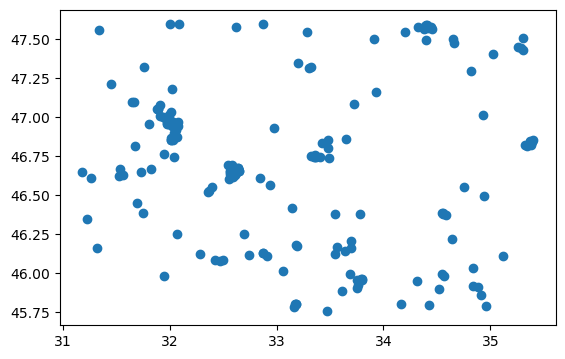

In [102]:
geodata1.plot()

In [103]:
#plotting the median value location of nodes created by each usercrs={'init':'epsg:4326'}
geometry2=[Point(xy) for xy in zip(median_loc["longitude"], median_loc["latitude"])]

C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

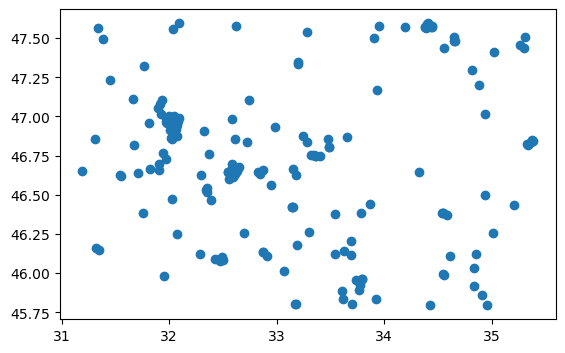

In [104]:
geodata2=gpd.GeoDataFrame(median_loc,crs=crs, geometry=geometry2)
geodata2.plot()

C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

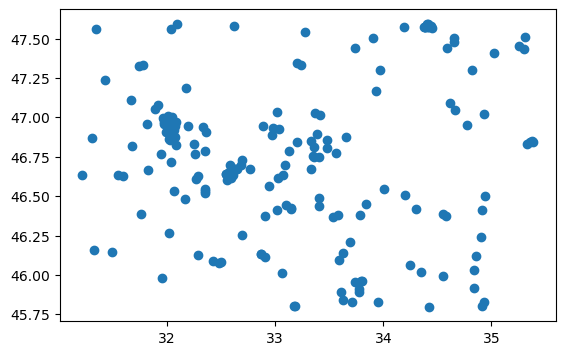

In [105]:
#plotting the mean value of locations

crs={'init':'epsg:4326'}
geometry3=[Point(xy) for xy in zip(mean_loc["longitude"], mean_loc["latitude"])]
geodata3=gpd.GeoDataFrame(mean_loc,crs=crs, geometry=geometry3)
geodata3.plot()

In [106]:
#importing shapefile of Ukraine

shapefile = gpd.read_file("C:/Users/Shruti/CST4090/ukr_admbnda_sspe_20230201_shp/ukr_admbnda_sspe_20230201_SHP/ukr_admbnda_adm1_sspe_20230201.shp")

Text(0.5, 0.98, 'kherson mapping pattern')

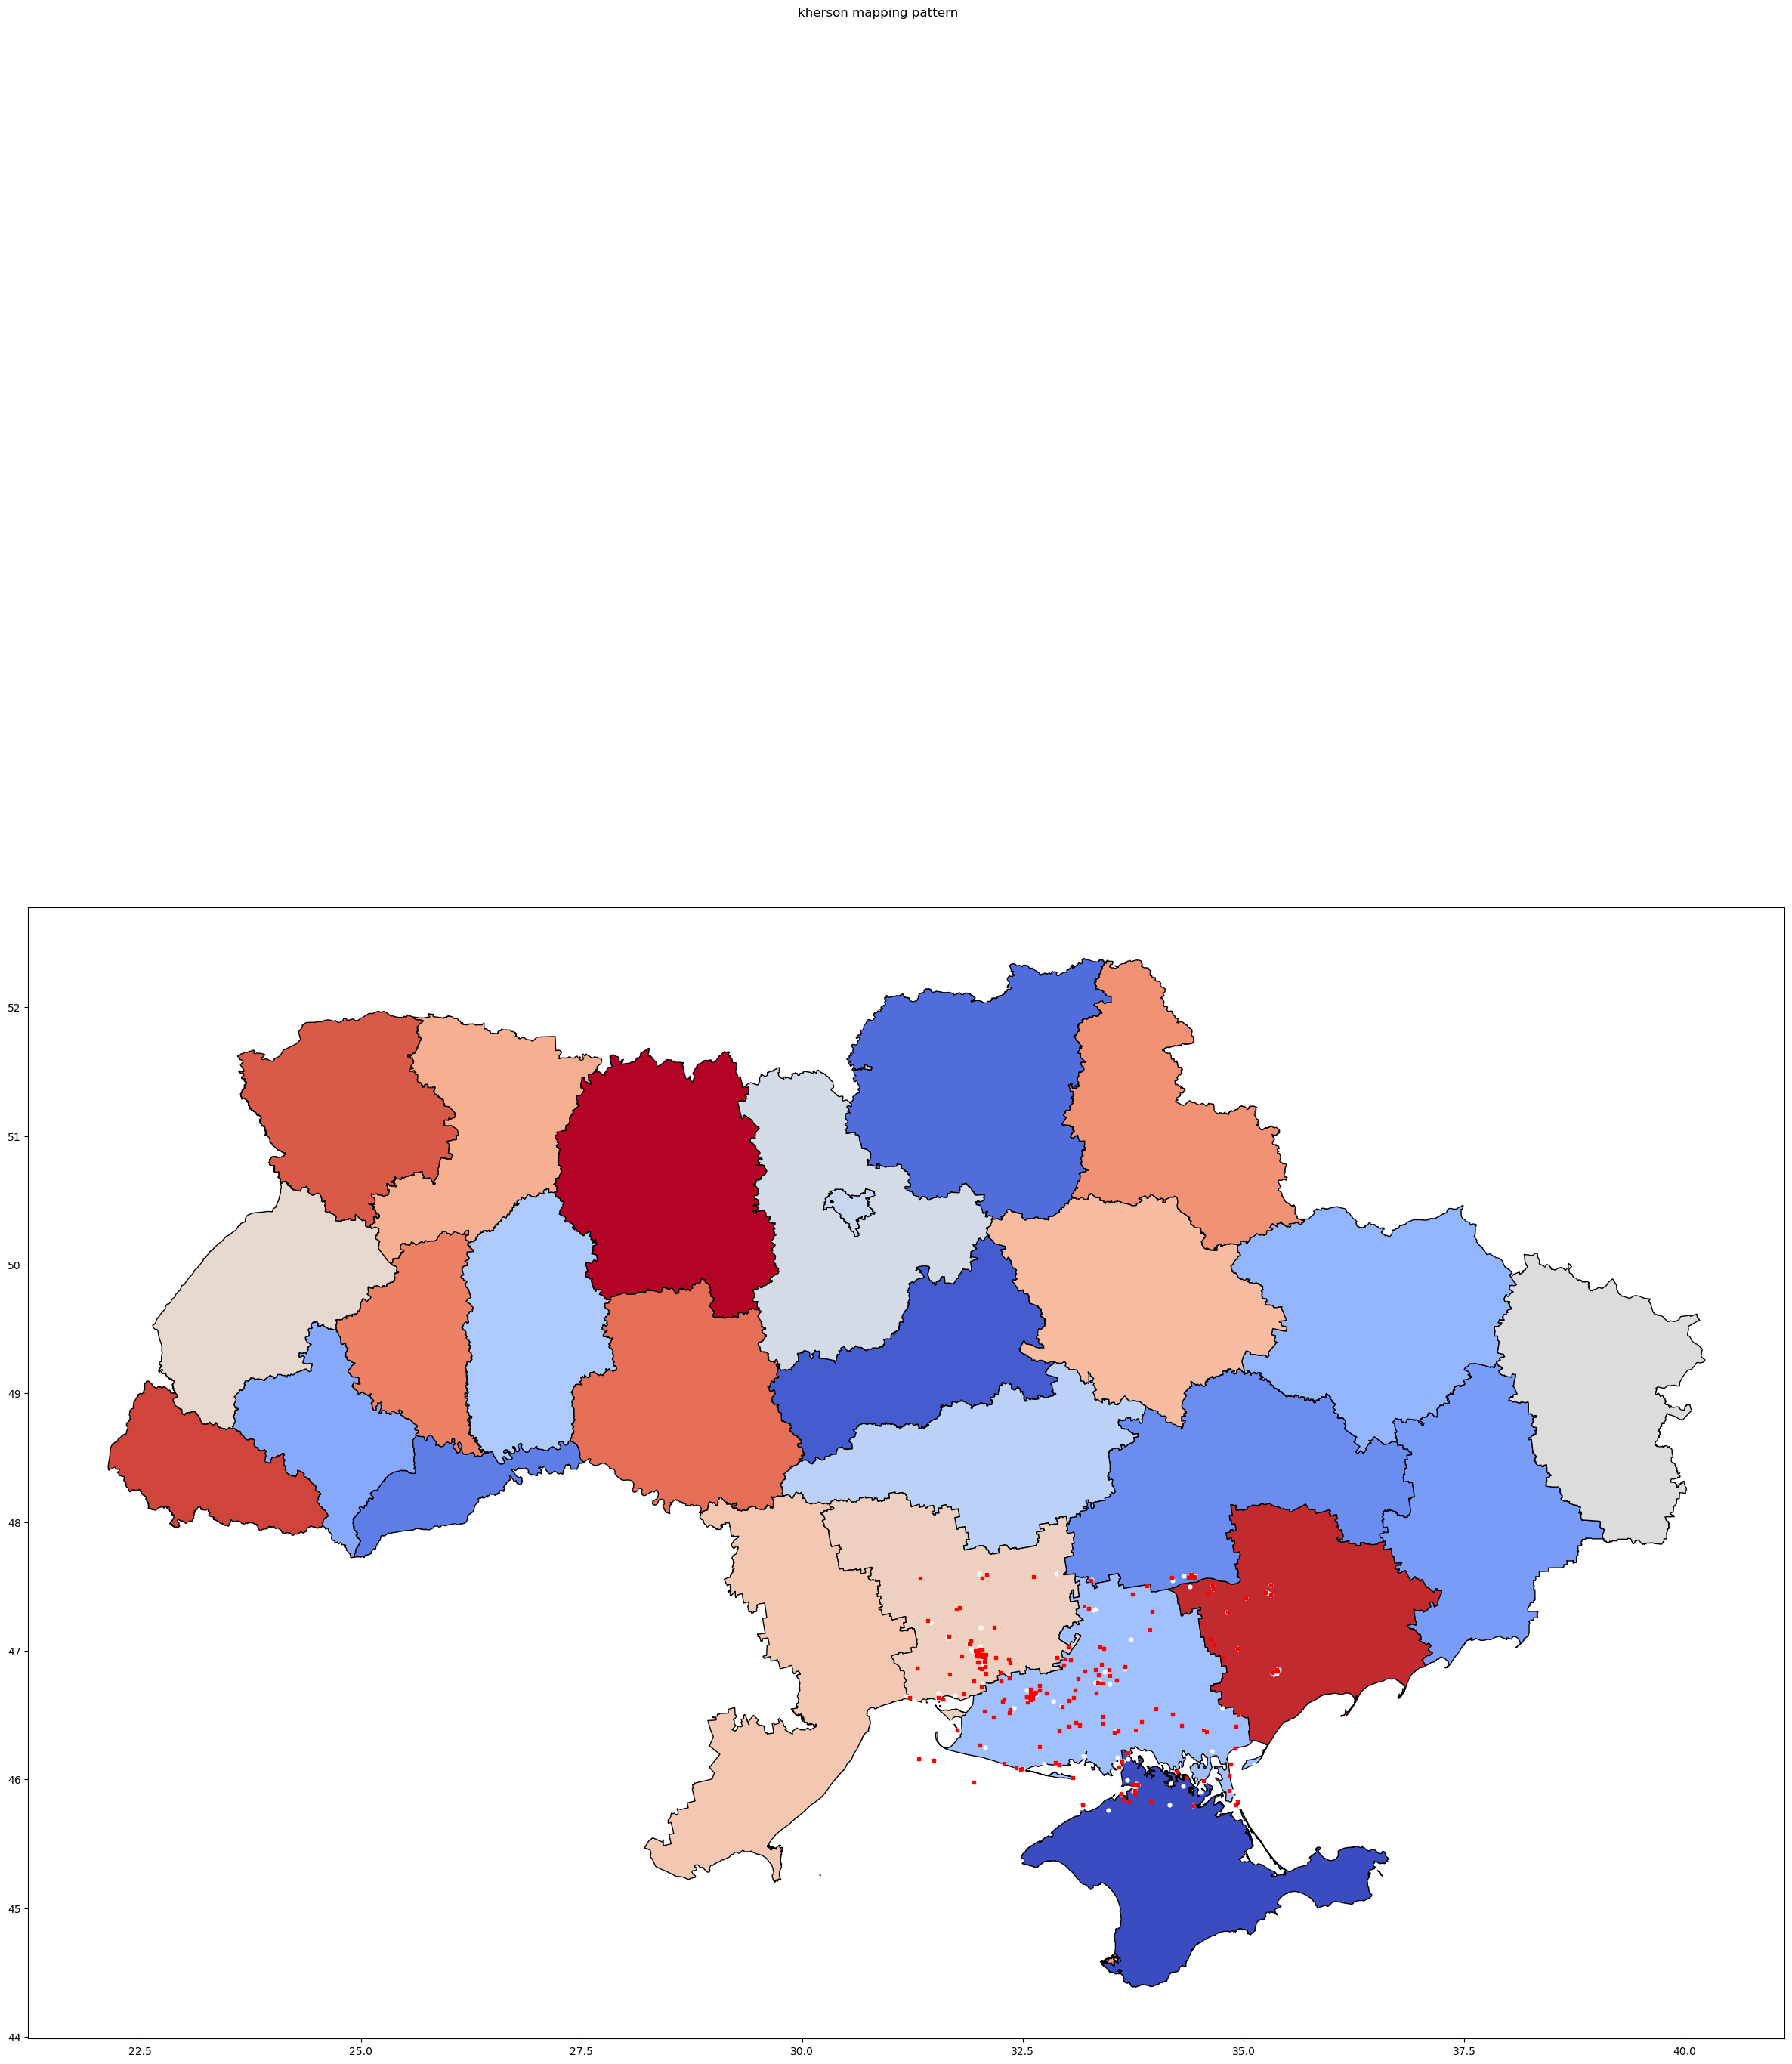

In [107]:
#creating plot with Ukraine's map  with locations of first node and mean point 


fig,ax = plt.subplots(figsize=(30, 40))


color = 'blue'

cmapblue = LinearSegmentedColormap.from_list('custom_cmap', [(0, color), (1, color)], N=256)
shapefile.plot(facecolor='white', edgecolor='k',alpha=1,linewidth=1,cmap='coolwarm',ax=ax)


g=geodata1.plot(ax=ax,color='white', marker='o',markersize=12,legend=True);
g=geodata3.plot(ax=ax,color='red',marker='s',markersize=12,legend=True);

fig.suptitle('kherson mapping pattern', fontsize=12)


### *Analysing dispersion of mapping using Statistical measure*

In [108]:
import statistics as st
df27=kherson3.loc[:,['uid','latitude','longitude']]
df27.head()

uid   latitude  longitude
0   2481418  46.732528  33.487437
1  10791758  46.990177  31.909575
2  10791758  47.017503  32.805654
3  10791758  46.825648  32.742439
4  10791758  46.825648  32.742439

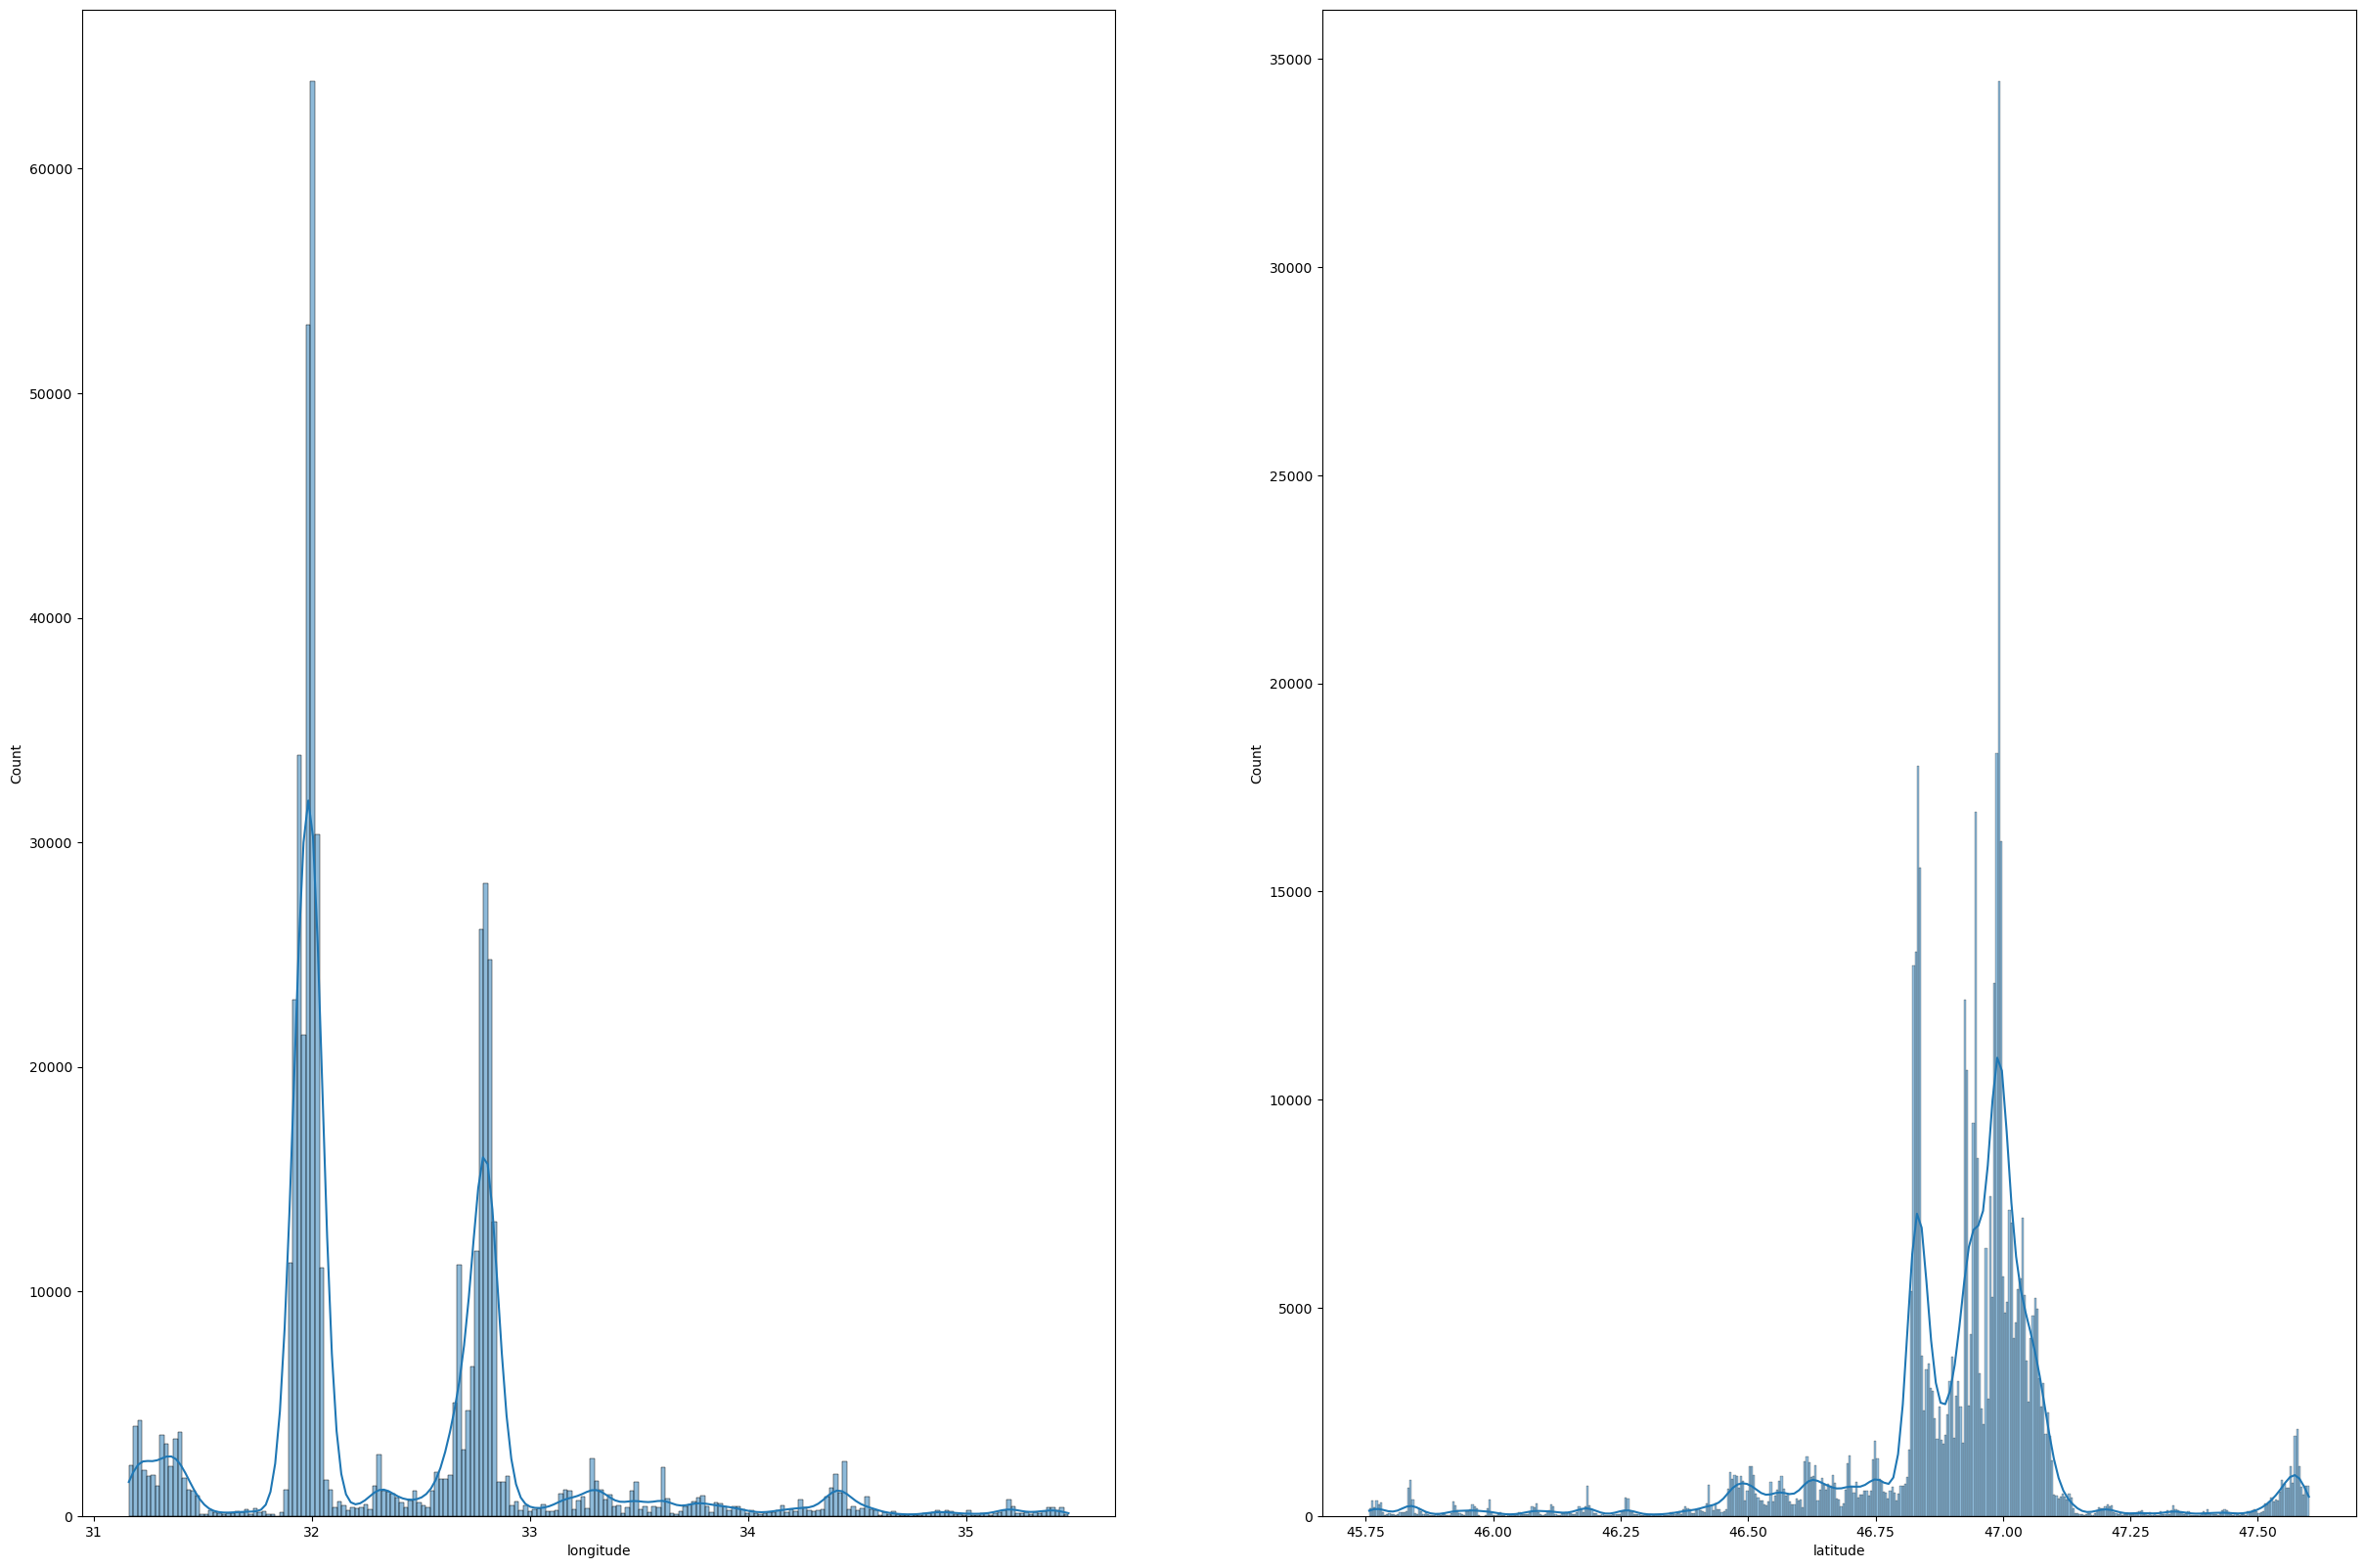

In [109]:
# frequency distribution of latitude and longitude measures

fig,axes= plt.subplots(1,2,figsize=(30, 20))

axes = axes.flatten()

s=sb.histplot(data=df27, x='longitude',bins='auto',kde=True,ax=axes[0])
s=sb.histplot(data=df27, x='latitude',bins='auto',kde=True,ax=axes[1])




In [110]:
#calculating standard deviation of complete dataset 

p_std_lat= st.pstdev(df27['latitude'])
p_std_lon= st.pstdev(df27['longitude'])


In [111]:
print('Population std for latitude: ',p_std_lat)
print('Population std for longitude: ',p_std_lon)

Population std for latitude:  0.24255760285495984
Population std for longitude:  0.709244827450535


In [112]:
#calculating mean of each dataset

p_mean_lat=df27['latitude'].mean()
p_mean_lon=df27['longitude'].mean()

In [113]:
print('Population mean for latitude: ',p_mean_lat)
print('Population mean for latitude: ',p_mean_lon)

Population mean for latitude:  46.90857221704599
Population mean for latitude:  32.365963699483935


In [114]:
#calculation for Coefficient of variance to understand the variability in mapping

cv_lat=(p_std_lat/p_mean_lat)*100
cv_lon=(p_std_lon/p_mean_lon)*100
print('CV for latitude: ',cv_lat)
print('CV for longitude: ',cv_lon)

CV for latitude:  0.5170858787443917
CV for longitude:  2.191329243386143


In [115]:
#calculating std for each contributor group

df28=df27.groupby('uid').agg('std',numeric_only='True')
df28=df28.reset_index()

In [116]:
df28

uid  latitude  longitude
0        5359       NaN        NaN
1       15110  0.022430   0.145643
2       71862  0.009615   0.013094
3       95117  0.033218   0.228272
4      161619  0.103469   0.218696
..        ...       ...        ...
190  14881636  0.104689   0.669421
191  14992380       NaN        NaN
192  15000002  0.253566   1.433850
193  15064591  0.042750   0.116348
194  15128598       NaN        NaN

[195 rows x 3 columns]

In [117]:
df29=df28.merge(mean_loc,on='uid',how='left')

In [118]:
df29
df29= df29.rename(columns={'latitude_x': 'latitude'})
df29= df29.rename(columns={'longitude_x': 'longitude'})
df29= df29.rename(columns={'latitude_y': 'mean_lat'})
df29= df29.rename(columns={'longitude_y': 'mean_long'})
df29

uid  latitude  longitude   mean_lat  mean_long
0        5359       NaN        NaN  45.803544  33.173497
1       15110  0.022430   0.145643  46.642540  32.544376
2       71862  0.009615   0.013094  47.576741  34.444729
3       95117  0.033218   0.228272  45.802663  34.908467
4      161619  0.103469   0.218696  46.440743  33.098996
..        ...       ...        ...        ...        ...
190  14881636  0.104689   0.669421  46.903716  32.355941
191  14992380       NaN        NaN  47.347136  33.196919
192  15000002  0.253566   1.433850  46.927427  33.036026
193  15064591  0.042750   0.116348  47.325500  31.743346
194  15128598       NaN        NaN  46.746220  33.356236

[195 rows x 5 columns]

In [119]:
#calculation for CV applied to each group

df29['CV_lat']=(df29['latitude']/df29['mean_lat']*100)
df29

uid  latitude  longitude   mean_lat  mean_long    CV_lat
0        5359       NaN        NaN  45.803544  33.173497       NaN
1       15110  0.022430   0.145643  46.642540  32.544376  0.048089
2       71862  0.009615   0.013094  47.576741  34.444729  0.020210
3       95117  0.033218   0.228272  45.802663  34.908467  0.072523
4      161619  0.103469   0.218696  46.440743  33.098996  0.222798
..        ...       ...        ...        ...        ...       ...
190  14881636  0.104689   0.669421  46.903716  32.355941  0.223199
191  14992380       NaN        NaN  47.347136  33.196919       NaN
192  15000002  0.253566   1.433850  46.927427  33.036026  0.540337
193  15064591  0.042750   0.116348  47.325500  31.743346  0.090331
194  15128598       NaN        NaN  46.746220  33.356236       NaN

[195 rows x 6 columns]

In [120]:
df29['CV_lon']=(df29['longitude']/df29['mean_long'])*100
df29

uid  latitude  longitude   mean_lat  mean_long    CV_lat    CV_lon
0        5359       NaN        NaN  45.803544  33.173497       NaN       NaN
1       15110  0.022430   0.145643  46.642540  32.544376  0.048089  0.447521
2       71862  0.009615   0.013094  47.576741  34.444729  0.020210  0.038014
3       95117  0.033218   0.228272  45.802663  34.908467  0.072523  0.653915
4      161619  0.103469   0.218696  46.440743  33.098996  0.222798  0.660733
..        ...       ...        ...        ...        ...       ...       ...
190  14881636  0.104689   0.669421  46.903716  32.355941  0.223199  2.068927
191  14992380       NaN        NaN  47.347136  33.196919       NaN       NaN
192  15000002  0.253566   1.433850  46.927427  33.036026  0.540337  4.340263
193  15064591  0.042750   0.116348  47.325500  31.743346  0.090331  0.366528
194  15128598       NaN        NaN  46.746220  33.356236       NaN       NaN

[195 rows x 7 columns]

# Analysing OSM history data for kherson Aftere the bombing

In [121]:
#querying postgres to fetch data of kherson for the 6 months after the bombing 
query3 = "SELECT * FROM merged2 WHERE timestamp >=TO_DATE('2022-02-24','yyyy-mm-dd') AND timestamp <TO_DATE('2022-08-26','yyyy-mm-dd') AND latitude BETWEEN 45.7565682 AND 47.600194 AND longitude BETWEEN 31.1590964 AND 35.4680391;"

In [122]:
#storing in a dataframe
kherson_2 = pd.read_sql(query3, con=engine)
kherson_2.head()

id  changeset deleted                  timestamp       uid  \
0  8229795228  122815816   false  2022-06-24 20:24:10+01:00   1538111   
1  8229795228  122815816   false  2022-06-24 20:24:10+01:00   1538111   
2  6810314881  125082024   false  2022-08-18 22:50:41+01:00  15839400   
3  6810314881  125082024   false  2022-08-18 22:50:41+01:00  15839400   
4  9951603617  124868151   false  2022-08-13 22:29:59+01:00   8978331   

         user  version visibility    tp   extra   latitude  longitude  
0   avinet_ua        2       true  node  197185  46.650569  32.665434  
1   avinet_ua        2       true  node  197185  46.650572  32.665435  
2      gololo        2       true  node  195285  46.687482  32.700937  
3      gololo        2       true  node  195285  46.687528  32.701004  
4  Velikodsky        1       true  node  142615  46.701379  33.417940

In [123]:
#removing duplicate columns 
kherson_2=kherson_2.drop_duplicates(subset=['id', 'changeset'],keep='first',ignore_index=True)
kherson_2.head()

id  changeset deleted                  timestamp       uid  \
0  8229795228  122815816   false  2022-06-24 20:24:10+01:00   1538111   
1  6810314881  125082024   false  2022-08-18 22:50:41+01:00  15839400   
2  9951603617  124868151   false  2022-08-13 22:29:59+01:00   8978331   
3  9932366809  124492883   false  2022-08-04 19:30:43+01:00   4464045   
4  9940409723  124654720   false  2022-08-08 20:24:38+01:00   8978331   

              user  version visibility    tp   extra   latitude  longitude  
0        avinet_ua        2       true  node  197185  46.650569  32.665434  
1           gololo        2       true  node  195285  46.687482  32.700937  
2       Velikodsky        1       true  node  142615  46.701379  33.417940  
3  Anton Melnichuk        1       true  node   36899  46.879115  33.462210  
4       Velikodsky        1       true  node   85195  46.690982  33.541212

In [124]:
#splitting date only from timestamp and adding to the daraframe
kherson_2['date'] = kherson_2.loc[:, 'timestamp'].astype(str).str.split().str[0]
kherson_2

id  changeset deleted                  timestamp       uid  \
0       8229795228  122815816   false  2022-06-24 20:24:10+01:00   1538111   
1       6810314881  125082024   false  2022-08-18 22:50:41+01:00  15839400   
2       9951603617  124868151   false  2022-08-13 22:29:59+01:00   8978331   
3       9932366809  124492883   false  2022-08-04 19:30:43+01:00   4464045   
4       9940409723  124654720   false  2022-08-08 20:24:38+01:00   8978331   
...            ...        ...     ...                        ...       ...   
112180  9864955205  123170085   false  2022-07-04 05:00:40+01:00  16397532   
112181  9583540080  118561992   false  2022-03-16 17:51:40+00:00   9630102   
112182  2600969187  124224754   false  2022-07-29 11:42:16+01:00   2923836   
112183  4754172310  124835153   false  2022-08-12 22:43:35+01:00   8978331   
112184  4754172310  124854051   false  2022-08-13 14:51:19+01:00   8978331   

                   user  version visibility    tp   extra   latitude  \
0             avinet_ua        2       true  node  197185  46.650569   
1                gololo        2       true  node  195285  46.687482   
2            Velikodsky        1       true  node  142615  46.701379   
3       Anton Melnichuk        1       true  node   36899  46.879115   
4            Velikodsky        1       true  node   85195  46.690982   
...                 ...      ...        ...   ...     ...        ...   
112180           HomeUA        1       true  node  230729  47.563547   
112181          muninnn        1       true  node   27297  45.763625   
112182        VileGecko        2       true  node  134317  46.889648   
112183       Velikodsky        2       true  node   17066  46.706749   
112184       Velikodsky        3       true  node   17067  46.706749   

        longitude        date  
0       32.665434  2022-06-24  
1       32.700937  2022-08-18  
2       33.417940  2022-08-13  
3       33.462210  2022-08-04  
4       33.541212  2022-08-08  
...           ...         ...  
112180  31.333523  2022-07-04  
112181  34.020852  2022-03-16  
112182  32.842814  2022-07-29  
112183  33.462707  2022-08-12  
112184  33.462707  2022-08-13  

[112185 rows x 13 columns]

### *Assigning Human and Bot categories to changesets*

In [125]:
#taking only useful columns
kherson4=kherson_2.drop(['latitude','longitude','extra'],axis=1)
kherson4.head()

id  changeset deleted                  timestamp       uid  \
0  8229795228  122815816   false  2022-06-24 20:24:10+01:00   1538111   
1  6810314881  125082024   false  2022-08-18 22:50:41+01:00  15839400   
2  9951603617  124868151   false  2022-08-13 22:29:59+01:00   8978331   
3  9932366809  124492883   false  2022-08-04 19:30:43+01:00   4464045   
4  9940409723  124654720   false  2022-08-08 20:24:38+01:00   8978331   

              user  version visibility    tp        date  
0        avinet_ua        2       true  node  2022-06-24  
1           gololo        2       true  node  2022-08-18  
2       Velikodsky        1       true  node  2022-08-13  
3  Anton Melnichuk        1       true  node  2022-08-04  
4       Velikodsky        1       true  node  2022-08-08

In [126]:
#counting number of edits in each changeset and then assigning a category [humna/bot] based on the counts
#for this classification, it is assumed that a changeset having more than 1000 edits in one time is contributed by automated script

db1=kherson4.drop(['deleted','timestamp','uid','user','version','visibility','tp'],axis=1)
db1=db1.groupby(['date','changeset']).count()
db1

id
date       changeset     
2022-02-24 117807765    1
           117822488  270
           117823044  304
           117823473  195
           117827369  186
...                   ...
2022-08-25 125338668    2
           125338694    3
           125338719    5
           125338768    4
           125339205    3

[1142 rows x 1 columns]

In [127]:
db1['category']=db1['id'].apply(lambda x:'human' if x <1000 else 'bot')
db1

id category
date       changeset              
2022-02-24 117807765    1    human
           117822488  270    human
           117823044  304    human
           117823473  195    human
           117827369  186    human
...                   ...      ...
2022-08-25 125338668    2    human
           125338694    3    human
           125338719    5    human
           125338768    4    human
           125339205    3    human

[1142 rows x 2 columns]

In [128]:
#total changesets contribued by each -bot and human
db1.groupby(['category']).count()

id
category      
bot         13
human     1129

In [129]:
#adding category to the original dataframe 
kherson4=kherson4.merge(db1['category'], on='changeset', how='left')
kherson4.head(7)

id  changeset deleted                  timestamp       uid  \
0  8229795228  122815816   false  2022-06-24 20:24:10+01:00   1538111   
1  6810314881  125082024   false  2022-08-18 22:50:41+01:00  15839400   
2  9951603617  124868151   false  2022-08-13 22:29:59+01:00   8978331   
3  9932366809  124492883   false  2022-08-04 19:30:43+01:00   4464045   
4  9940409723  124654720   false  2022-08-08 20:24:38+01:00   8978331   
5  9943428111  124701958   false  2022-08-09 21:13:09+01:00   8978331   
6  9962722100  125082757   false  2022-08-18 23:30:56+01:00  15839400   

              user  version visibility    tp        date category  
0        avinet_ua        2       true  node  2022-06-24    human  
1           gololo        2       true  node  2022-08-18      bot  
2       Velikodsky        1       true  node  2022-08-13      bot  
3  Anton Melnichuk        1       true  node  2022-08-04    human  
4       Velikodsky        1       true  node  2022-08-08    human  
5       Velikodsky        1       true  node  2022-08-09    human  
6           gololo        1       true  node  2022-08-18      bot

### *Comparing the contribution done by Humans and Bots*

In [130]:
# date-wise grouping based on categories
db2=kherson4.groupby(['date','category']).count()
db2.head(10)

id  changeset  deleted  timestamp   uid  user  version  \
date       category                                                             
2022-02-24 human      956        956      956        956   956   956      956   
2022-02-25 human     2286       2286     2286       2286  2286  2286     2286   
2022-02-26 human     1661       1661     1661       1661  1661  1661     1661   
2022-02-27 human     1980       1980     1980       1980  1980  1980     1980   
2022-02-28 human     1281       1281     1281       1281  1281  1281     1281   
2022-03-01 bot       1238       1238     1238       1238  1238  1238     1238   
           human     2789       2789     2789       2789  2789  2789     2789   
2022-03-02 human      915        915      915        915   915   915      915   
2022-03-03 human       23         23       23         23    23    23       23   
2022-03-04 human      662        662      662        662   662   662      662   

                     visibility    tp  
date       category                    
2022-02-24 human            956   956  
2022-02-25 human           2286  2286  
2022-02-26 human           1661  1661  
2022-02-27 human           1980  1980  
2022-02-28 human           1281  1281  
2022-03-01 bot             1238  1238  
           human           2789  2789  
2022-03-02 human            915   915  
2022-03-03 human             23    23  
2022-03-04 human            662   662

In [131]:
#creating two sepearte datafarmes each having daily total contribution by human and bot respectively for the 6 months 
db3=db2.xs('human', level='category')
db4=db2.xs('bot', level='category')

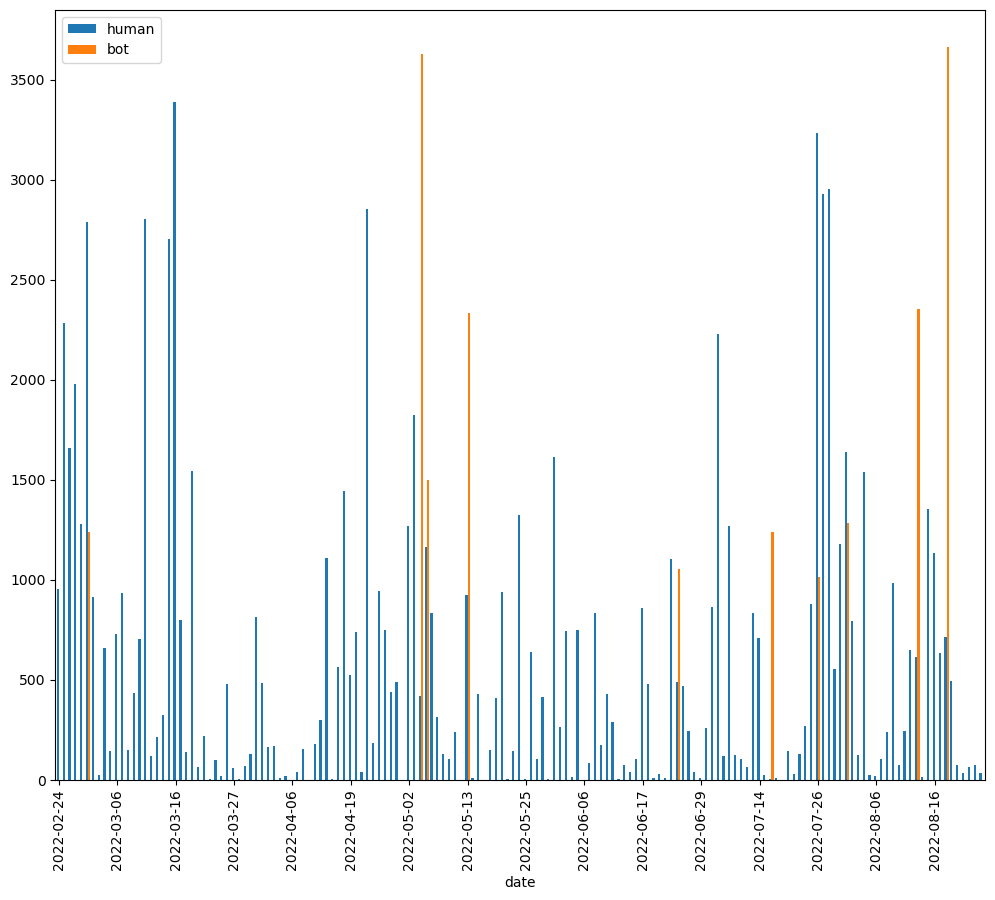

In [132]:
#plotting number of edits by both- human and bot category

x= db3.index
y=db3['changeset']
z=db4['changeset']

db5 = pd.DataFrame({
    'date': x,
    'human': y,
    'bot':z
})
db5 = db5.reset_index(drop=True)

step_size = 10 
ax = db5.plot(x="date", y=["human", "bot"],width=0.75, kind="bar", rot=90,figsize=(12, 10))
x_ticks = ax.get_xticks()
x_tick_labels = ax.get_xticklabels()

# to set x-axis labels based on the step size
ax.set_xticks(x_ticks[::step_size])
ax.set_xticklabels(x_tick_labels[::step_size])

plt.show()

### *Analysis of data for 1 week after the bombing*

In [133]:
#counting number of ediits per day for this week and plotting on bar graph
db6= kherson4.loc[(kherson4['date']>='2022-02-24') & (kherson4['date']<'2022-03-03'),:]
db6=db6.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
db6=db6.groupby(['date']).count()
db6.head(3)

id
date            
2022-02-24   956
2022-02-25  2286
2022-02-26  1661

In [134]:
#statistic measures of edits
db6.describe()

id
count     7.000000
mean   1872.285714
std    1078.254100
min     915.000000
25%    1118.500000
50%    1661.000000
75%    2133.000000
max    4027.000000

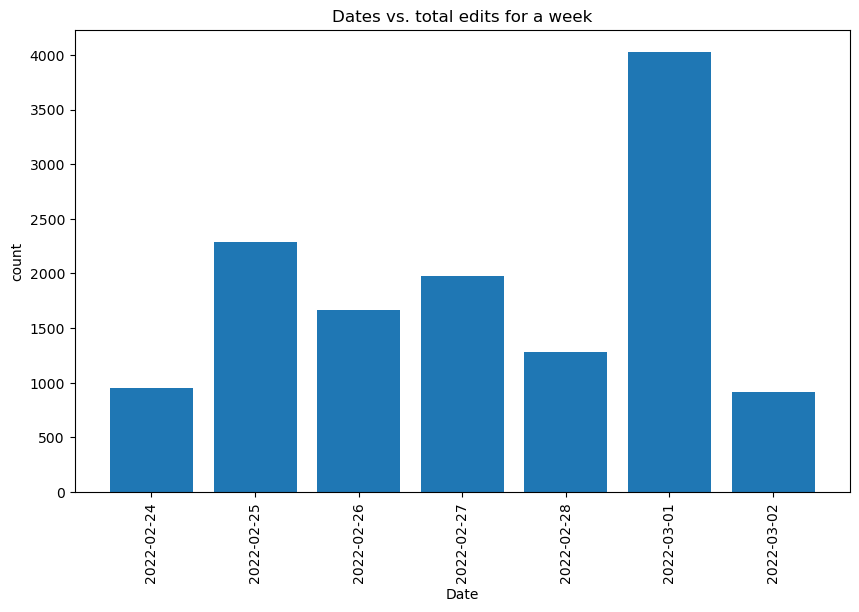

In [135]:
#using bar graph to plot the editing frequency

db6.index = pd.to_datetime(db6.index)
plt.figure(figsize=(10, 6))  
plt.bar(db6.index, db6['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for a week')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the month after the bombing*

In [136]:
#counting number of ediits per day for 1 month and plotting on bar graph
db7= kherson4.loc[(kherson4['date']>='2022-02-24') & (kherson4['date']<'2022-03-26'),:]
db7=db7.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
db7=db7.groupby(['date']).count()
db7.head()

id
date            
2022-02-24   956
2022-02-25  2286
2022-02-26  1661
2022-02-27  1980
2022-02-28  1281

In [137]:
db7.describe() #statistic measures of edits

id
count    29.000000
mean   1011.793103
std    1107.315589
min       6.000000
25%     147.000000
50%     706.000000
75%    1546.000000
max    4027.000000

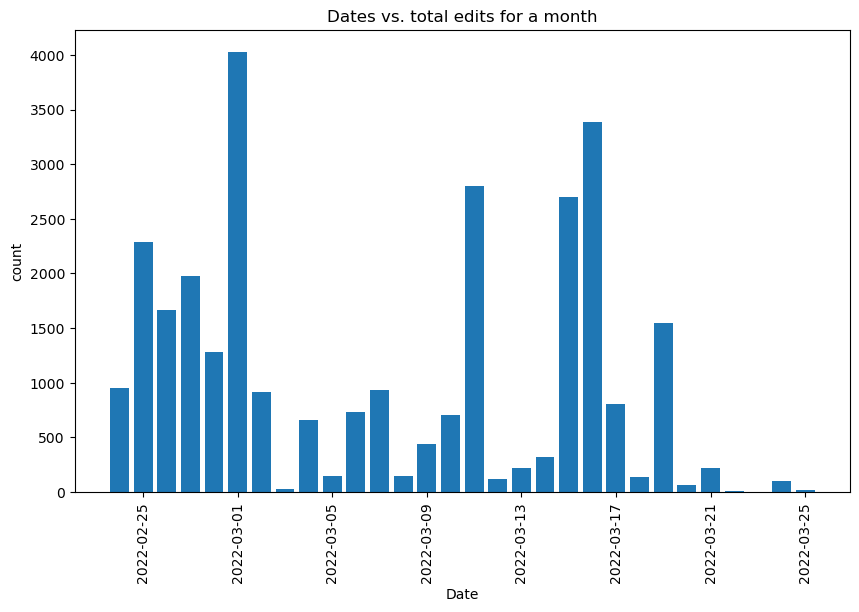

In [138]:
db7.index = pd.to_datetime(db7.index)
plt.figure(figsize=(10, 6))  
plt.bar(db7.index, db7['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for a month')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the 3 months after the bombing*

In [139]:
#counting number of ediits per day for the 3 months before bombing and plotting on bar graph
db8= kherson4.loc[(kherson4['date']>='2022-02-24') & (kherson4['date']<'2022-05-26'),:]
db8=db8.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
db8=db8.groupby(['date']).count()
db8.head()

id
date            
2022-02-24   956
2022-02-25  2286
2022-02-26  1661
2022-02-27  1980
2022-02-28  1281

In [140]:
db8.describe() #statistic measures of edits

id
count    81.000000
mean    748.543210
std     983.958613
min       1.000000
25%      98.000000
50%     323.000000
75%     938.000000
max    4045.000000

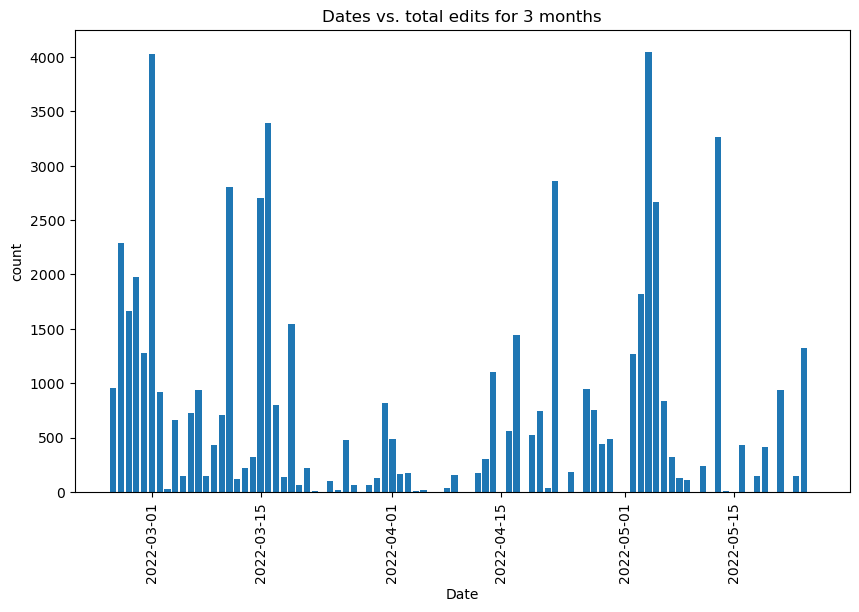

In [141]:
db8.index = pd.to_datetime(db8.index)
plt.figure(figsize=(10, 6))  
plt.bar(db8.index, db8['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for 3 months')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the 6 months after the bombing*

In [142]:
#counting number of ediits per day for the 6 months after bombing and plotting on bar graph
db9=kherson4.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
db9=db9.groupby(['date']).count()
db9.describe()

id
count   159.000000
mean    705.566038
std     964.325268
min       1.000000
25%      67.000000
50%     268.000000
75%     896.000000
max    4382.000000

In [143]:
#analysing frequency of edits for each month during these 6 months period
dbmar= kherson4.loc[(kherson4['date']>='2022-02-24') & (kherson4['date']<'2022-03-26'),:]
dbmar=dbmar.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbmar=dbmar.groupby(['date']).count()
dbmar=dbmar.reset_index()

In [144]:
dbapr= kherson4.loc[(kherson4['date']>='2022-03-26') & (kherson4['date']<'2022-04-26'),:]
dbapr=dbapr.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbapr=dbapr.groupby(['date']).count()
dbapr=dbapr.reset_index()

In [145]:
dbmay= kherson4.loc[(kherson4['date']>='2022-04-26') & (kherson4['date']<'2022-05-26'),:]
dbmay=dbmay.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbmay=dbmay.groupby(['date']).count()
dbmay=dbmay.reset_index()

In [146]:
dbjun= kherson4.loc[(kherson4['date']>='2022-05-26') & (kherson4['date']<'2022-06-26'),:]
dbjun=dbjun.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbjun=dbjun.groupby(['date']).count()
dbjun=dbjun.reset_index()

In [147]:
dbjul= kherson4.loc[(kherson4['date']>='2022-06-26') & (kherson4['date']<'2022-07-26'),:]
dbjul=dbjul.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbjul=dbjul.groupby(['date']).count()
dbjul=dbjul.reset_index()


In [148]:
dbaug= kherson4.loc[(kherson4['date']>='2022-07-26') & (kherson4['date']<'2022-08-26'),:]
dbaug=dbaug.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbaug=dbaug.groupby(['date']).count()
dbaug=dbaug.reset_index()


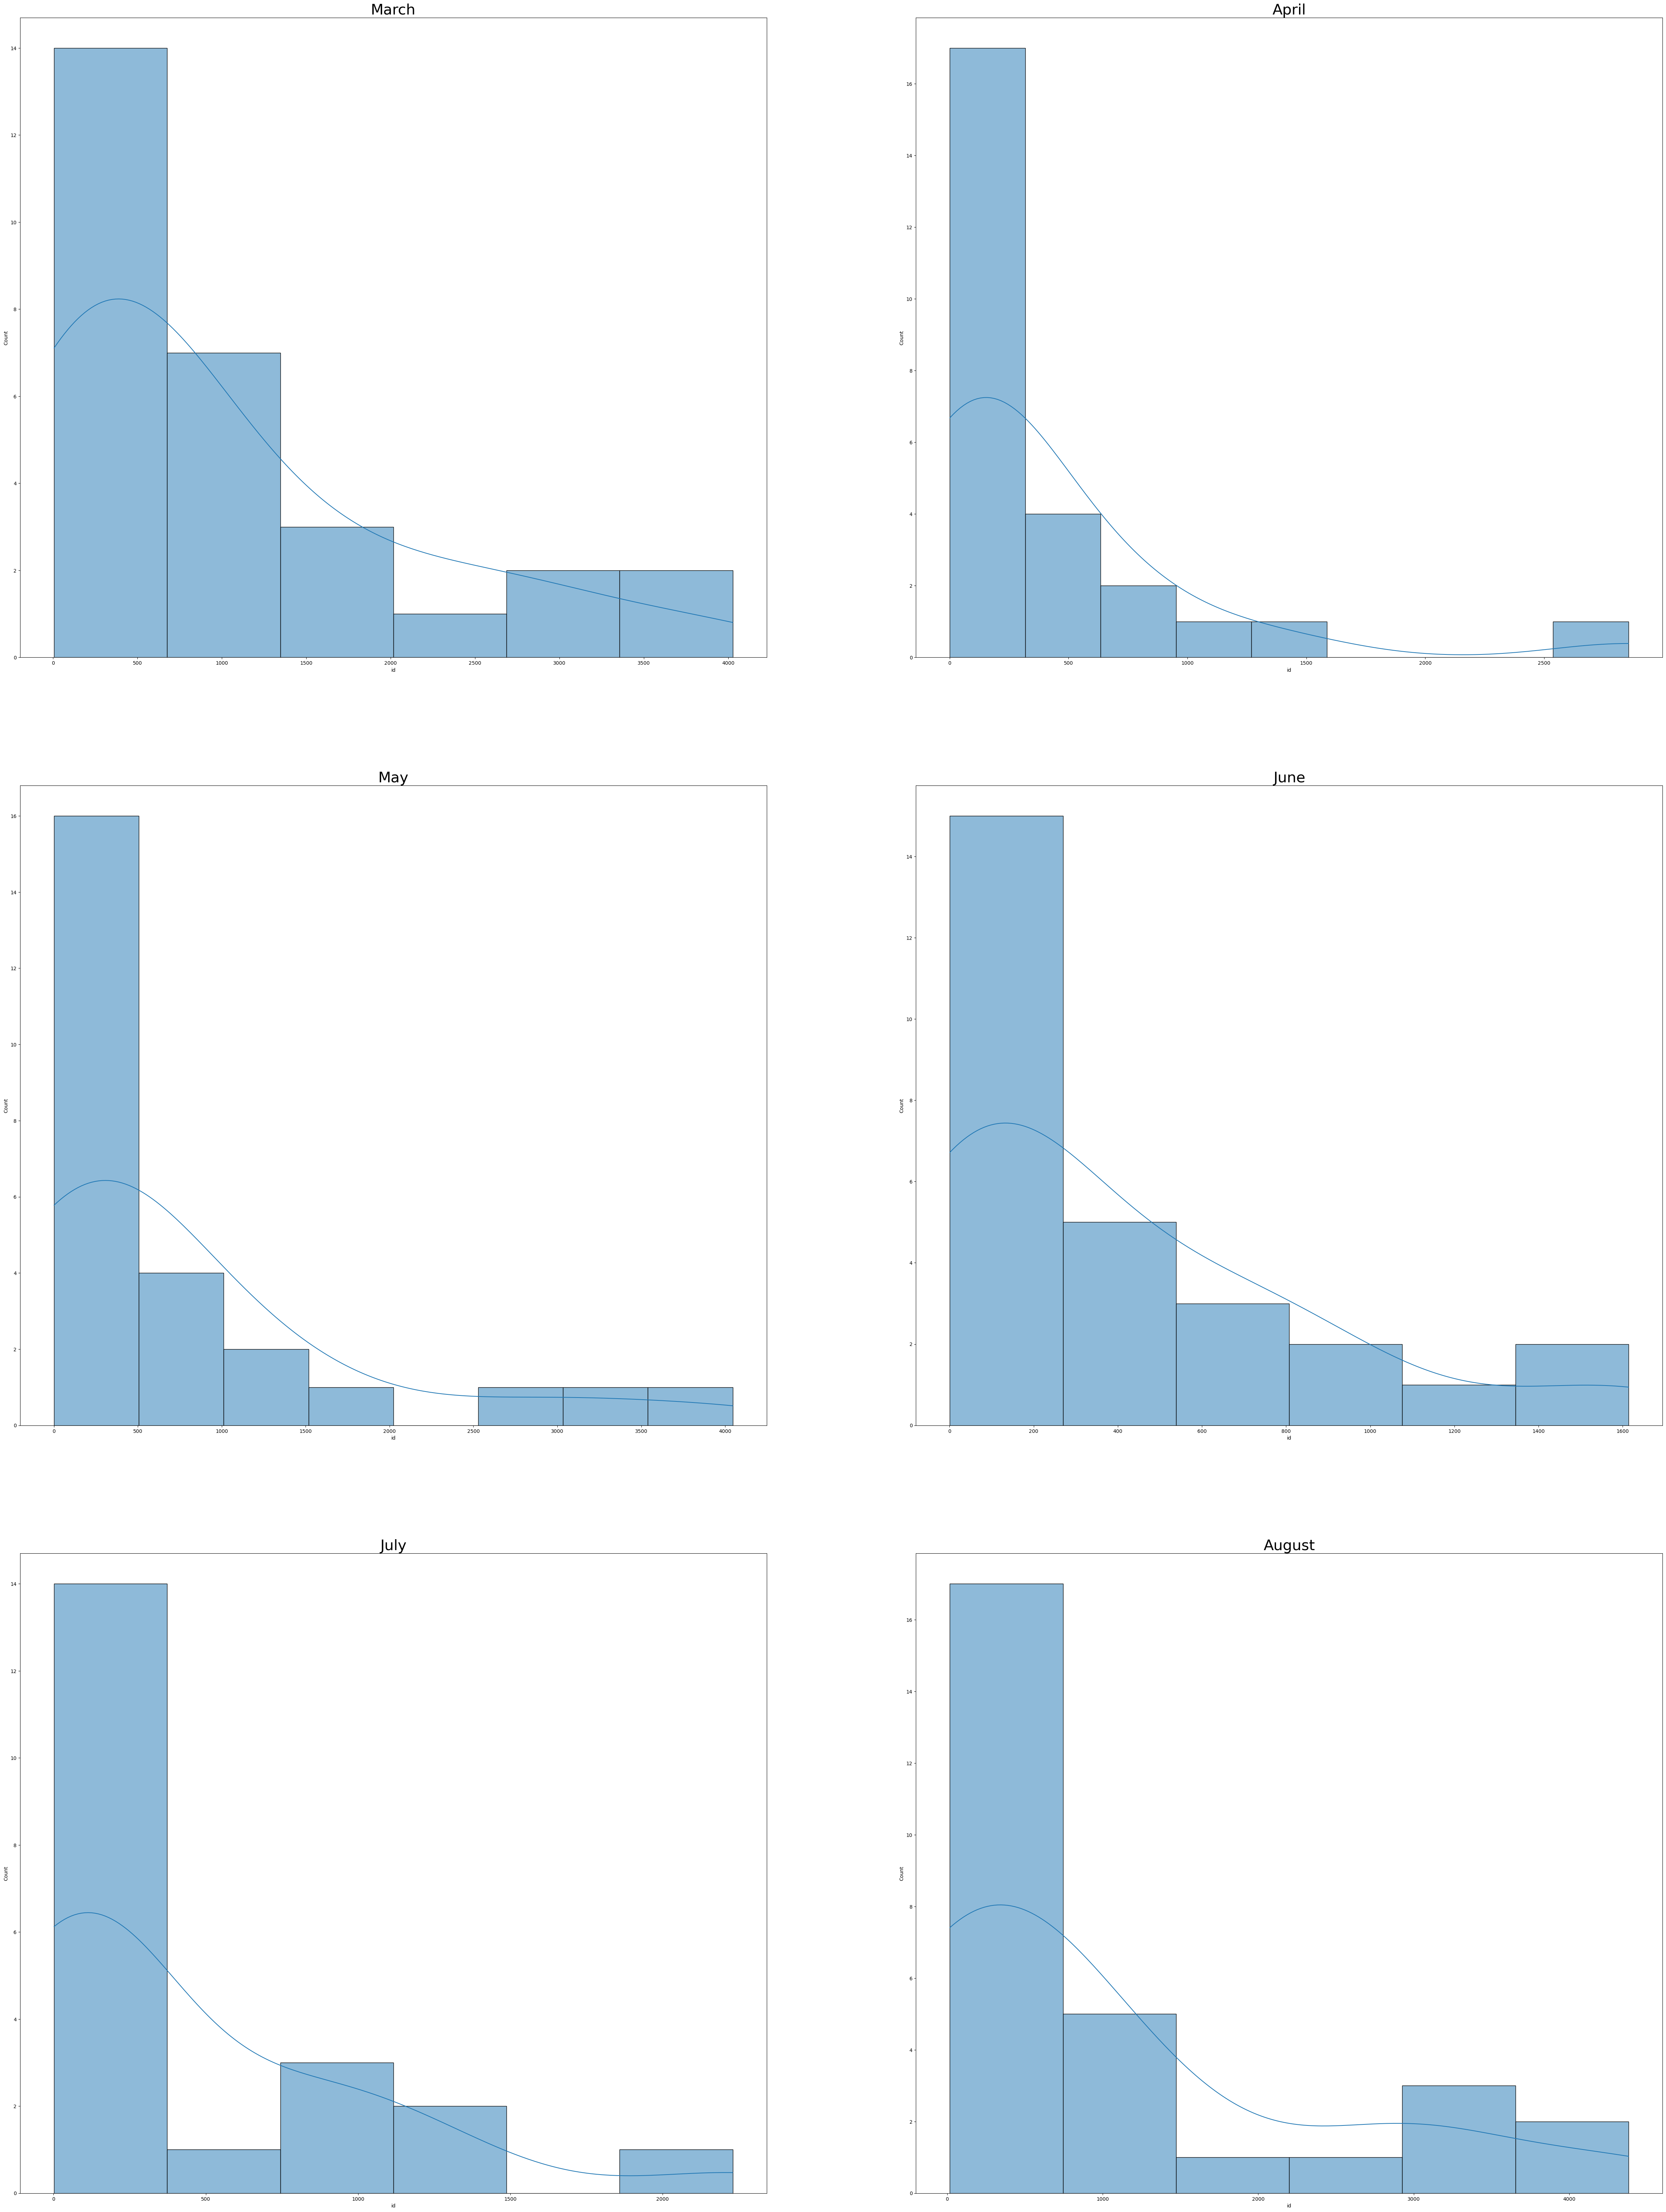

In [149]:
#histogram for frequency distributin 

fig,axes= plt.subplots(3,2,figsize=(60, 80))

axes = axes.flatten()

s=sb.histplot(data=dbmar, x='id',bins='auto',kde=True,ax=axes[0]).set_title('March',fontsize = 30)
s=sb.histplot(data=dbapr, x='id',bins='auto',kde=True,ax=axes[1]).set_title('April',fontsize = 30)
s=sb.histplot(data=dbmay, x='id',bins='auto',kde=True,ax=axes[2]).set_title('May',fontsize = 30)
s=sb.histplot(data=dbjun, x='id',bins='auto',kde=True,ax=axes[3]).set_title('June',fontsize = 30)
s=sb.histplot(data=dbjul, x='id',bins='auto',kde=True,ax=axes[4]).set_title('July',fontsize = 30)
s=sb.histplot(data=dbaug, x='id',bins='auto',kde=True,ax=axes[5]).set_title('August',fontsize = 30)

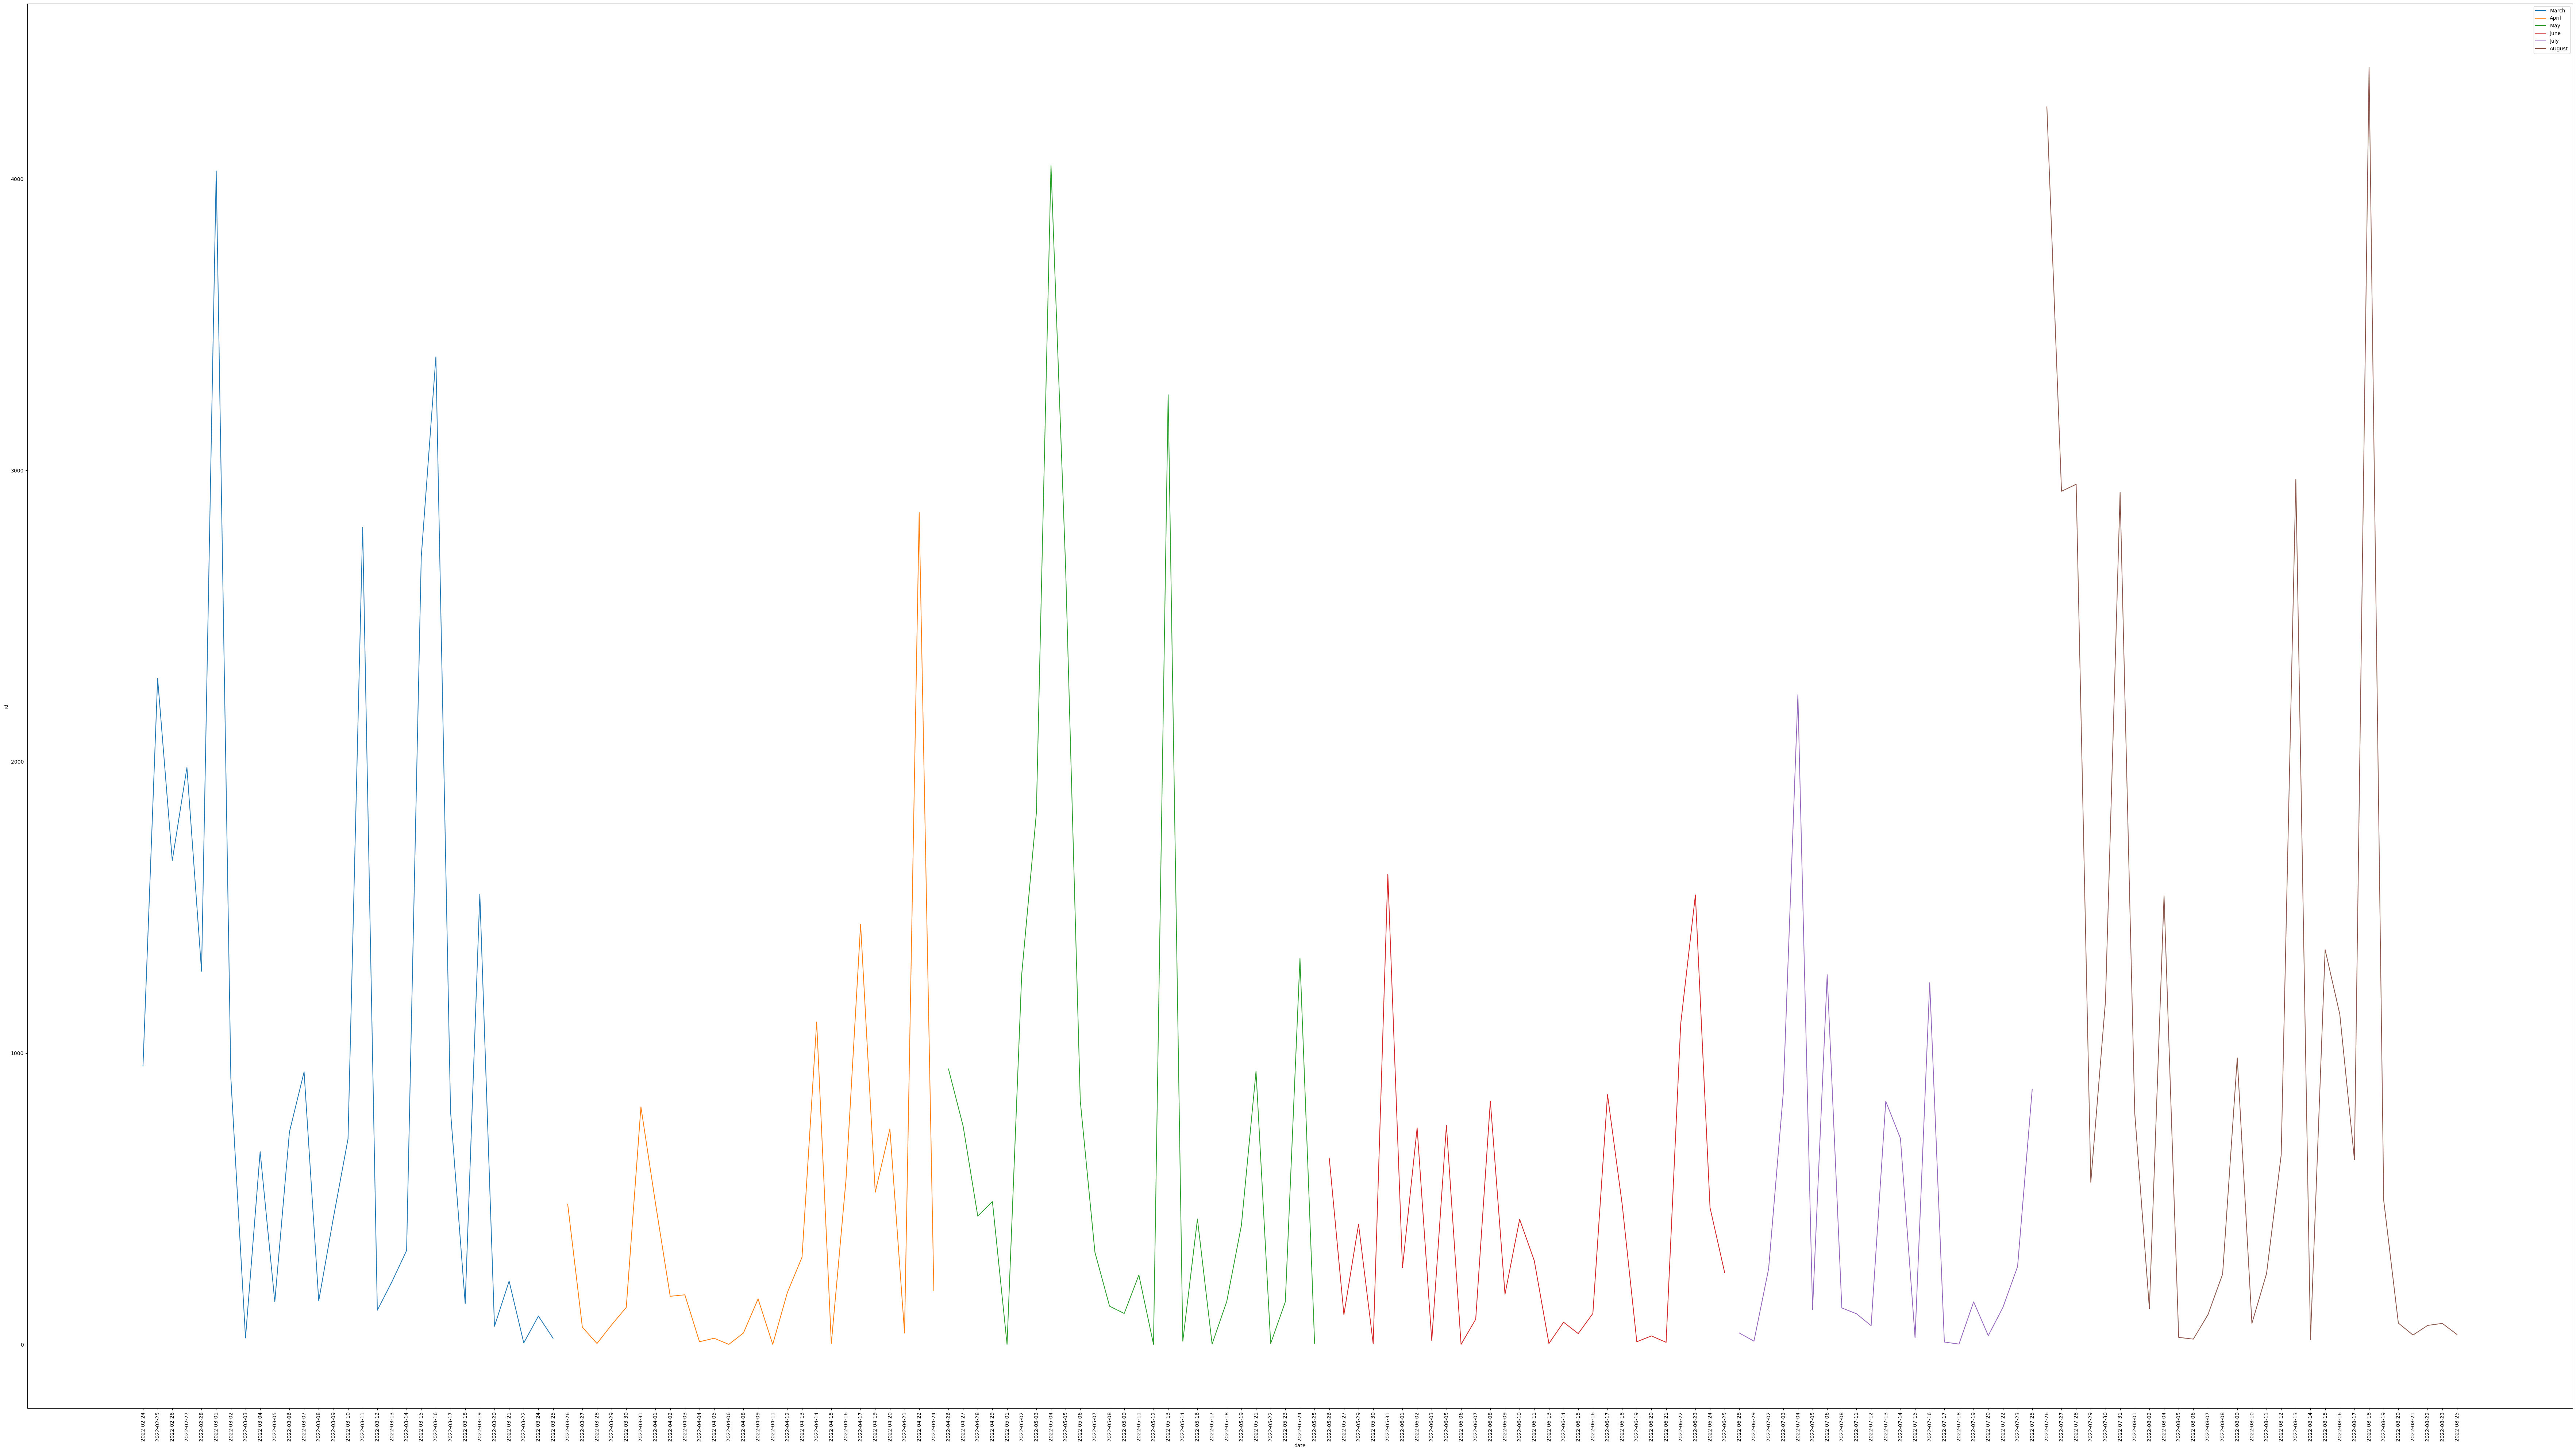

In [150]:
#trend chart to understand the editting pattern during 6 months befire bombing

fig = plt.subplots(figsize=(90, 50))
s=sb.lineplot(x='date', y='id', data=dbmar,label='March')
s=sb.lineplot(x='date', y='id', data=dbapr,label='April')
s=sb.lineplot(x='date', y='id', data=dbmay,label='May')
s=sb.lineplot(x='date', y='id', data=dbjun,label='June')
s=sb.lineplot(x='date', y='id', data=dbjul,label='July')
s=sb.lineplot(x='date', y='id', data=dbaug,label='AUgust')
plt.xticks(rotation=90)

plt.show()

### *Analysing editing frequency at contributor level*

In [151]:
#working on number of changesets and number of edits by each user during the 6 months

db10=kherson4.loc[kherson4['category']=='human']
db11=kherson4.loc[kherson4['category']=='bot']

db10=db10.drop(['deleted','timestamp','user','version','visibility','tp','date'], axis=1)
db11=db11.drop(['deleted','timestamp','user','version','visibility','tp','date'], axis=1)

In [152]:
#counting unique changesets added by each user during 6 months

db12=db10.groupby('uid')['changeset'].nunique()
db13=db11.groupby('uid')['changeset'].nunique()

In [153]:
#number of unique changesets posted by each contributors

changesets2 = db12.reset_index()
changesets2

uid  changeset
0       18069          1
1       27454          1
2       39040          4
3       47756          4
4       48157          2
..        ...        ...
167  16515532          3
168  16526922          2
169  16563511          5
170  16674070          1
171  16763000          1

[172 rows x 2 columns]

In [154]:
#counting the changesets added bu software bots during the period
changesets_bot2= db13.reset_index()
changesets_bot2

uid  changeset
0     76295          1
1    204049          1
2   6617477          1
3   8978331          4
4   9630102          1
5  15839400          5

In [155]:

changesets_bot2['uid'].isin(changesets_bot2['uid']) #automated scripts were added by the same users as those listed in 'human' category 

0    True
1    True
2    True
3    True
4    True
5    True
Name: uid, dtype: bool

In [156]:
#grouping data on user and counting the total contribution made by each user during the whole period
db14=db10.drop(['changeset','category'],axis=1)
id_counts2=db14.groupby(['uid']).count()

id_counts2=id_counts2.reset_index()
id_counts2

uid   id
0       18069   19
1       27454   55
2       39040  201
3       47756  937
4       48157   30
..        ...  ...
167  16515532    4
168  16526922    2
169  16563511    6
170  16674070    1
171  16763000   33

[172 rows x 2 columns]

In [157]:
# Grouping users based on total contribution using the values of 25% and 75% values of quantiles 

id_counts2['contribution level']=id_counts2['id'].apply(lambda x: 'inactive' if x < 2000 else ('casual mapper' if 2000 <= x < 6000 else 'committed'))

id_counts2.head()

uid   id contribution level
0  18069   19           inactive
1  27454   55           inactive
2  39040  201           inactive
3  47756  937           inactive
4  48157   30           inactive

In [158]:
#count of contributors in each category

contribution2= id_counts2.drop('id', axis=1)

contribution2=contribution2.groupby('contribution level').count()

print(contribution2)

                    uid
contribution level     
casual mapper         9
committed             3
inactive            160


In [159]:
#adding contribution level to the dataframe 
temp=id_counts2.drop('id',axis=1)
temp=temp.set_index('uid')


kherson4=kherson4.merge(temp['contribution level'], on='uid', how='left')
kherson4

id  changeset deleted                  timestamp       uid  \
0       8229795228  122815816   false  2022-06-24 20:24:10+01:00   1538111   
1       6810314881  125082024   false  2022-08-18 22:50:41+01:00  15839400   
2       9951603617  124868151   false  2022-08-13 22:29:59+01:00   8978331   
3       9932366809  124492883   false  2022-08-04 19:30:43+01:00   4464045   
4       9940409723  124654720   false  2022-08-08 20:24:38+01:00   8978331   
...            ...        ...     ...                        ...       ...   
112180  9864955205  123170085   false  2022-07-04 05:00:40+01:00  16397532   
112181  9583540080  118561992   false  2022-03-16 17:51:40+00:00   9630102   
112182  2600969187  124224754   false  2022-07-29 11:42:16+01:00   2923836   
112183  4754172310  124835153   false  2022-08-12 22:43:35+01:00   8978331   
112184  4754172310  124854051   false  2022-08-13 14:51:19+01:00   8978331   

                   user  version visibility    tp        date category  \
0             avinet_ua        2       true  node  2022-06-24    human   
1                gololo        2       true  node  2022-08-18      bot   
2            Velikodsky        1       true  node  2022-08-13      bot   
3       Anton Melnichuk        1       true  node  2022-08-04    human   
4            Velikodsky        1       true  node  2022-08-08    human   
...                 ...      ...        ...   ...         ...      ...   
112180           HomeUA        1       true  node  2022-07-04    human   
112181          muninnn        1       true  node  2022-03-16    human   
112182        VileGecko        2       true  node  2022-07-29    human   
112183       Velikodsky        2       true  node  2022-08-12    human   
112184       Velikodsky        3       true  node  2022-08-13    human   

       contribution level  
0                inactive  
1                inactive  
2           casual mapper  
3               committed  
4           casual mapper  
...                   ...  
112180      casual mapper  
112181          committed  
112182      casual mapper  
112183      casual mapper  
112184      casual mapper  

[112185 rows x 12 columns]

In [160]:
#counting the number of deleted nodes for each user
df_deleted2=kherson4.loc[:,['uid','deleted']]
df_deleted2=df_deleted2.groupby(['uid','deleted'])['deleted'].count()
df_del2=pd.DataFrame(df_deleted2)
df_del2= df_del2.rename(columns={'deleted': 'deleted nodes'})
df_del2=df_del2.reset_index()
df_del2=df_del2.loc[df_del2['deleted']=='true']


In [161]:
df_del2=df_del2.set_index('uid')
df_del2

deleted  deleted nodes
uid                            
27454       true              5
39040       true              5
47756       true              7
69259       true             16
76295       true             15
...          ...            ...
16095358    true              1
16130497    true              1
16169990    true              6
16397532    true            139
16515532    true              1

[76 rows x 2 columns]

### *Analysis of version history on contributor level*

In [162]:
#anaysing version history on contributor level
kherson4=kherson4.sort_values(['id', 'version'], ascending=[True,True])
kherson4

id  changeset deleted                  timestamp       uid  \
27455     27124531  118470749   false  2022-03-14 13:44:26+00:00   3674775   
66917     27124547  118470749   false  2022-03-14 13:44:26+00:00   3674775   
49285     27124551  118449539    true  2022-03-14 00:34:28+00:00   2877744   
89725     27124589  118449513    true  2022-03-14 00:31:41+00:00   2877744   
72789     27136663  125084210   false  2022-08-19 01:09:34+01:00  15839400   
...            ...        ...     ...                        ...       ...   
51651   9976214478  125339205   false  2022-08-25 05:20:45+01:00  10483128   
13958   9976214479  125339205   false  2022-08-25 05:20:45+01:00  10483128   
101522  9976214480  125339205   false  2022-08-25 05:20:45+01:00  10483128   
29751   9976215038  125338768   false  2022-08-25 04:56:19+01:00  10483128   
91279   9976215039  125338768   false  2022-08-25 04:56:19+01:00  10483128   

               user  version visibility    tp        date category  \
27455     mosstreet       12       true  node  2022-03-14    human   
66917     mosstreet        6       true  node  2022-03-14    human   
49285    gektor1488        7      false  node  2022-03-14    human   
89725    gektor1488        7      false  node  2022-03-14    human   
72789        gololo        4       true  node  2022-08-19    human   
...             ...      ...        ...   ...         ...      ...   
51651   Agronom1983        1       true  node  2022-08-25    human   
13958   Agronom1983        1       true  node  2022-08-25    human   
101522  Agronom1983        1       true  node  2022-08-25    human   
29751   Agronom1983        1       true  node  2022-08-25    human   
91279   Agronom1983        1       true  node  2022-08-25    human   

       contribution level  
27455       casual mapper  
66917       casual mapper  
49285            inactive  
89725            inactive  
72789            inactive  
...                   ...  
51651            inactive  
13958            inactive  
101522           inactive  
29751            inactive  
91279            inactive  

[112185 rows x 12 columns]

In [163]:
#Extract the list of editing version for each of the contributors 

version2=kherson4.groupby('uid')['version'].apply(list)
version_list2=pd.DataFrame(version2)
version_list2.head()

version
uid                                 
18069  [1, 1, 1, 1, 1, 1, 1, 1, 1...
27454  [3, 5, 4, 3, 3, 3, 4, 3, 3...
39040  [5, 3, 4, 4, 2, 5, 4, 2, 3...
47756  [2, 8, 4, 7, 2, 4, 2, 8, 2...
48157  [2, 2, 2, 2, 2, 2, 2, 2, 2...

In [164]:
# This will count the number of new nodes vs number of edits 
# Function to count the frequency of new nodes(version=1) in a list


# Apply the functions to the 'version' column
version_list2['new nodes'] = version_list2['version'].apply(count_ones)
version_list2['edited nodes'] = version_list2['version'].apply(edits)                                                    
version_list2.head(16)

version  new nodes  edited nodes
uid                                                           
18069   [1, 1, 1, 1, 1, 1, 1, 1, 1...         19             0
27454   [3, 5, 4, 3, 3, 3, 4, 3, 3...         24            31
39040   [5, 3, 4, 4, 2, 5, 4, 2, 3...        174            27
47756   [2, 8, 4, 7, 2, 4, 2, 8, 2...        793           144
48157   [2, 2, 2, 2, 2, 2, 2, 2, 2...         21             9
69259   [7, 4, 3, 4, 4, 3, 2, 2, 2...         66            36
69966   [2, 2, 2, 1, 1, 1, 1, 1, 1...       1441             3
76295   [4, 2, 2, 2, 2, 2, 2, 2, 2...       1601            33
79602                            [27]          0             1
85218                            [20]          0             1
94578   [6, 7, 6, 4, 7, 7, 8, 14, ...          0          1011
109705                            [2]          0             1
162827  [3, 3, 3, 4, 4, 3, 3, 3, 3...         49           687
195702  [2, 2, 2, 2, 2, 2, 1, 1, 1...        146             6
204049  [11, 9, 10, 8, 10, 9, 9, 8...       1116          1576
224440                         [3, 3]          0             2

### *Calculating the total active days for each user*

In [165]:
df_lifespan2= kherson4.loc[:,['uid','date']]
df_lifespan2['date'] = df_lifespan2.date.astype('datetime64[ns]')
df_lifespan2=df_lifespan2.sort_values(['uid','date'],ascending=[True,True])
df_lifespan2

uid       date
71387      18069 2022-03-10
8349       18069 2022-03-10
87665      18069 2022-03-10
98759      18069 2022-03-10
9702       18069 2022-03-10
...          ...        ...
73130   16763000 2022-08-18
43067   16763000 2022-08-18
28054   16763000 2022-08-18
107124  16763000 2022-08-18
48464   16763000 2022-08-18

[112185 rows x 2 columns]

In [166]:
 
df_lifespan2=df_lifespan2.groupby('uid')
first_row= df_lifespan2.min()
last_row=df_lifespan2.max()

timeframe_1=pd.DataFrame(first_row).reset_index()
timeframe_2=pd.DataFrame(last_row).reset_index()

# first day when the conributor made an activty
timeframe_1.head(10)

uid       date
0  18069 2022-03-10
1  27454 2022-03-12
2  39040 2022-03-07
3  47756 2022-04-01
4  48157 2022-06-01
5  69259 2022-03-02
6  69966 2022-03-01
7  76295 2022-07-16
8  79602 2022-05-14
9  85218 2022-05-22

In [167]:
timeframe_2.head(10) # last day when the conributor made an activty

uid       date
0  18069 2022-03-10
1  27454 2022-03-12
2  39040 2022-03-19
3  47756 2022-08-01
4  48157 2022-06-02
5  69259 2022-03-14
6  69966 2022-03-02
7  76295 2022-07-31
8  79602 2022-05-14
9  85218 2022-05-22

In [168]:
#calculating the difference between two dats

result=(timeframe_2['date']-timeframe_1['date'])
day=pd.to_timedelta(1, unit='d')
timeframe_1['active days']=result+day
timeframe_1=timeframe_1.drop(['date'],axis=1)
timeframe_1.head(6)

uid active days
0  18069      1 days
1  27454      1 days
2  39040     13 days
3  47756    123 days
4  48157      2 days
5  69259     13 days

## *Importing and analysing tag data for the 6 months period*

In [169]:
#to fetch the tags data for all the nodes fetched in previous query for 6 months

query4 = "SELECT * FROM node_tags WHERE id IN (SELECT id FROM user_info WHERE id IN (SELECT id FROM node_locations WHERE latitude BETWEEN 45.7565682 AND 47.600194 AND longitude BETWEEN 31.1590964 AND 35.4680391) AND timestamp >=TO_DATE('2022-02-24','yyyy-mm-dd') AND timestamp <TO_DATE('2022-08-26','yyyy-mm-dd'));"

In [170]:
kherson5 = pd.read_sql(query4, con=engine)

In [171]:
pd.set_option('max_colwidth', None)
kherson5

id                                        tags
0         27942767  {'created_by': 'shp2osm', 'source': 'PGS'}
1         27942767                           {'source': 'PGS'}
2         27942767                           {'source': 'PGS'}
3         27942767                           {'source': 'PGS'}
4         27972109  {'created_by': 'shp2osm', 'source': 'PGS'}
...            ...                                         ...
139201  6433843889                                          {}
139202  6433843896                                          {}
139203  6433843896                                          {}
139204  6433843902                                          {}
139205  6433843902                                          {}

[139206 rows x 2 columns]

In [172]:
#count of empty tags

db15=kherson5[kherson5['tags']=='{}'].count()
db15

id      129602
tags    129602
dtype: int64

In [173]:
#only taking the records having non-null values in tags

db15=kherson5[kherson5['tags']!='{}']

db15

id  \
0         27942767   
1         27942767   
2         27942767   
3         27942767   
4         27972109   
...            ...   
139144  6225669719   
139145  6225669719   
139146  6225669719   
139164  6301591551   
139165  6301591551   

                                                                                                                                                                                                                                                                                         tags  
0                                                                                                                                                                                                                                                  {'created_by': 'shp2osm', 'source': 'PGS'}  
1                                                                                                                                                                                                                                                                           {'source': 'PGS'}  
2                                                                                                                                                                                                                                                                           {'source': 'PGS'}  
3                                                                                                                                                                                                                                                                           {'source': 'PGS'}  
4                                                                                                                                                                                                                                                  {'created_by': 'shp2osm', 'source': 'PGS'}  
...                                                                                                                                                                                                                                                                                       ...  
139144                                                                                                                                                                 {'bus': 'yes', 'highway': 'bus_stop', 'name': 'Молодіжний пляж', 'public_transport': 'platform', 'surface': 'asphalt'}  
139145                                                                                                                                   {'bus': 'yes', 'highway': 'bus_stop', 'name': 'Молодіжний пляж', 'name:ru': 'Молодёжный пляж', 'public_transport': 'platform', 'surface': 'asphalt'}  
139146                                                                                                                                                                 {'bus': 'yes', 'highway': 'bus_stop', 'name': 'Молодіжний пляж', 'public_transport': 'platform', 'surface': 'asphalt'}  
139164     {'addr:housenumber': '17', 'addr:postcode': '72312', 'addr:street': 'Михайла Грушевського вулиця', 'email': 'zakaz-molreka@ukr.net', 'name': 'Молочно-жировий комбінат «Південний»', 'name:ru': 'Молочно-жировой комбинат «Южный»', 'office': 'company', 'phone': '+380619422686'}  
139165  {'addr:housenumber': '17', 'addr:postcode': '72312', 'addr:street': 'Михайла Грушевського вулиця', 'email': 'zakaz-molreka@ukr.net', 'name': 'Молочно-жировий комбінат «Південний»', 'name:ru': 'Молочно-жировой комбинат «Южный»', 'office': 'company', 'phone': '+380 6194 22 686'}  

[9604 rows x 2 columns]

In [174]:
# append the tags column to previous dataframe having user details 
pd.set_option('max_colwidth', 30)
db16=db15.merge(kherson4, on='id', how='left')
db16

id                           tags  changeset deleted  \
0        27942767  {'created_by': 'shp2osm', ...  121194109   false   
1        27942767              {'source': 'PGS'}  121194109   false   
2        27942767              {'source': 'PGS'}  121194109   false   
3        27942767              {'source': 'PGS'}  121194109   false   
4        27972109  {'created_by': 'shp2osm', ...  124928119   false   
...           ...                            ...        ...     ...   
13680  6225669719  {'bus': 'yes', 'highway': ...  122534414   false   
13681  6225669719  {'bus': 'yes', 'highway': ...  122367109   false   
13682  6225669719  {'bus': 'yes', 'highway': ...  122534414   false   
13683  6301591551  {'addr:housenumber': '17',...  121542143   false   
13684  6301591551  {'addr:housenumber': '17',...  121542143   false   

                       timestamp      uid       user  version visibility  \
0      2022-05-19 13:31:38+01:00  2923836  VileGecko        4       true   
1      2022-05-19 13:31:38+01:00  2923836  VileGecko        4       true   
2      2022-05-19 13:31:38+01:00  2923836  VileGecko        4       true   
3      2022-05-19 13:31:38+01:00  2923836  VileGecko        4       true   
4      2022-08-15 14:17:26+01:00  2923836  VileGecko        4       true   
...                          ...      ...        ...      ...        ...   
13680  2022-06-18 08:25:08+01:00  1538111  avinet_ua        3       true   
13681  2022-06-14 11:47:10+01:00  2052948   Maturi0n        2       true   
13682  2022-06-18 08:25:08+01:00  1538111  avinet_ua        3       true   
13683  2022-05-26 20:10:33+01:00    94578    andygol        2       true   
13684  2022-05-26 20:10:33+01:00    94578    andygol        2       true   

         tp        date category contribution level  
0      node  2022-05-19    human      casual mapper  
1      node  2022-05-19    human      casual mapper  
2      node  2022-05-19    human      casual mapper  
3      node  2022-05-19    human      casual mapper  
4      node  2022-08-15    human      casual mapper  
...     ...         ...      ...                ...  
13680  node  2022-06-18    human           inactive  
13681  node  2022-06-14    human           inactive  
13682  node  2022-06-18    human           inactive  
13683  node  2022-05-26    human           inactive  
13684  node  2022-05-26    human           inactive  

[13685 rows x 13 columns]

In [175]:
# convrting tags from dictionary format into table format where each column is a unique key and stores its value

from ast import literal_eval
db16['tags'] = db16['tags'].apply(literal_eval)
extracted_data=[]

for index, row in db16.iterrows():
    tag_dict = row['tags']
    extracted_row = {"id": row['id']}  
    extracted_row.update(tag_dict)  
    extracted_data.append(extracted_row)


pd.set_option('display.max_columns', None)

webhook_data = {'created_by': 'JOSM'}

def parse_webhook(webhook_data):
    data = ast.literal_eval(str(webhook_data))
    return data
db17 = pd.DataFrame(extracted_data)

In [176]:
id_to_value1 = db16.set_index('id')['uid'].to_dict()
db17['uid'] = db17['id'].map(id_to_value1) #adding uid column to the dataframe
db17.head()

id created_by source addr:postcode koatuu name name:en name:ru  \
0  27942767    shp2osm    PGS           NaN    NaN  NaN     NaN     NaN   
1  27942767        NaN    PGS           NaN    NaN  NaN     NaN     NaN   
2  27942767        NaN    PGS           NaN    NaN  NaN     NaN     NaN   
3  27942767        NaN    PGS           NaN    NaN  NaN     NaN     NaN   
4  27972109    shp2osm    PGS           NaN    NaN  NaN     NaN     NaN   

  name:uk population wikipedia wikipedia:ru place name:be name:ja name:de  \
0     NaN        NaN       NaN          NaN   NaN     NaN     NaN     NaN   
1     NaN        NaN       NaN          NaN   NaN     NaN     NaN     NaN   
2     NaN        NaN       NaN          NaN   NaN     NaN     NaN     NaN   
3     NaN        NaN       NaN          NaN   NaN     NaN     NaN     NaN   
4     NaN        NaN       NaN          NaN   NaN     NaN     NaN     NaN   

  name:prefix alt_name:de alt_name:en name:pl alt_name:eo name:eo wikidata  \
0         NaN         NaN         NaN     NaN         NaN     NaN      NaN   
1         NaN         NaN         NaN     NaN         NaN     NaN      NaN   
2         NaN         NaN         NaN     NaN         NaN     NaN      NaN   
3         NaN         NaN         NaN     NaN         NaN     NaN      NaN   
4         NaN         NaN         NaN     NaN         NaN     NaN      NaN   

  name:crh name:tr postal_code katotth alt_name:fr name:fr name:cs highway  \
0      NaN     NaN         NaN     NaN         NaN     NaN     NaN     NaN   
1      NaN     NaN         NaN     NaN         NaN     NaN     NaN     NaN   
2      NaN     NaN         NaN     NaN         NaN     NaN     NaN     NaN   
3      NaN     NaN         NaN     NaN         NaN     NaN     NaN     NaN   
4      NaN     NaN         NaN     NaN         NaN     NaN     NaN     NaN   

   bus public_transport office addr:housenumber addr:street email  \
0  NaN              NaN    NaN              NaN         NaN   NaN   
1  NaN              NaN    NaN              NaN         NaN   NaN   
2  NaN              NaN    NaN              NaN         NaN   NaN   
3  NaN              NaN    NaN              NaN         NaN   NaN   
4  NaN              NaN    NaN              NaN         NaN   NaN   

  internet_access opening_hours operator phone tourism website aeroway  \
0             NaN           NaN      NaN   NaN     NaN     NaN     NaN   
1             NaN           NaN      NaN   NaN     NaN     NaN     NaN   
2             NaN           NaN      NaN   NaN     NaN     NaN     NaN   
3             NaN           NaN      NaN   NaN     NaN     NaN     NaN   
4             NaN           NaN      NaN   NaN     NaN     NaN     NaN   

  amenity contact:email contact:facebook contact:phone contact:website  \
0     NaN           NaN              NaN           NaN             NaN   
1     NaN           NaN              NaN           NaN             NaN   
2     NaN           NaN              NaN           NaN             NaN   
3     NaN           NaN              NaN           NaN             NaN   
4     NaN           NaN              NaN           NaN             NaN   

  contact:instagram contact:twitter contact:youtube phone:UA shop description  \
0               NaN             NaN             NaN      NaN  NaN         NaN   
1               NaN             NaN             NaN      NaN  NaN         NaN   
2               NaN             NaN             NaN      NaN  NaN         NaN   
3               NaN             NaN             NaN      NaN  NaN         NaN   
4               NaN             NaN             NaN      NaN  NaN         NaN   

  opening_hours:covid19 payment:cash payment:maestro payment:mastercard  \
0                   NaN          NaN             NaN                NaN   
1                   NaN          NaN             NaN                NaN   
2                   NaN          NaN             NaN                NaN   
3                   NaN          NaN             NaN             

In [177]:
db17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13685 entries, 0 to 13684
Columns: 394 entries, id to uid
dtypes: int64(2), object(392)
memory usage: 41.1+ MB


In [178]:
#counting total counts of each tags

non_null_counts = db17.count()
counts2=pd.DataFrame(non_null_counts)
counts2= counts2.reset_index()
counts2.columns = ["tags", "total counts"]
counts2=counts2.sort_values(['total counts'], ascending=False)
counts2.head(7)

tags  total counts
0               id         13685
393            uid         13685
5             name         11160
7          name:ru          5980
8          name:uk          4627
6          name:en          4546
38   opening_hours          4257

In [179]:
#selecting the value of tags for further analysis, only tags having more than 5000 entries are considered

db18= counts2.loc[counts2['total counts']>5000]
db18

tags  total counts
0         id         13685
393      uid         13685
5       name         11160
7    name:ru          5980

In [180]:
df_tg= df18.merge(db18, on='tags', how='outer')
df_tg

tags  total counts_x  total counts_y
0              id           35372         13685.0
1             uid           35372         13685.0
2            name           20992         11160.0
3         name:ru           15808          5980.0
4         name:uk           15270             NaN
5         name:en           14712             NaN
6           place           13798             NaN
7       wikipedia           11632             NaN
8      population           11422             NaN
9          koatuu           11039             NaN
10    name:prefix            8918             NaN
11  addr:postcode            8299             NaN
12   wikipedia:ru            7750             NaN
13       wikidata            6189             NaN

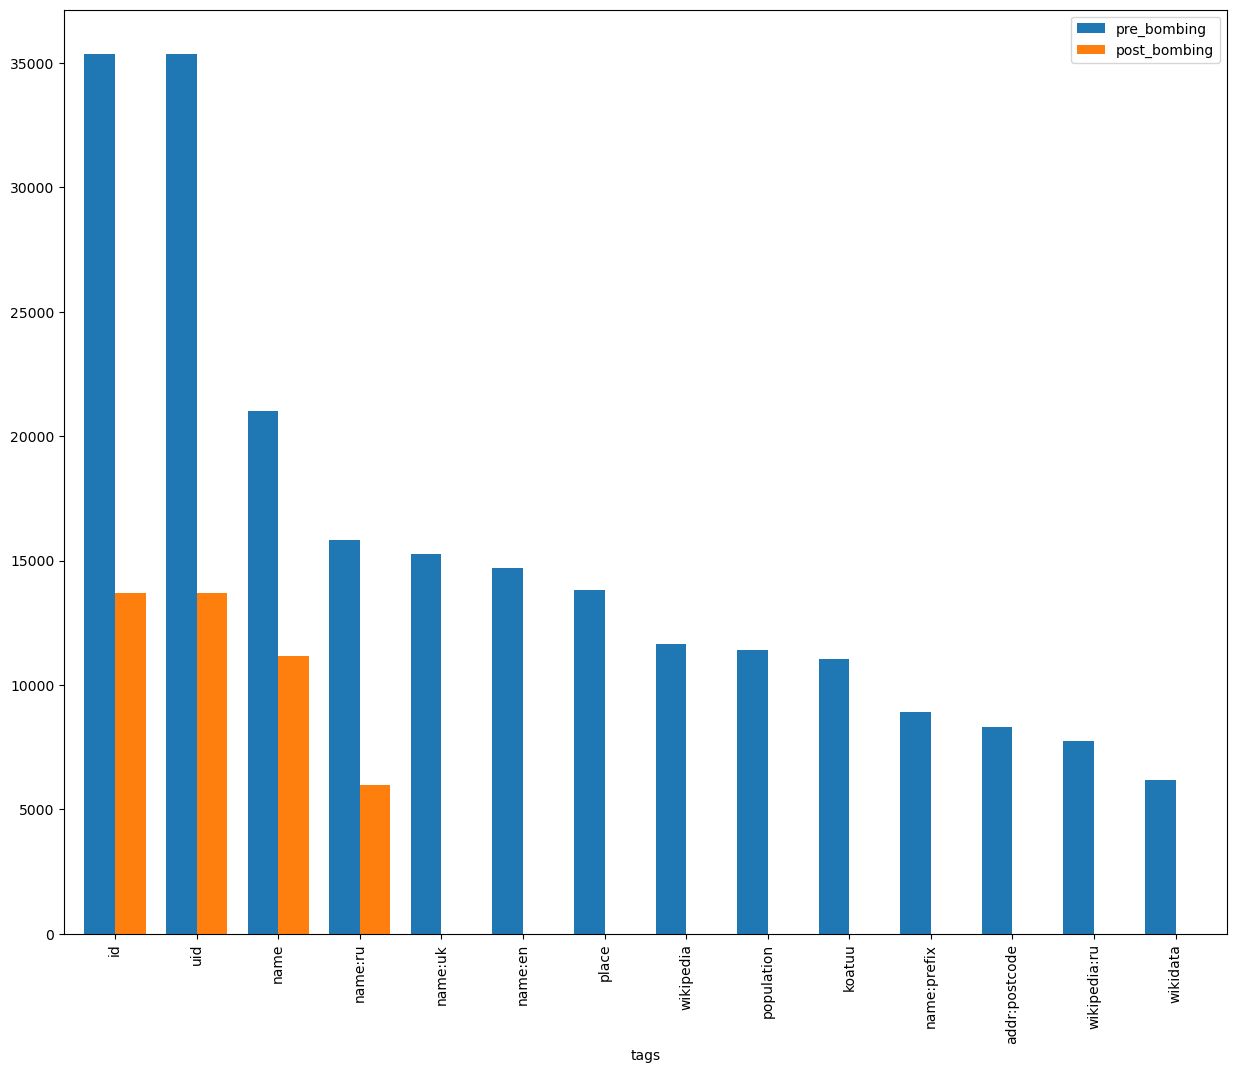

In [181]:
x= df_tg['tags']
y=df_tg['total counts_x']
z=df_tg['total counts_y']

df_tg = pd.DataFrame({
    'tags': x,
    'pre_bombing':y,
    'post_bombing':z
})

ax = df_tg.plot(x="tags", y=["pre_bombing", "post_bombing"],width=0.75, kind="bar", rot=90,figsize=(15, 12))
x_ticks = ax.get_xticks()
x_tick_labels = ax.get_xticklabels()
plt.show()

<Axes: xlabel='total counts', ylabel='Count'>

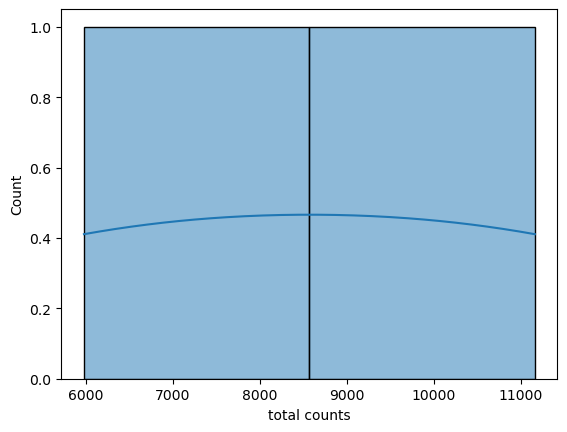

In [182]:
#frequency distribution of tag counts

db_plot=db18.loc[(db18['tags']!='id') & (db18['tags']!='uid'),:]
sb.histplot(data=db_plot, x='total counts',bins='auto',kde=True)

In [183]:
#list of tags for further analysis

column_keep2=db18["tags"].tolist()
column_keep2


['id', 'uid', 'name', 'name:ru']

In [184]:
db19=db17.loc[:,column_keep2]
db19.head()

id      uid name name:ru
0  27942767  2923836  NaN     NaN
1  27942767  2923836  NaN     NaN
2  27942767  2923836  NaN     NaN
3  27942767  2923836  NaN     NaN
4  27972109  2923836  NaN     NaN

In [185]:
#calculating the frequency of unique values under each tags column

remove=['id','uid']

dict1 = {}
for column_name in db19.columns:
    if column_name not in remove:
        unique_value_counts = db19[column_name].value_counts()
        dict1[column_name] = unique_value_counts

sorted(dict1.items())

[('name',
  Нова Пошта №1                                                        616
  Ð¥ÐµÑ€ÑÐ¾Ð½                                                         315
  Monobank                                                             212
  ÐÑ–ÐºÐ¾Ð¿Ð¾Ð»ÑŒ                                                     168
  Eva                                                                  157
                                                                      ... 
  "Пан Атаман"                                                           1
  Новая почта 1                                                          1
  Пам'ятний знак на згадку про учасників Миколаївського Євромайдану      1
  № 1                                                                    1
  Калиновский региональный ландшафтный парк                              1
  Name: name, Length: 1496, dtype: int64),
 ('name:ru',
  Новая Почта №1                                    662
  Ð¥ÐµÑ€ÑÐ¾Ð½                                      2

In [186]:
uniquevalues=pd.DataFrame.from_dict(dict1)
uniquevalues

name  name:ru
 просп. Текстильників            6.0      NaN
"DE-LUX" .  Mагазин головны...   NaN      1.0
"DE-LUX" . Mагазин головных...   NaN      2.0
"DE-LUX" . Магазин головных...   NaN      2.0
"Farmacia"                       1.0      NaN
...                              ...      ...
№ 3                              NaN      1.0
№ 1                              1.0      NaN
№ 17                             1.0      NaN
№ 20                             2.0      NaN
№ 3                              1.0      NaN

[2031 rows x 2 columns]

In [187]:
#displayong the list of unique tags stored by each contributor 

uid_column_name = 'uid'
grouped = db19.groupby(uid_column_name)

# Initialize an empty dictionary to store the results
dict2 = {}

# Iterate over each column (excluding the 'uid' column)
for column_name in db19.columns:
    if column_name != uid_column_name:
        # Apply the unique() function to the current column within each group
        unique_values = grouped[column_name].unique().apply(list)
        
        # Store the unique values in the result_dict with the column_name as the key
        dict2[column_name] = unique_values

        
#storing dictionary into table 
uniquetags2=pd.DataFrame.from_dict(dict2)
uniquetags2=uniquetags2.drop(['id'],axis=1)
uniquetags2.head()

name                        name:ru
uid                                                                
18069                          [nan]                          [nan]
39040                          [nan]                          [nan]
47756  [nan, Брилівка, Світлофор,...  [nan, Брилевка, Брилёвка, ...
69259  [nan, Очаковские ворота, П...                          [nan]
76295                          [nan]                          [nan]

In [188]:
#count unique values for each of these tags that are added by contributors 
uid_column_name = 'uid'
dict_re = {}

# Iterate over each column (excluding the 'uid' column)
for column_name in db19.columns:
    if column_name != uid_column_name:
        # Get the unique values for the current column within each group
        unique_values = grouped[column_name].unique()
        
        #  count the total number of unique values
        total_unique_count = len(set([item for sublist in unique_values for item in sublist]))
        
        # Store the total unique count in the dict_re with the column_name as the key
        dict_re[column_name] = total_unique_count
        
dict_re

{'id': 2960, 'name': 1497, 'name:ru': 772}

In [189]:
# countinng the frequency of each tags added by each of the contributors 

grouped = db19.groupby(uid_column_name)
dict3 = {}

for column_name in db19.columns:
    if column_name != uid_column_name:
        unique_values = grouped[column_name].nunique()
        dict3[column_name] = unique_values

In [190]:
#converting the resulting dictionary into dataframe

contributor_base2=pd.DataFrame.from_dict(dict3)
contributor_base2.reset_index()
contributor_base2=contributor_base2.drop(['id'],axis=1)
contributor_base2

name  name:ru
uid                    
18069        0        0
39040        0        0
47756        4        4
69259        3        0
76295        0        0
...        ...      ...
16397532    15        6
16437177     0        1
16515532     1        0
16526922     2        0
16563511     3        2

[100 rows x 2 columns]

In [191]:
#creating user profile based on previously derived features of all contributors

contributor_base2=timeframe_1.merge(contributor_base2, how='left',on='uid')
contributor_base2=changesets2.merge(contributor_base2, how='left',on='uid')
contributor_base2=version_list2.merge(contributor_base2, how='left',on='uid')
contributor_base2['version'] = contributor_base2['version'].str[:6]
contributor_base2=contributor_base2.merge(df_del2.loc[:,'deleted nodes'], how='left',on='uid')
contributor_base2=id_counts2.merge(contributor_base2, how='left',on='uid')

In [192]:
#final contributor_base that contributed during the 6 months before bombing

contributor_base2

uid   id contribution level             version  new nodes  \
0       18069   19           inactive  [1, 1, 1, 1, 1, 1]         19   
1       27454   55           inactive  [3, 5, 4, 3, 3, 3]         24   
2       39040  201           inactive  [5, 3, 4, 4, 2, 5]        174   
3       47756  937           inactive  [2, 8, 4, 7, 2, 4]        793   
4       48157   30           inactive  [2, 2, 2, 2, 2, 2]         21   
..        ...  ...                ...                 ...        ...   
167  16515532    4           inactive        [1, 1, 1, 2]          3   
168  16526922    2           inactive              [4, 3]          0   
169  16563511    6           inactive  [4, 7, 8, 5, 6, 2]          0   
170  16674070    1           inactive                [11]          0   
171  16763000   33           inactive  [1, 1, 1, 1, 1, 1]         33   

     edited nodes  changeset active days  name  name:ru  deleted nodes  
0               0          1      1 days   0.0      0.0            NaN  
1              31          1      1 days   NaN      NaN            5.0  
2              27          4     13 days   0.0      0.0            5.0  
3             144          4    123 days   4.0      4.0            7.0  
4               9          2      2 days   NaN      NaN            NaN  
..            ...        ...         ...   ...      ...            ...  
167             1          3      1 days   1.0      0.0            1.0  
168             2          2      4 days   2.0      0.0            NaN  
169             6          5      3 days   3.0      2.0            NaN  
170             1          1      1 days   NaN      NaN            NaN  
171             0          1      1 days   NaN      NaN            NaN  

[172 rows x 11 columns]

In [193]:
contributor_base2

uid   id contribution level             version  new nodes  \
0       18069   19           inactive  [1, 1, 1, 1, 1, 1]         19   
1       27454   55           inactive  [3, 5, 4, 3, 3, 3]         24   
2       39040  201           inactive  [5, 3, 4, 4, 2, 5]        174   
3       47756  937           inactive  [2, 8, 4, 7, 2, 4]        793   
4       48157   30           inactive  [2, 2, 2, 2, 2, 2]         21   
..        ...  ...                ...                 ...        ...   
167  16515532    4           inactive        [1, 1, 1, 2]          3   
168  16526922    2           inactive              [4, 3]          0   
169  16563511    6           inactive  [4, 7, 8, 5, 6, 2]          0   
170  16674070    1           inactive                [11]          0   
171  16763000   33           inactive  [1, 1, 1, 1, 1, 1]         33   

     edited nodes  changeset active days  name  name:ru  deleted nodes  
0               0          1      1 days   0.0      0.0            NaN  
1              31          1      1 days   NaN      NaN            5.0  
2              27          4     13 days   0.0      0.0            5.0  
3             144          4    123 days   4.0      4.0            7.0  
4               9          2      2 days   NaN      NaN            NaN  
..            ...        ...         ...   ...      ...            ...  
167             1          3      1 days   1.0      0.0            1.0  
168             2          2      4 days   2.0      0.0            NaN  
169             6          5      3 days   3.0      2.0            NaN  
170             1          1      1 days   NaN      NaN            NaN  
171             0          1      1 days   NaN      NaN            NaN  

[172 rows x 11 columns]

In [194]:
uidlist2=contributor_base2['uid'].to_list()
list_activeuid=set(uid_list).intersection(uidlist2)
n=len(list_activeuid)

print('Number of users active after bombing: ',n)

Number of users active after bombing:  38


In [195]:
result = [item for item in uidlist2 if item not in list_activeuid]

In [196]:
print(len(result))

134


## *Analysing location data for the 6 months period*


In [197]:
#fetching locations to analyse spatial data
kherson6=kherson_2.drop(['deleted','version','visibility','tp','extra'],axis=1)
kherson6

id  changeset                  timestamp       uid  \
0       8229795228  122815816  2022-06-24 20:24:10+01:00   1538111   
1       6810314881  125082024  2022-08-18 22:50:41+01:00  15839400   
2       9951603617  124868151  2022-08-13 22:29:59+01:00   8978331   
3       9932366809  124492883  2022-08-04 19:30:43+01:00   4464045   
4       9940409723  124654720  2022-08-08 20:24:38+01:00   8978331   
...            ...        ...                        ...       ...   
112180  9864955205  123170085  2022-07-04 05:00:40+01:00  16397532   
112181  9583540080  118561992  2022-03-16 17:51:40+00:00   9630102   
112182  2600969187  124224754  2022-07-29 11:42:16+01:00   2923836   
112183  4754172310  124835153  2022-08-12 22:43:35+01:00   8978331   
112184  4754172310  124854051  2022-08-13 14:51:19+01:00   8978331   

                   user   latitude  longitude        date  
0             avinet_ua  46.650569  32.665434  2022-06-24  
1                gololo  46.687482  32.700937  2022-08-18  
2            Velikodsky  46.701379  33.417940  2022-08-13  
3       Anton Melnichuk  46.879115  33.462210  2022-08-04  
4            Velikodsky  46.690982  33.541212  2022-08-08  
...                 ...        ...        ...         ...  
112180           HomeUA  47.563547  31.333523  2022-07-04  
112181          muninnn  45.763625  34.020852  2022-03-16  
112182        VileGecko  46.889648  32.842814  2022-07-29  
112183       Velikodsky  46.706749  33.462707  2022-08-12  
112184       Velikodsky  46.706749  33.462707  2022-08-13  

[112185 rows x 8 columns]

In [198]:
# grouing by uid and calculating mean value of latitudes
db20=kherson6.groupby(['uid'])['latitude'].mean()
db20=db20.reset_index()
db20

uid   latitude
0       18069  46.242919
1       27454  47.573584
2       39040  47.086648
3       47756  46.717829
4       48157  47.272514
..        ...        ...
167  16515532  46.886624
168  16526922  46.832617
169  16563511  46.965609
170  16674070  46.307078
171  16763000  46.749570

[172 rows x 2 columns]

In [199]:
# grouing by uid and calculating mean value of longitude

db21=kherson6.groupby(['uid'])['longitude'].mean()
db21=db21.reset_index()
db20

uid   latitude
0       18069  46.242919
1       27454  47.573584
2       39040  47.086648
3       47756  46.717829
4       48157  47.272514
..        ...        ...
167  16515532  46.886624
168  16526922  46.832617
169  16563511  46.965609
170  16674070  46.307078
171  16763000  46.749570

[172 rows x 2 columns]

In [200]:
mean_loc2=db20.merge(db21, on='uid')

In [201]:
mean_loc2

uid   latitude  longitude
0       18069  46.242919  33.724433
1       27454  47.573584  31.306202
2       39040  47.086648  32.381990
3       47756  46.717829  33.072839
4       48157  47.272514  32.236937
..        ...        ...        ...
167  16515532  46.886624  32.183099
168  16526922  46.832617  35.358203
169  16563511  46.965609  31.997921
170  16674070  46.307078  32.173900
171  16763000  46.749570  33.415803

[172 rows x 3 columns]

In [202]:
#Finding the locations of the first node contributed by each user

db22=kherson6.sort_values(['uid', 'date'], ascending=[True,True])
db22

id  changeset                  timestamp       uid  \
8349    9568712903  118324099  2022-03-10 13:31:05+00:00     18069   
9702    9568712906  118324099  2022-03-10 13:31:05+00:00     18069   
14188   9568712913  118324099  2022-03-10 13:31:05+00:00     18069   
14940   9568787320  118324099  2022-03-10 13:31:05+00:00     18069   
15041   9568712909  118324099  2022-03-10 13:31:05+00:00     18069   
...            ...        ...                        ...       ...   
96400   9962499744  125078931  2022-08-18 21:01:21+01:00  16763000   
100758  9962499750  125078931  2022-08-18 21:01:21+01:00  16763000   
103418  9962499740  125078931  2022-08-18 21:01:21+01:00  16763000   
107124  9962499755  125078931  2022-08-18 21:01:21+01:00  16763000   
112140  9962499727  125078931  2022-08-18 21:01:21+01:00  16763000   

                     user   latitude  longitude        date  
8349    Claudius Henrichs  46.238396  33.708115  2022-03-10  
9702    Claudius Henrichs  46.224889  33.703077  2022-03-10  
14188   Claudius Henrichs  46.251433  33.734862  2022-03-10  
14940   Claudius Henrichs  46.243676  33.723988  2022-03-10  
15041   Claudius Henrichs  46.246495  33.717186  2022-03-10  
...                   ...        ...        ...         ...  
96400         Deckard1983  46.750107  33.415702  2022-08-18  
100758        Deckard1983  46.750155  33.415299  2022-08-18  
103418        Deckard1983  46.749756  33.416380  2022-08-18  
107124        Deckard1983  46.750161  33.414976  2022-08-18  
112140        Deckard1983  46.749403  33.415524  2022-08-18  

[112185 rows x 8 columns]

In [203]:
db23=db22.groupby('uid')

first_row= db23.first()
first_record2=pd.DataFrame(first_row).reset_index()
first_record2

uid          id  changeset                  timestamp  \
0       18069  9568712903  118324099  2022-03-10 13:31:05+00:00   
1       27454  9571934273  118384273  2022-03-12 01:02:08+00:00   
2       39040  9561255740  118212224  2022-03-07 20:46:18+00:00   
3       47756  9628655815  119195585  2022-04-01 11:19:06+01:00   
4       48157  9788266021  121810368  2022-06-01 13:21:04+01:00   
..        ...         ...        ...                        ...   
167  16515532  9881124562  123478015  2022-07-11 15:25:11+01:00   
168  16526922  1877488466  123963846  2022-07-23 07:59:00+01:00   
169  16563511  6515973630  123692410  2022-07-16 15:54:17+01:00   
170  16674070   337690829  124200728  2022-07-28 20:29:53+01:00   
171  16763000  9962499728  125078931  2022-08-18 21:01:21+01:00   

                  user   latitude  longitude        date  
0    Claudius Henrichs  46.238396  33.708115  2022-03-10  
1              Popolon  47.570605  31.314290  2022-03-12  
2              Dinamik  47.091514  31.896572  2022-03-07  
3          tunnelbauer  47.548632  33.501184  2022-04-01  
4              Jekader  47.501451  33.104568  2022-06-01  
..                 ...        ...        ...         ...  
167  AverageFanEnjoyer  46.966813  32.046160  2022-07-11  
168      Alexander0845  46.844087  35.373121  2022-07-23  
169   Denis Koshevoi35  46.965379  32.002563  2022-07-16  
170         difeba1876  46.307078  32.173900  2022-07-28  
171        Deckard1983  46.749425  33.415641  2022-08-18  

[172 rows x 8 columns]

In [204]:
#finding the median value of the latitude and longitude contributed by each user


db25=kherson6.groupby(['uid'])['latitude'].median()
db26=kherson6.groupby(['uid'])['longitude'].median()

In [205]:
db25=db25.reset_index()
db26=db26.reset_index()
median_loc2=db25.merge(db26, on='uid')

In [206]:
median_loc2

uid   latitude  longitude
0       18069  46.243676  33.727072
1       27454  47.571567  31.313069
2       39040  47.294337  31.843869
3       47756  46.418403  33.494572
4       48157  47.161444  31.984415
..        ...        ...        ...
167  16515532  46.966813  32.046160
168  16526922  46.832617  35.358203
169  16563511  46.965444  32.002072
170  16674070  46.307078  32.173900
171  16763000  46.749425  33.415742

[172 rows x 3 columns]

### *Plotting all three measures of location data to understand the activity*


C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

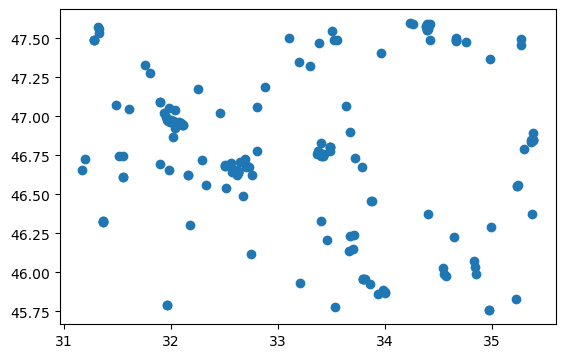

In [207]:
crs={'init':'epsg:4326'}
geometry4=[Point(xy) for xy in zip(first_record2["longitude"], first_record2["latitude"])]
geodata4=gpd.GeoDataFrame(first_record2,crs=crs, geometry=geometry4)
geodata4.plot()

C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

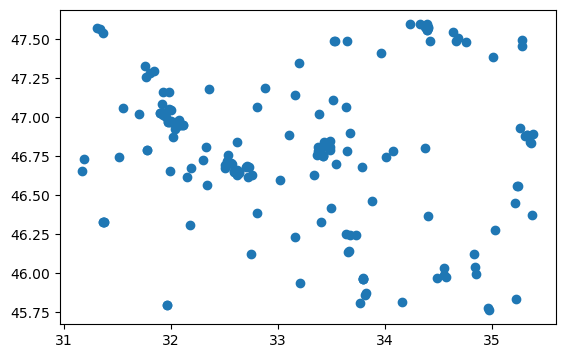

In [208]:
#plotting the median value location of nodes created by each usercrs={'init':'epsg:4326'}
geometry5=[Point(xy) for xy in zip(median_loc2["longitude"], median_loc2["latitude"])]
geodata5=gpd.GeoDataFrame(median_loc2,crs=crs, geometry=geometry5)
geodata5.plot()

C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

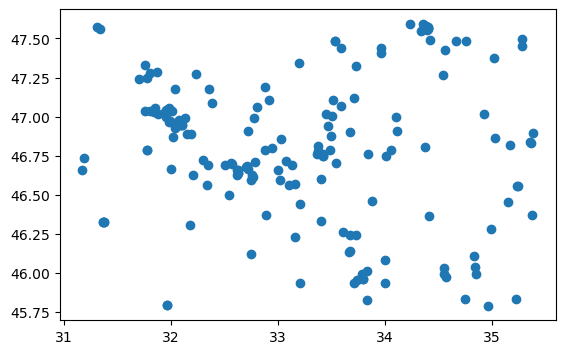

In [209]:
#plotting the mean value of locations

crs={'init':'epsg:4326'}
geometry6=[Point(xy) for xy in zip(mean_loc2["longitude"], mean_loc2["latitude"])]
geodata6=gpd.GeoDataFrame(mean_loc2,crs=crs, geometry=geometry6)
geodata6.plot()

Text(0.5, 0.98, 'kherson mapping pattern')

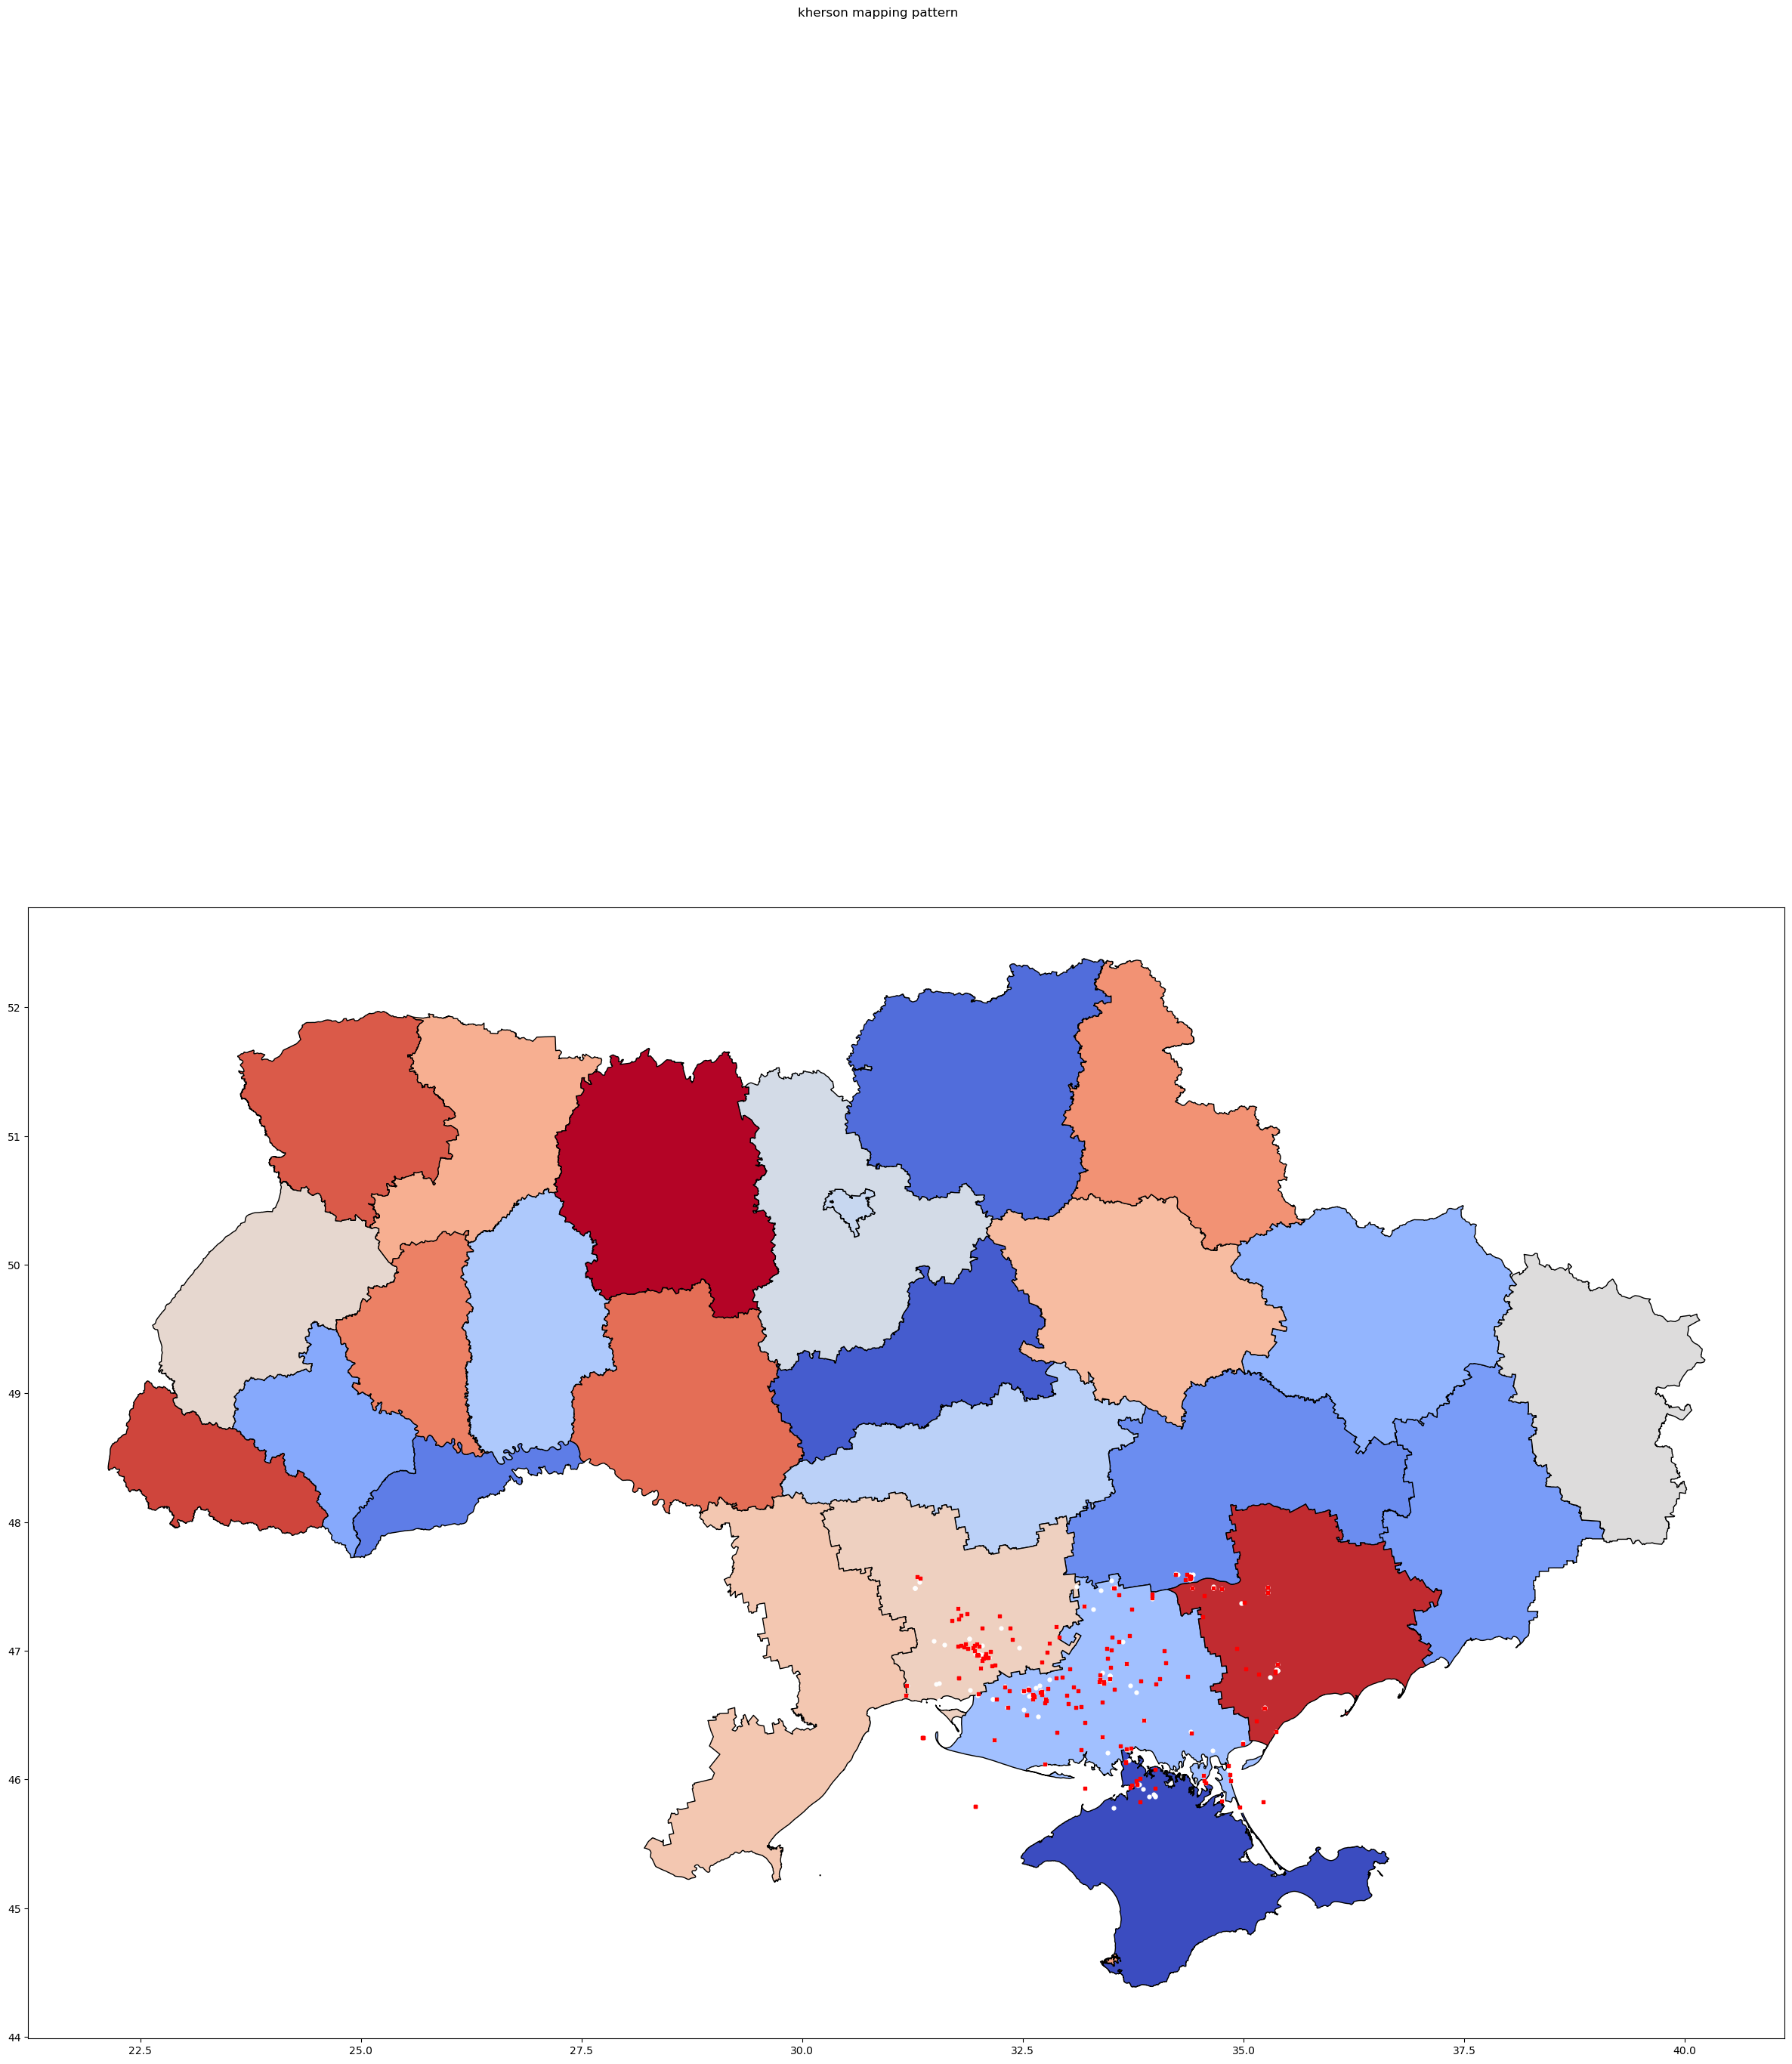

In [210]:
#creating plot with Ukraine's map to understand mapping pattern of the contributors

fig,ax = plt.subplots(figsize=(30, 40))


color = 'blue'

cmapblue = LinearSegmentedColormap.from_list('custom_cmap', [(0, color), (1, color)], N=256)
shapefile.plot(facecolor='white', edgecolor='k',alpha=1,linewidth=1,cmap='coolwarm',ax=ax)


g=geodata4.plot(ax=ax,color='white', marker='o',markersize=12,legend=True);
g=geodata6.plot(ax=ax,color='red',marker='s',markersize=12,legend=True);

fig.suptitle('kherson mapping pattern', fontsize=12)



### *Analysing dispersion of mapping using Statistical measure*

In [211]:
db27=kherson6.loc[:,['uid','latitude','longitude']]
db27.head()

uid   latitude  longitude
0   1538111  46.650569  32.665434
1  15839400  46.687482  32.700937
2   8978331  46.701379  33.417940
3   4464045  46.879115  33.462210
4   8978331  46.690982  33.541212

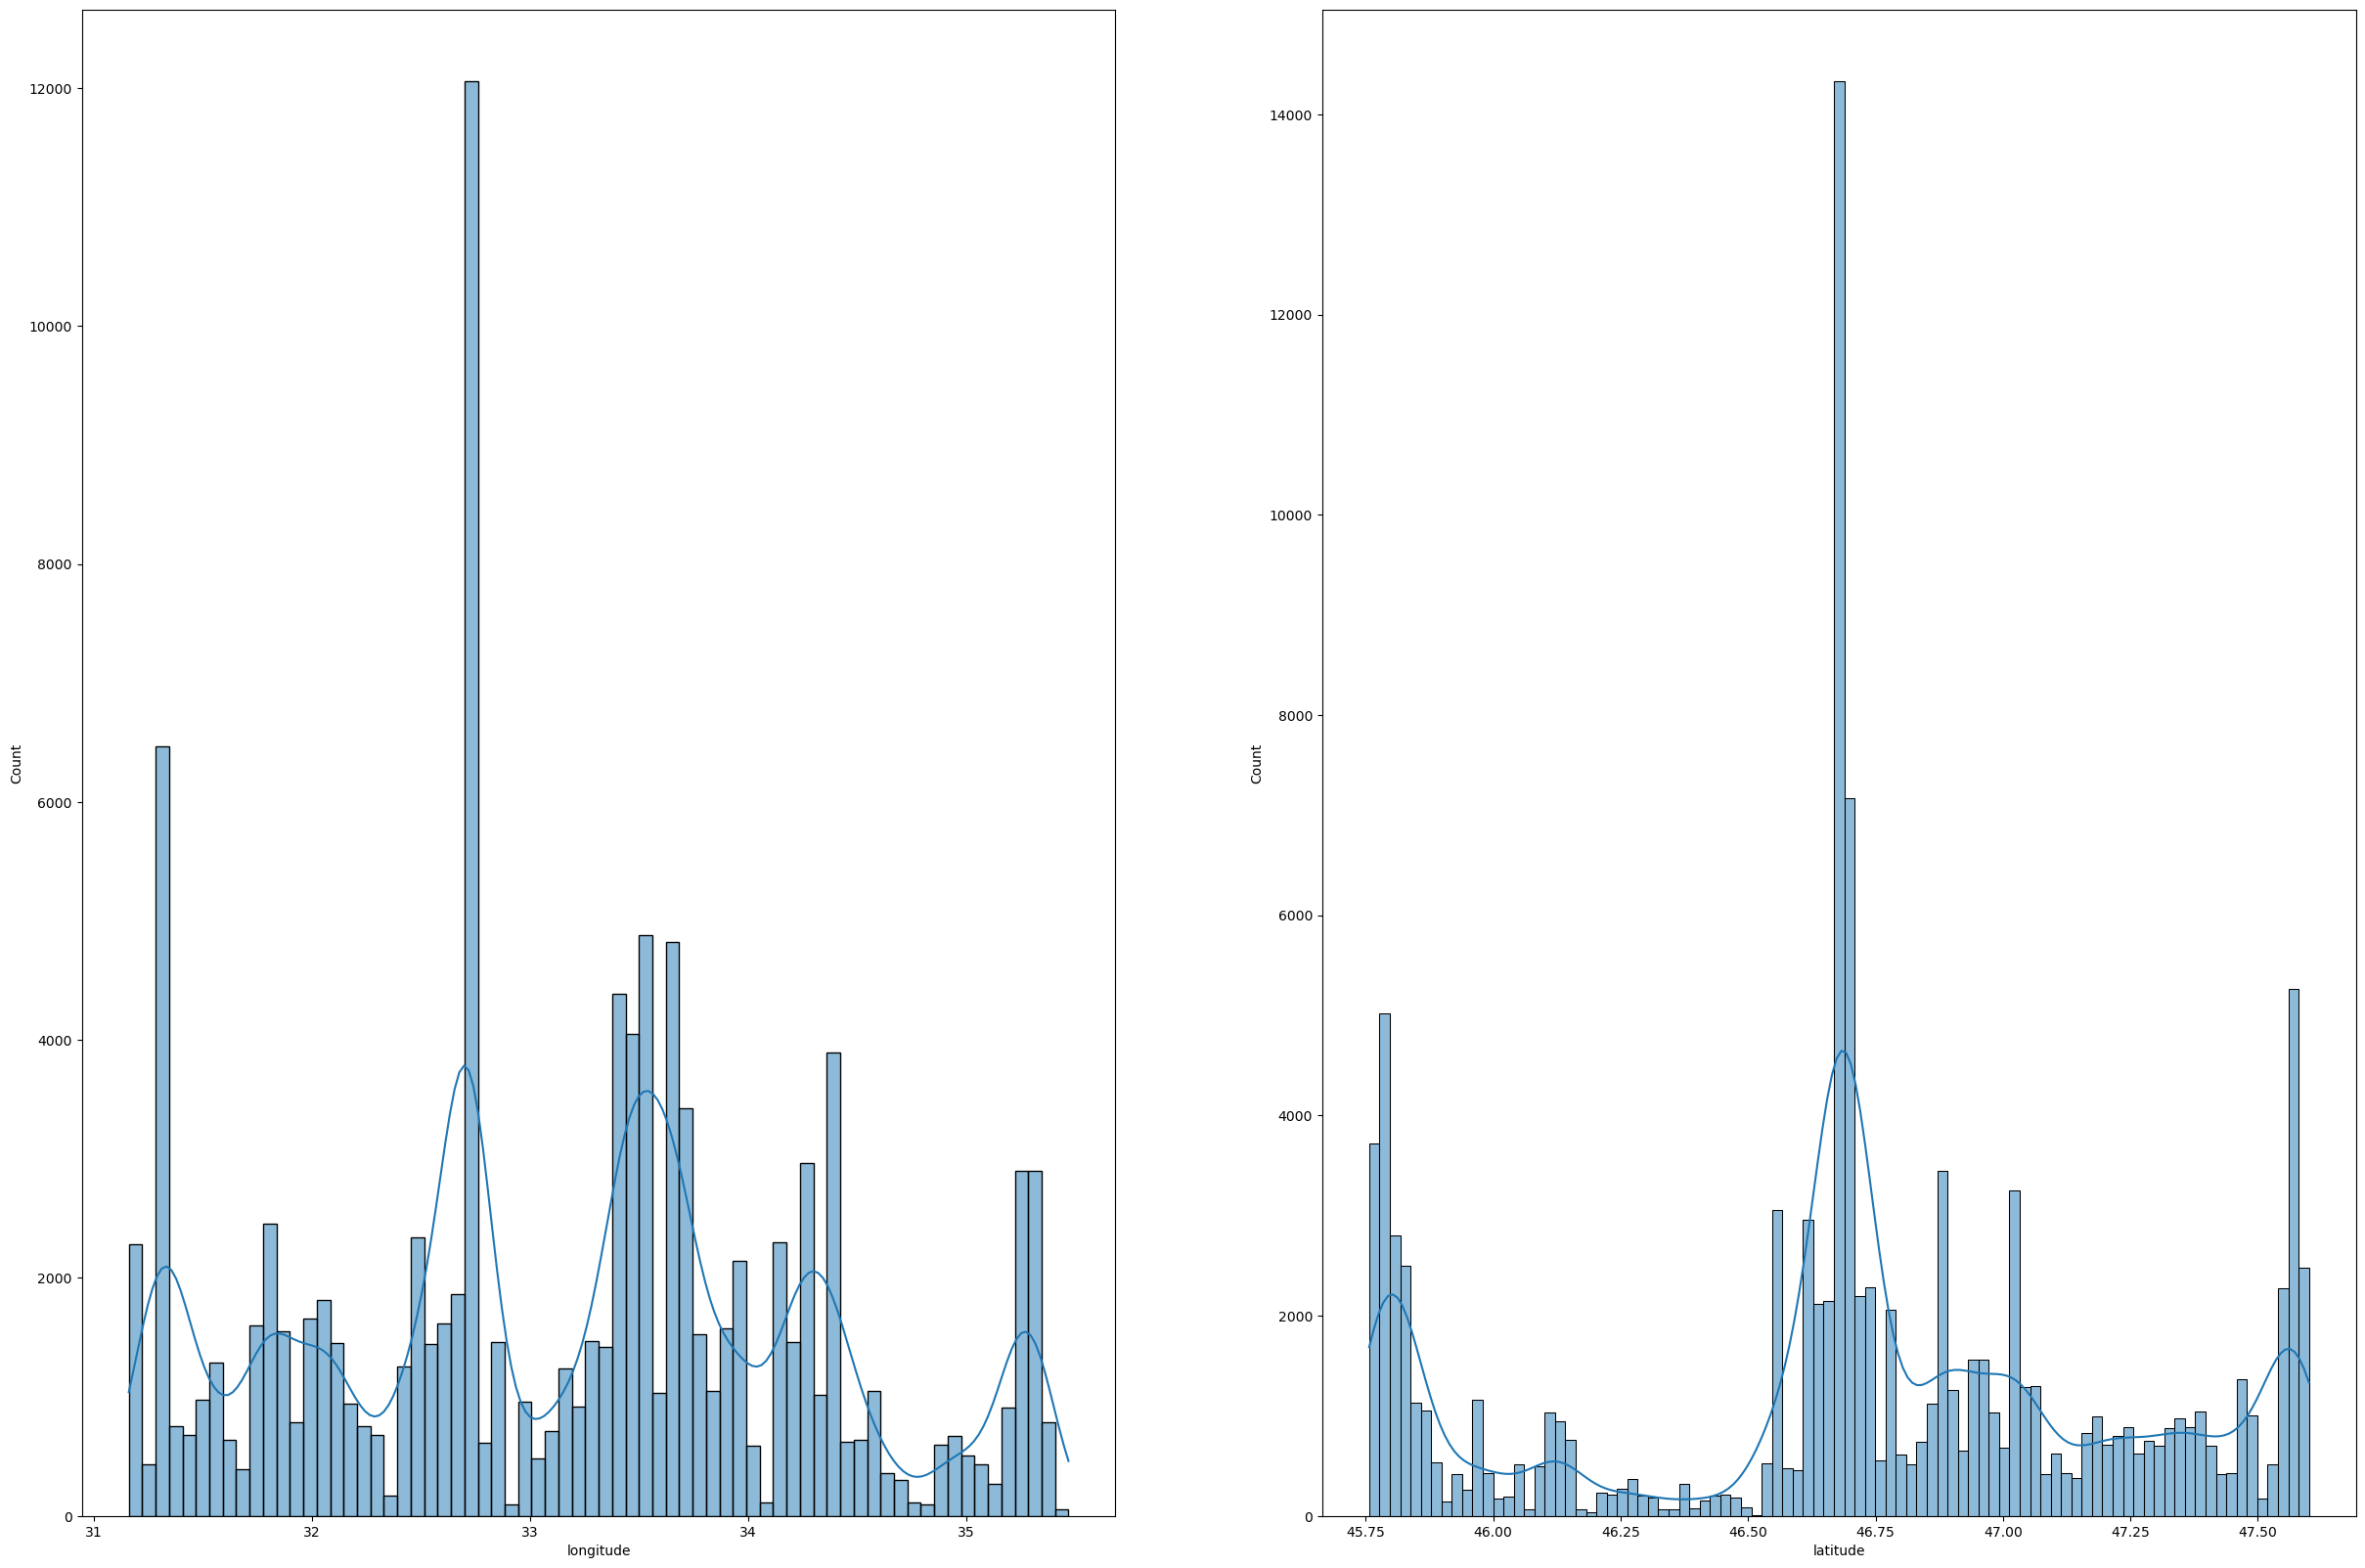

In [212]:
# frequency distribution of latitude and longitude measures

fig,axes= plt.subplots(1,2,figsize=(30, 20))

axes = axes.flatten()

s=sb.histplot(data=db27, x='longitude',bins='auto',kde=True,ax=axes[0])
s=sb.histplot(data=db27, x='latitude',bins='auto',kde=True,ax=axes[1])

In [213]:
#calculating standard deviation of complete dataset 

p_std_lat2=st.pstdev(db27['latitude'])
p_std_lon2=st.pstdev(db27['longitude'])
print('Population std for latitude: ',p_std_lat2)
print('Population std for longitude: ',p_std_lon2)

Population std for latitude:  0.5346094583504661
Population std for longitude:  1.123467009964164


In [214]:
#calculation foe mean value

p_mean_lat2=db27['latitude'].mean()
p_mean_lon2=db27['longitude'].mean()

print('Population mean for latitude: ',p_mean_lat2)
print('Population mean for latitude: ',p_mean_lon2)

Population mean for latitude:  46.71895433083924
Population mean for latitude:  33.156993889455805


In [215]:
#calculation for Coefficient of variance to understand the variability in mapping

cv_lat2=(p_std_lat2/p_mean_lat2)*100
cv_lon2=(p_std_lon2/p_mean_lon2)*100
print('CV for latitude: ',cv_lat2)
print('CV for longitude: ',cv_lon2)

CV for latitude:  1.1443095548856703
CV for longitude:  3.3883258950125623


In [216]:
#calculating std for each contributor group

db28=db27.groupby('uid').agg('std',numeric_only='True')
db28=db28.reset_index()#
db28

uid  latitude  longitude
0       18069  0.009913   0.019490
1       27454  0.006480   0.022928
2       39040  0.486057   1.101504
3       47756  0.642827   0.623284
4       48157  0.168785   0.773896
..        ...       ...        ...
167  16515532  0.162843   0.292616
168  16526922  0.016221   0.021097
169  16563511  0.000316   0.006890
170  16674070       NaN        NaN
171  16763000  0.000445   0.000487

[172 rows x 3 columns]

In [217]:
db29=db28.merge(mean_loc2,on='uid',how='left')
db29= db29.rename(columns={'latitude_x': 'latitude'})
db29= db29.rename(columns={'longitude_x': 'longitude'})
db29= db29.rename(columns={'latitude_y': 'mean_lat'})
db29= db29.rename(columns={'longitude_y': 'mean_long'})
db29

uid  latitude  longitude   mean_lat  mean_long
0       18069  0.009913   0.019490  46.242919  33.724433
1       27454  0.006480   0.022928  47.573584  31.306202
2       39040  0.486057   1.101504  47.086648  32.381990
3       47756  0.642827   0.623284  46.717829  33.072839
4       48157  0.168785   0.773896  47.272514  32.236937
..        ...       ...        ...        ...        ...
167  16515532  0.162843   0.292616  46.886624  32.183099
168  16526922  0.016221   0.021097  46.832617  35.358203
169  16563511  0.000316   0.006890  46.965609  31.997921
170  16674070       NaN        NaN  46.307078  32.173900
171  16763000  0.000445   0.000487  46.749570  33.415803

[172 rows x 5 columns]

In [218]:
#calculation for CV applied to each group

db29['CV_lat']=(db29['latitude']/db29['mean_lat']*100)
db29['CV_lon']=(db29['longitude']/db29['mean_long'])*100
db29

uid  latitude  longitude   mean_lat  mean_long    CV_lat    CV_lon
0       18069  0.009913   0.019490  46.242919  33.724433  0.021436  0.057793
1       27454  0.006480   0.022928  47.573584  31.306202  0.013622  0.073238
2       39040  0.486057   1.101504  47.086648  32.381990  1.032261  3.401593
3       47756  0.642827   0.623284  46.717829  33.072839  1.375978  1.884579
4       48157  0.168785   0.773896  47.272514  32.236937  0.357047  2.400650
..        ...       ...        ...        ...        ...       ...       ...
167  16515532  0.162843   0.292616  46.886624  32.183099  0.347312  0.909221
168  16526922  0.016221   0.021097  46.832617  35.358203  0.034637  0.059665
169  16563511  0.000316   0.006890  46.965609  31.997921  0.000673  0.021532
170  16674070       NaN        NaN  46.307078  32.173900       NaN       NaN
171  16763000  0.000445   0.000487  46.749570  33.415803  0.000953  0.001458

[172 rows x 7 columns]

In [219]:
db29.sort_values('CV_lon',ascending=True)

uid  latitude  longitude   mean_lat  mean_long    CV_lat    CV_lon
128  11764968  0.000228   0.000031  47.454631  35.274194  0.000481  0.000087
49    1989777  0.000110   0.000101  47.580518  34.383756  0.000231  0.000295
82    5182368  0.000012   0.000110  46.654985  31.169940  0.000025  0.000353
163  16169990  0.000191   0.000161  46.325454  31.366362  0.000411  0.000513
136  13186378  0.000061   0.000198  46.721346  32.294554  0.000130  0.000612
..        ...       ...        ...        ...        ...       ...       ...
149  15487027       NaN        NaN  47.025234  31.932511       NaN       NaN
150  15588255       NaN        NaN  45.961021  33.793236       NaN       NaN
153  15793370       NaN        NaN  46.325432  31.366392       NaN       NaN
166  16437177       NaN        NaN  46.624404  32.613169       NaN       NaN
170  16674070       NaN        NaN  46.307078  32.173900       NaN       NaN

[172 rows x 7 columns]

In [220]:

df_ts1= kherson1.loc[:,['date','id']]
df_ts1=df_ts1.groupby('date').count()
df_ts1=df_ts1.reset_index()
df_ts1['date']=pd.to_datetime(df_ts1['date'])
df_ts1 = df_ts1.set_index('date')

In [221]:
df_ts2= kherson4.loc[:,['date','id']]
df_ts2=df_ts2.groupby('date').count()
df_ts2=df_ts2.reset_index()
df_ts2['date']=pd.to_datetime(df_ts2['date'])
df_ts2 = df_ts2.set_index('date')

In [222]:
df_ts=df_ts1.append(df_ts2)
df_ts

C:\Users\Shruti\AppData\Local\Temp\ipykernel_51792\1232277424.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ts=df_ts1.append(df_ts2)


id
date            
2021-08-24  2890
2021-08-25  3800
2021-08-26   192
2021-08-27  2467
2021-08-28  1183
...          ...
2022-08-20    74
2022-08-21    33
2022-08-22    66
2022-08-23    73
2022-08-25    35

[343 rows x 1 columns]

In [223]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Additive Decomposition
add_result = seasonal_decompose(df_ts, model='additive', period=30)


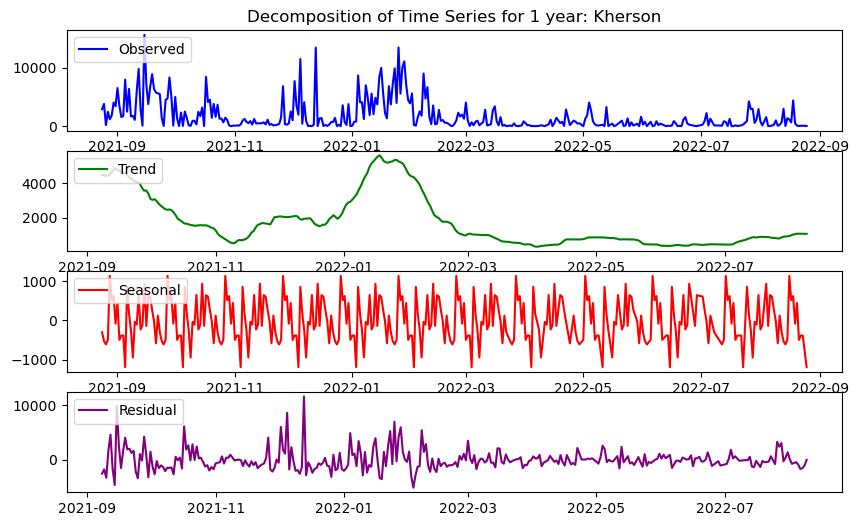

In [224]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 6))
axes[0].set_title('Decomposition of Time Series for 1 year: Kherson')
axes[0].plot(df_ts.index, add_result.observed, label='Observed', color='blue')
axes[1].plot(df_ts.index, add_result.trend, label='Trend', color='green')
axes[2].plot(df_ts.index, add_result.seasonal, label='Seasonal', color='red')
axes[3].plot(df_ts.index, add_result.resid, label='Residual', color='purple')
axes[0].legend(loc='upper left')
axes[1].legend(loc='upper left')
axes[2].legend(loc='upper left')
axes[3].legend(loc='upper left')

In [225]:
week1 = seasonal_decompose(df6, model='additive',period=2)
week2 = seasonal_decompose(db6, model='additive',period=2)

In [226]:
month1 = seasonal_decompose(df7, model='additive',period=7)
month2 = seasonal_decompose(db7, model='additive',period=7)

In [227]:
sixmonth1 = seasonal_decompose(df_ts1, model='additive',period=7)
sixmonth2 = seasonal_decompose(df_ts2, model='additive',period=7)


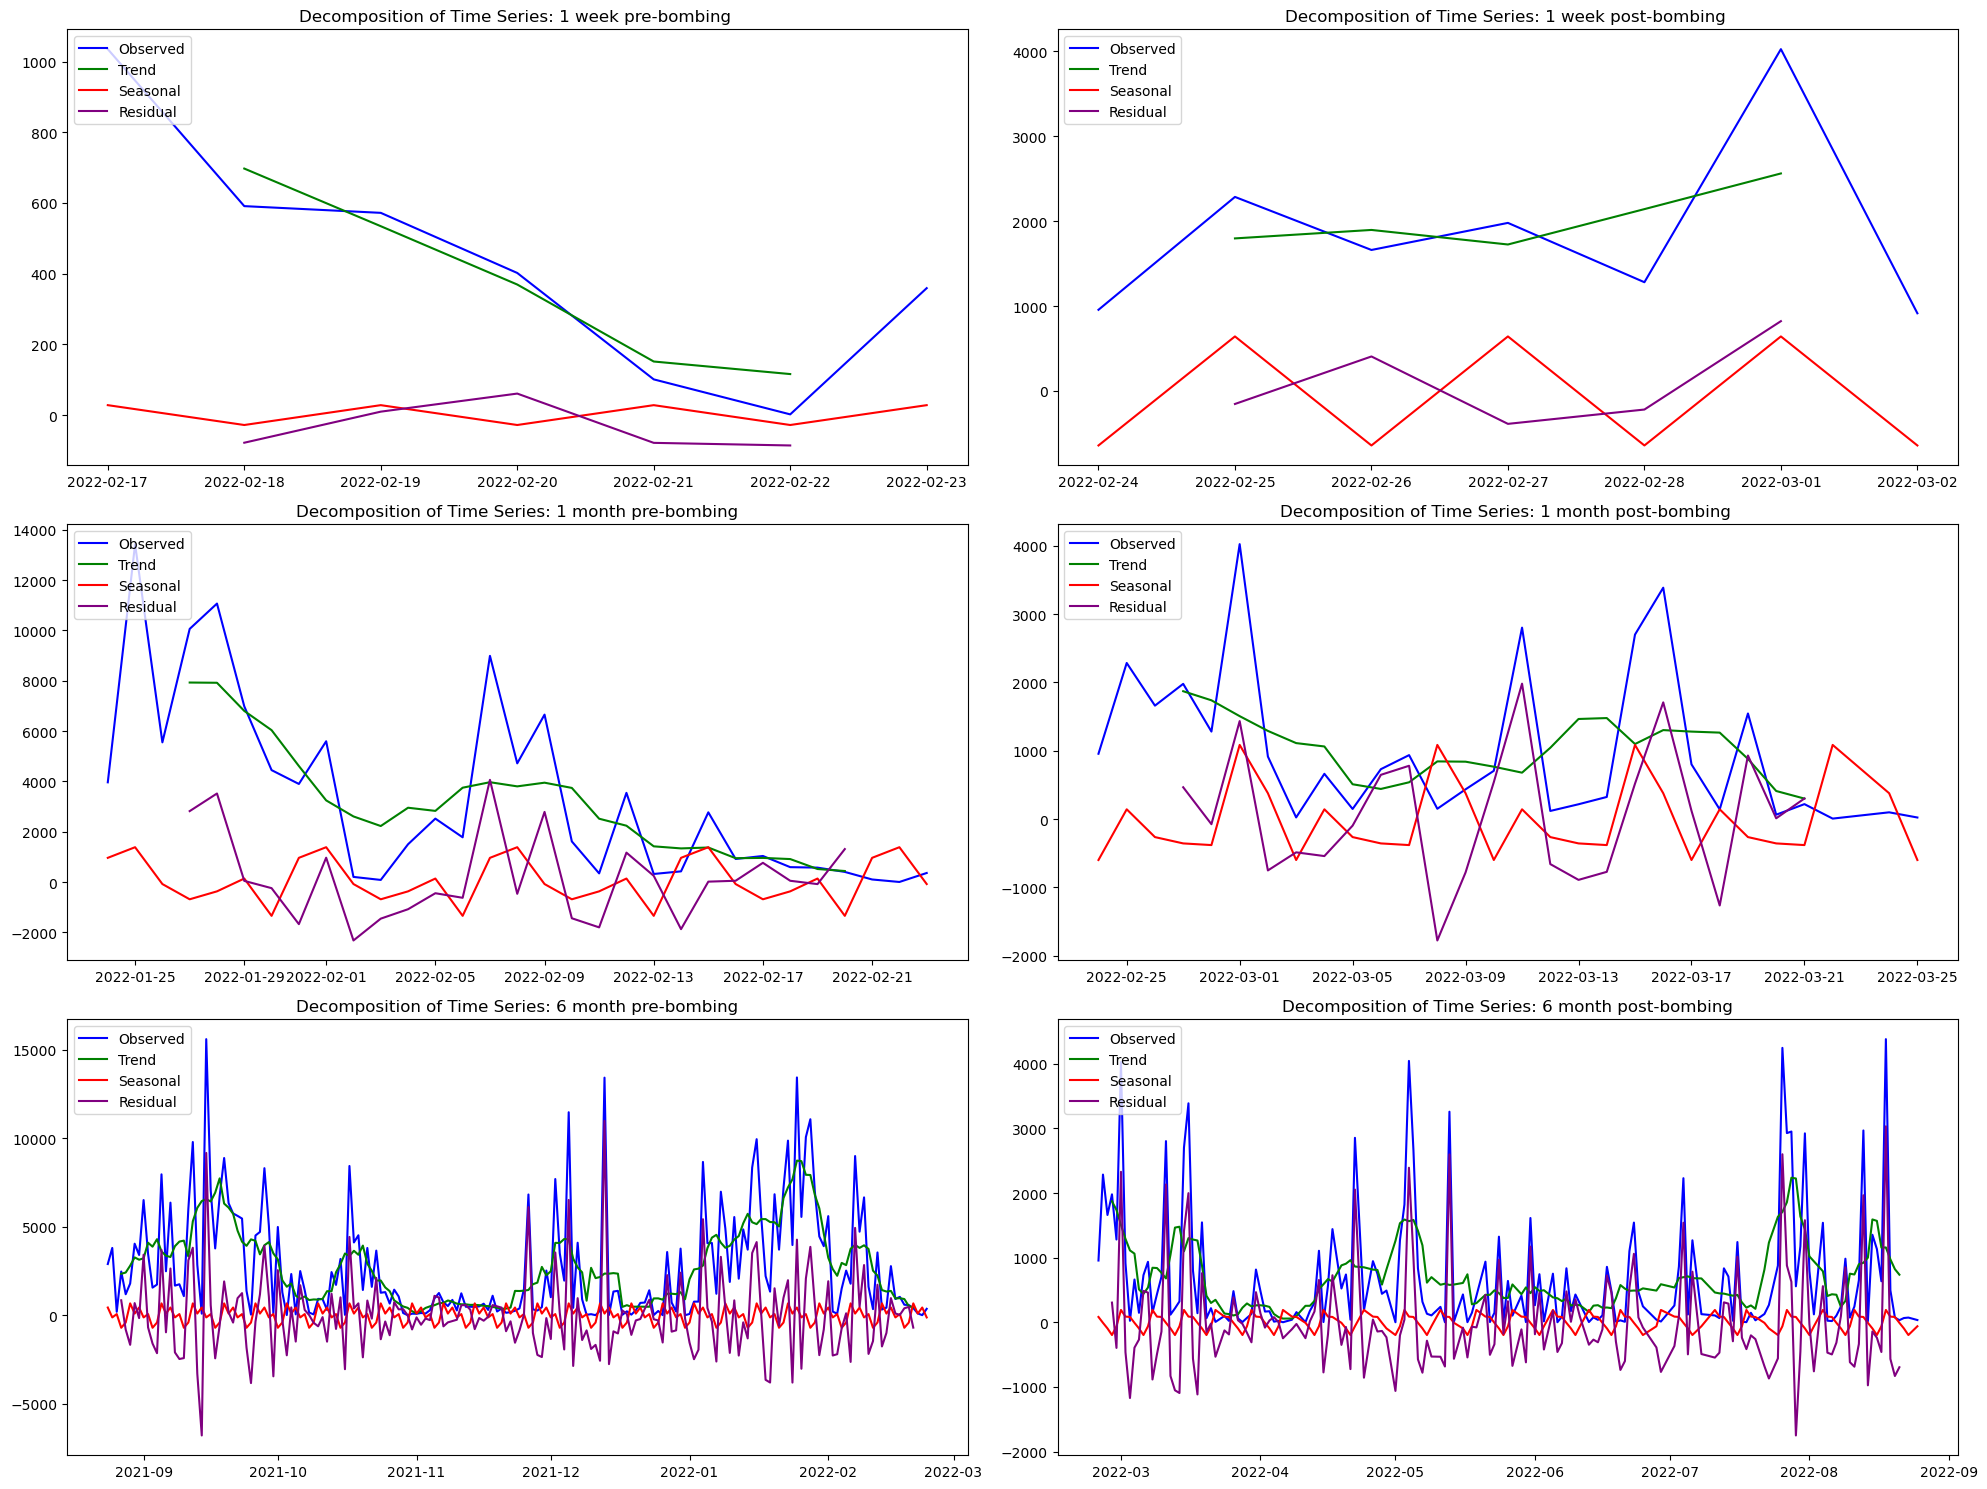

In [228]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

axes[0,0].set_title('Decomposition of Time Series: 1 week pre-bombing ')
axes[0,0].plot(df6.index, week1.observed, label='Observed', color='blue')
axes[0,0].plot(df6.index, week1.trend, label='Trend', color='green')
axes[0,0].plot(df6.index, week1.seasonal, label='Seasonal', color='red')
axes[0,0].plot(df6.index, week1.resid, label='Residual', color='purple')
axes[0,0].legend(loc='upper left')
axes[0,1].set_title('Decomposition of Time Series: 1 week post-bombing ')
axes[0,1].plot(db6.index, week2.observed, label='Observed', color='blue')
axes[0,1].plot(db6.index, week2.trend, label='Trend', color='green')
axes[0,1].plot(db6.index, week2.seasonal, label='Seasonal', color='red')
axes[0,1].plot(db6.index, week2.resid, label='Residual', color='purple')
axes[0,1].legend(loc='upper left')

axes[1,0].set_title('Decomposition of Time Series: 1 month pre-bombing')
axes[1,0].plot(df7.index, month1.observed, label='Observed', color='blue')
axes[1,0].plot(df7.index, month1.trend, label='Trend', color='green')
axes[1,0].plot(df7.index, month1.seasonal, label='Seasonal', color='red')
axes[1,0].plot(df7.index, month1.resid, label='Residual', color='purple')
axes[1,0].legend(loc='upper left')
axes[1,1].set_title('Decomposition of Time Series: 1 month post-bombing ')
axes[1,1].plot(db7.index, month2.observed, label='Observed', color='blue')
axes[1,1].plot(db7.index, month2.trend, label='Trend', color='green')
axes[1,1].plot(db7.index, month2.seasonal, label='Seasonal', color='red')
axes[1,1].plot(db7.index, month2.resid, label='Residual', color='purple')
axes[1,1].legend(loc='upper left')


axes[2,0].set_title('Decomposition of Time Series: 6 month pre-bombing')
axes[2,0].plot(df_ts1.index, sixmonth1.observed, label='Observed', color='blue')
axes[2,0].plot(df_ts1.index, sixmonth1.trend, label='Trend', color='green')
axes[2,0].plot(df_ts1.index, sixmonth1.seasonal, label='Seasonal', color='red')
axes[2,0].plot(df_ts1.index, sixmonth1.resid, label='Residual', color='purple')
axes[2,0].legend(loc='upper left')
axes[2,1].set_title('Decomposition of Time Series: 6 month post-bombing')
axes[2,1].plot(df_ts2.index, sixmonth2.observed, label='Observed', color='blue')
axes[2,1].plot(df_ts2.index, sixmonth2.trend, label='Trend', color='green')
axes[2,1].plot(df_ts2.index, sixmonth2.seasonal, label='Seasonal', color='red')
axes[2,1].plot(df_ts2.index, sixmonth2.resid, label='Residual', color='purple')
axes[2,1].legend(loc='upper left')

plt.tight_layout()